First I've uploaded all the required basic libraries for data manipulation,numeric and static libraries like pandas,numpy,scipy and data visulaization tool like seaborn and matplotlib

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import zscore,boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [171]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

Now,I've uploaded the CSV file of Global Power Plant Case and made a dataframe for the same.

#### In this dataset I've to Predict the Average Price of 'Primary Fuel' and 'capacity_mw' both. Since 'capacity_mw' is in the form of continuous number hence will use Regression model and 'Primary Fuel' is in the form of categorical String format so will use classification model as well.

#### Ergo, first will build a regression model to predict the 'capacity_mw' of each Global Power Plant and later in this notebook itself will build a classification model to predict 'Primary Fuel' as well.

### A): Regression Model Building

#### Exploratory Data Analysis(EDA)

In [3]:
print('Row"s are',df.shape[0])
print('Columns are',df.shape[1])
print('Shape is',df.shape)

Row"s are 907
Columns are 27
Shape is (907, 27)


As,we can see that there are 907 rows and 27 columns including the Target Variables- 'Primary Fuel' and 'capacity_mw'.In this project I've to train the model so that I can simply predict the capacity produced (in megawatt) for each power plant globally.

In [4]:
#two dimensional dataframe
df.ndim

2

In [6]:
#Total datapoints in this dataframe
df.size

24489

In [8]:
#indexes are-
df.index

RangeIndex(start=0, stop=907, step=1)

In [9]:
#columns of the dataframes are-
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [10]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

##### categorical attributes= ['country','country_long','name','gppd_idnr','primary_fuel','other_fuel1','other_fuel2','url','owner','source','geolocation_source','generation_data_source']....There are total 12 categorical columns

##### Numeric Columns=['capacity_mw','latitude','longitude','other_fuel3','commissioning_year','wepp_id','year_of_capacity_data','generation_gwh_2013','generation_gwh_2014,'generation_gwh_2019','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','estimated_generation_gwh'].........There are total 15 float/numerical columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [12]:
df.isnull().any().any()

True

In [13]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [15]:
df.isnull().sum().sum()

10445

Null values are present in almost each columns and the null value counts as 10445,which is on higher side hence will replace it with mean or mode depending on the characteristics of the columns.

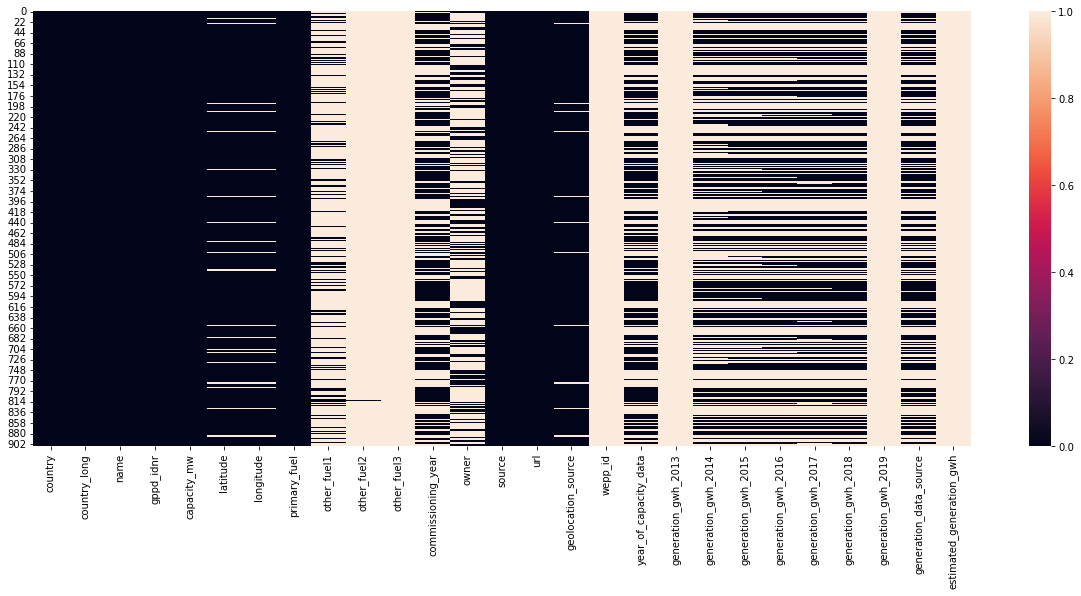

In [18]:
plt.figure(figsize=(21,8))
sns.heatmap(df.isnull())
plt.show()

Above is the pictorial visualization of null value presence across the columns

In [19]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

##### I'm going to drop few columns those don't have any values inside it and also those who are not meaningful at all.

Since attributes 'name' and 'gppd_idnr'-(which is indicating the unique code for each power plant) have the 907 unique entries and both are not useful going forward hence we can drop both the columns or keep only 1,and here I'm keeping column 'gppd_idnr' for the further process.

Below are the columns that I'm going to drop manually by analysing the unique value presence and it's characteristics

In [172]:
df.drop(['country','country_long','name','url','year_of_capacity_data','other_fuel2','wepp_id','other_fuel3','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','generation_data_source'],axis=1,inplace=True)

In [173]:
#new dataframe
df

gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0    WRI1020239          2.5   28.1839    73.2407        Solar         NaN   
1    WRI1019881         98.0   24.7663    74.6090         Coal         NaN   
2    WRI1026669         39.2   21.9038    69.3732         Wind         NaN   
3    IND0000001        135.0   23.8712    91.3602          Gas         NaN   
4    IND0000002       1800.0   21.9603    82.4091         Coal         Oil   
..          ...          ...       ...        ...          ...         ...   
902  IND0000513       1600.0   16.2949    77.3568         Coal         Oil   
903  WRI1026222          3.0   12.8932    78.1654        Solar         NaN   
904  WRI1026776         25.5   15.2758    75.5811         Wind         NaN   
905  WRI1019901         80.0   24.3500    73.7477         Coal         NaN   
906  WRI1026761         16.5    9.9344    77.4768         Wind         NaN   

     commissioning_year                                owner  \
0                2011.0                          Solar Paces   
1                   NaN                 Ultratech Cement ltd   
2                   NaN                                  AES   
3                2004.0                                  NaN   
4                2015.0                                  NaN   
..                  ...                                  ...   
902              2016.0                                  NaN   
903                 NaN  Karnataka Power Corporation Limited   
904                 NaN                                  NaN   
905                 NaN                   Hindustan Zinc ltd   
906                 NaN                   iEnergy Wind Farms   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                       geolocation_source  generation_gwh_2014  \
0    National Renewable Energy Laboratory                  NaN   
1                                     WRI                  NaN   
2                                     WRI                  NaN   
3                                     WRI           617.789264   
4                                     WRI          3035.550000   
..                                    ...                  ...   
902                                   WRI                  NaN   
903                        Industry About                  NaN   
904                                   WRI                  NaN   
905                                   WRI                  NaN   
906                                   WRI                  NaN   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903                  NaN                  NaN                  NaN   
904                  NaN                  NaN                  NaN   
905                  NaN                  NaN                  NaN   
906                  NaN                  NaN                  NaN   

     generation_gwh_2018  
0                    NaN  
1                    NaN  
2                    NaN  
3             626

In [38]:
#it shows top 5 rows
df.head()

gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  WRI1020239          2.5   28.1839    73.2407        Solar         NaN   
1  WRI1019881         98.0   24.7663    74.6090         Coal         NaN   
2  WRI1026669         39.2   21.9038    69.3732         Wind         NaN   
3  IND0000001        135.0   23.8712    91.3602          Gas         NaN   
4  IND0000002       1800.0   21.9603    82.4091         Coal         Oil   

   commissioning_year                 owner  \
0              2011.0           Solar Paces   
1                 NaN  Ultratech Cement ltd   
2                 NaN                   AES   
3              2004.0                   NaN   
4              2015.0                   NaN   

                                 source                    geolocation_source  \
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd                                   WRI   
2                                   CDM                                   WRI   
3         Central Electricity Authority                                   WRI   
4         Central Electricity Authority                                   WRI   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           617.789264              843.747           886.004428   
4          3035.550000             5916.370          6243.000000   

   generation_gwh_2017  generation_gwh_2018  
0                  NaN                  NaN  
1                  NaN                  NaN  
2                  NaN                  NaN  
3           663.774500           626.239128  
4          5385.579736          7279.000000

In [39]:
#it shows bottom 5 rows
df.tail()

gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
902  IND0000513       1600.0   16.2949    77.3568         Coal         Oil   
903  WRI1026222          3.0   12.8932    78.1654        Solar         NaN   
904  WRI1026776         25.5   15.2758    75.5811         Wind         NaN   
905  WRI1019901         80.0   24.3500    73.7477         Coal         NaN   
906  WRI1026761         16.5    9.9344    77.4768         Wind         NaN   

     commissioning_year                                owner  \
902              2016.0                                  NaN   
903                 NaN  Karnataka Power Corporation Limited   
904                 NaN                                  NaN   
905                 NaN                   Hindustan Zinc ltd   
906                 NaN                   iEnergy Wind Farms   

                                  source geolocation_source  \
902        Central Electricity Authority                WRI   
903  Karnataka Power Corporation Limited     Industry About   
904                                  CDM                WRI   
905                   Hindustan Zinc ltd                WRI   
906                                  CDM                WRI   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
902                  NaN             0.994875            233.59665   
903                  NaN                  NaN                  NaN   
904                  NaN                  NaN                  NaN   
905                  NaN                  NaN                  NaN   
906                  NaN                  NaN                  NaN   

     generation_gwh_2017  generation_gwh_2018  
902                865.4                686.5  
903                  NaN                  NaN  
904                  NaN                  NaN  
905                  NaN                  NaN  
906                  NaN                  NaN

###### Now checking data types of remaining columns

In [67]:
df.dtypes

gppd_idnr               object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year     float64
owner                   object
source                  object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

##### categorical attributes=['gppd_idnr','primary_fuel','other_fuel1','owner','source','geolocation_source']

##### Numeric Columns=['capacity_mw','latitude','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

###### Checking Latest Null Value Presence 

In [40]:
df.isnull().sum()

gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
owner                  565
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

###### Checking Uniqueness of the Attributes

In [41]:
df.nunique()

gppd_idnr              907
capacity_mw            361
latitude               836
longitude              827
primary_fuel             8
other_fuel1              3
commissioning_year      73
owner                  280
source                 191
geolocation_source       3
generation_gwh_2014    371
generation_gwh_2015    396
generation_gwh_2016    403
generation_gwh_2017    408
generation_gwh_2018    410
dtype: int64

In [42]:
for i in df.columns:
    print(f'The Unique Values in attribute "{i}" are\n {df[i].value_counts()}')
    print('\n')

The Unique Values in attribute "gppd_idnr" are
 WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64


The Unique Values in attribute "capacity_mw" are
 5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


The Unique Values in attribute "latitude" are
 19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64


The Unique Values in attribute "longitude" are
 71.6917    4
75.8988    3
71.6918    3
72.8983    3
81.2875    3
          ..
70.3961    1
74.2393    1
77.0435    1
73.8254    1
77.4768    1
Name: longitude, Length: 827, dtype: int64


The Unique Values in 

#### The above output are representing the total count of all the unique values for each attributes.

See we can refer the above output to know the count for each attributes,but What i can observe from the above output is like most of the attributes are containg '0' as an unique value and there counts are not really high and so there is no need to replace it or drop it as this will not create any impact towards our result that what i think.

#### Data Visualization

#### 1.Histplot

The Histogram Diagram for attribute "capacity_mw" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


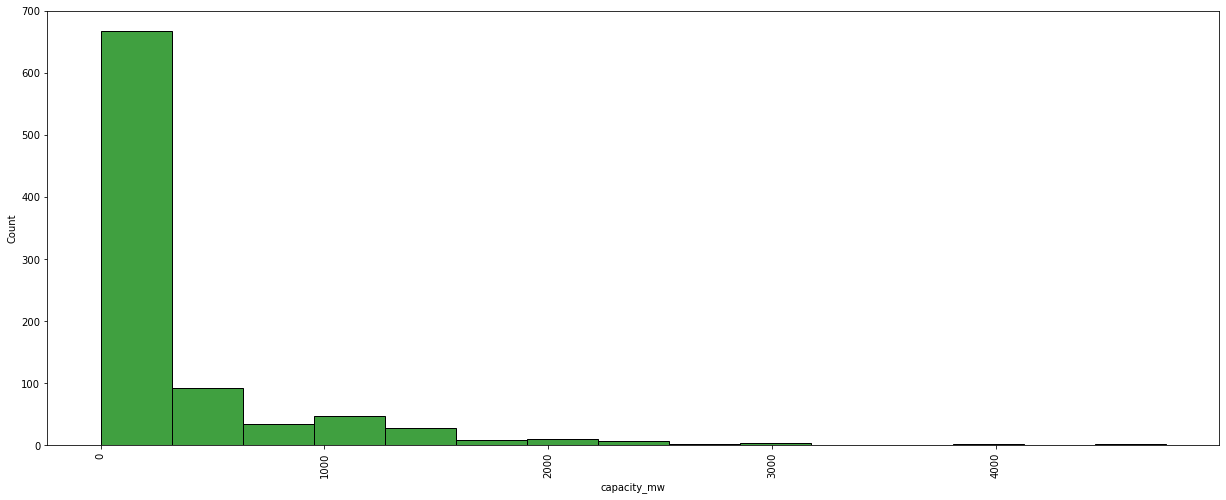



The Histogram Diagram for attribute "latitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


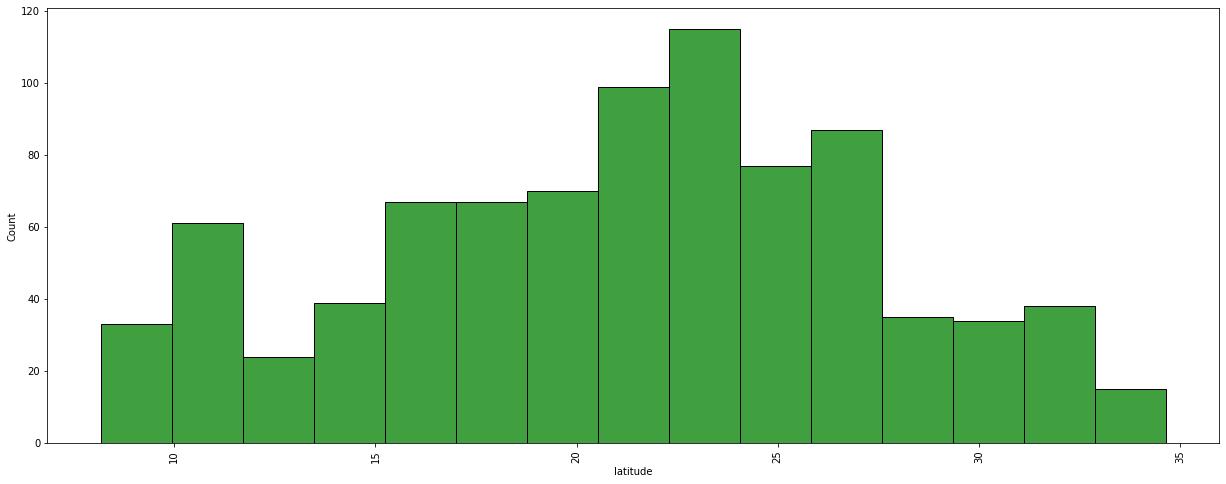



The Histogram Diagram for attribute "longitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


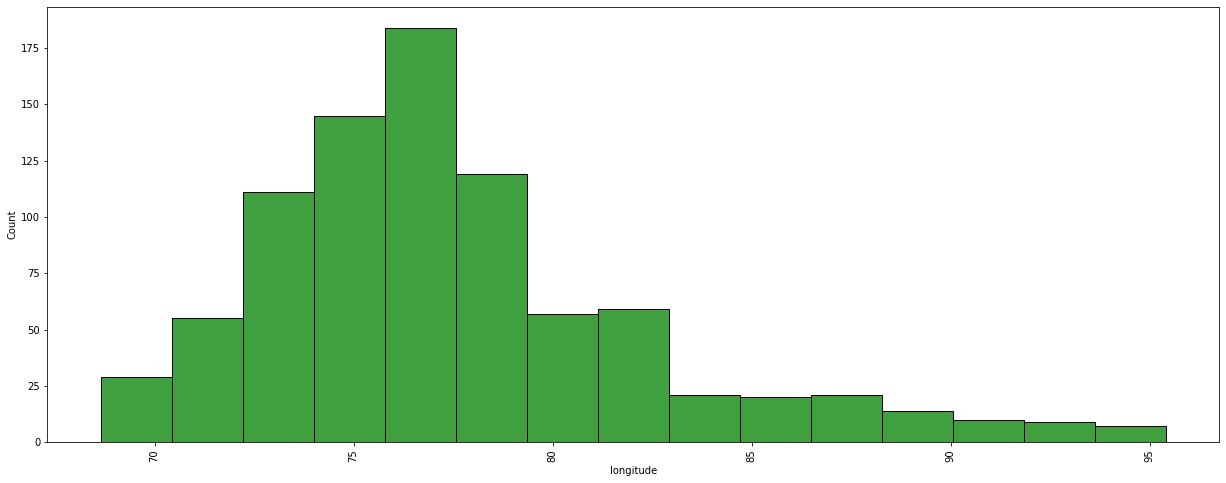



The Histogram Diagram for attribute "primary_fuel" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


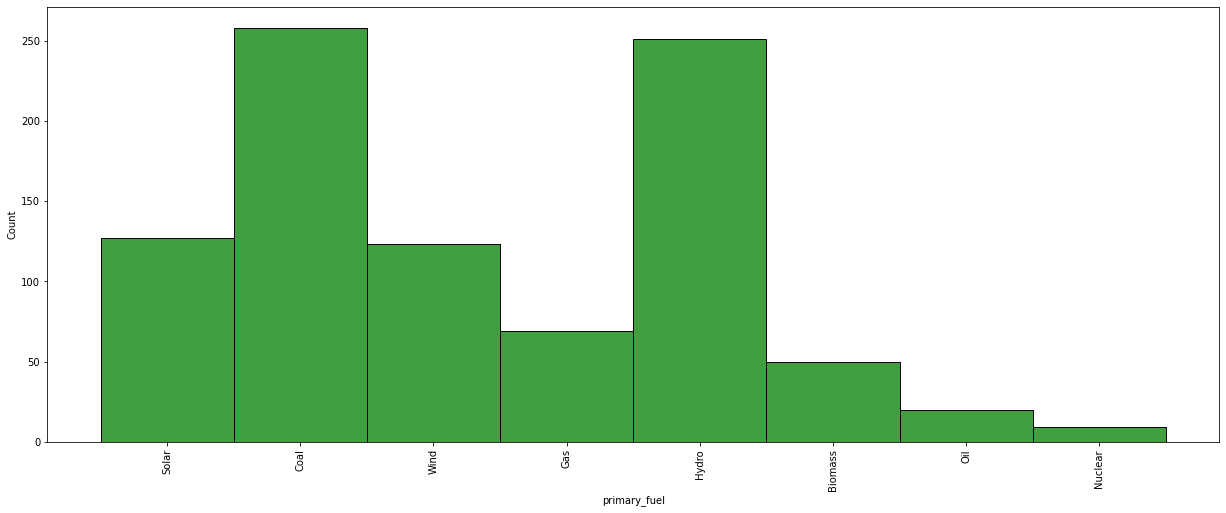



The Histogram Diagram for attribute "other_fuel1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


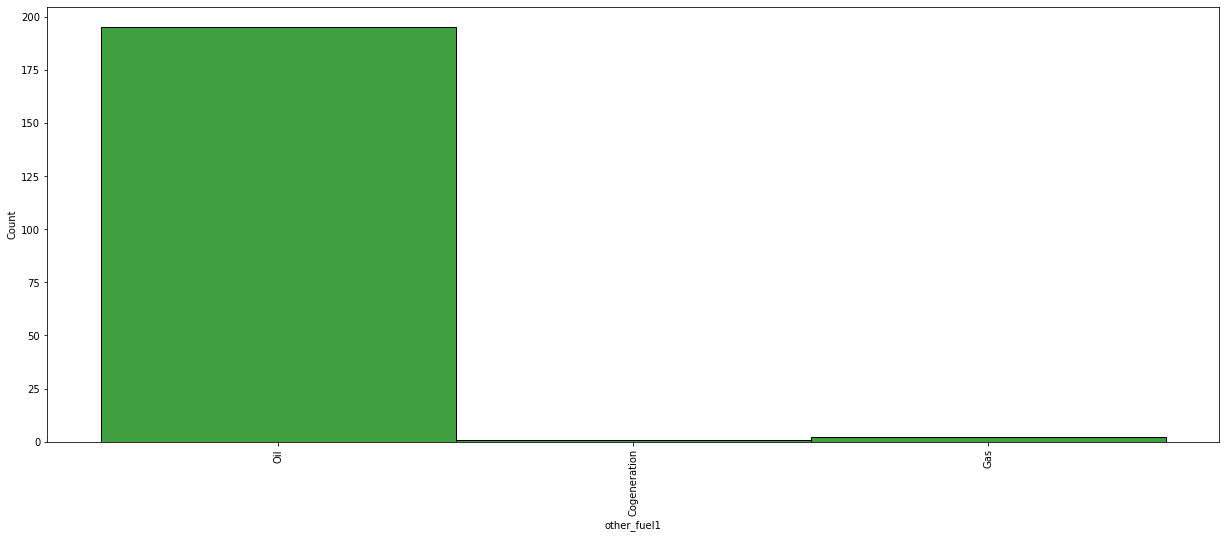



The Histogram Diagram for attribute "commissioning_year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


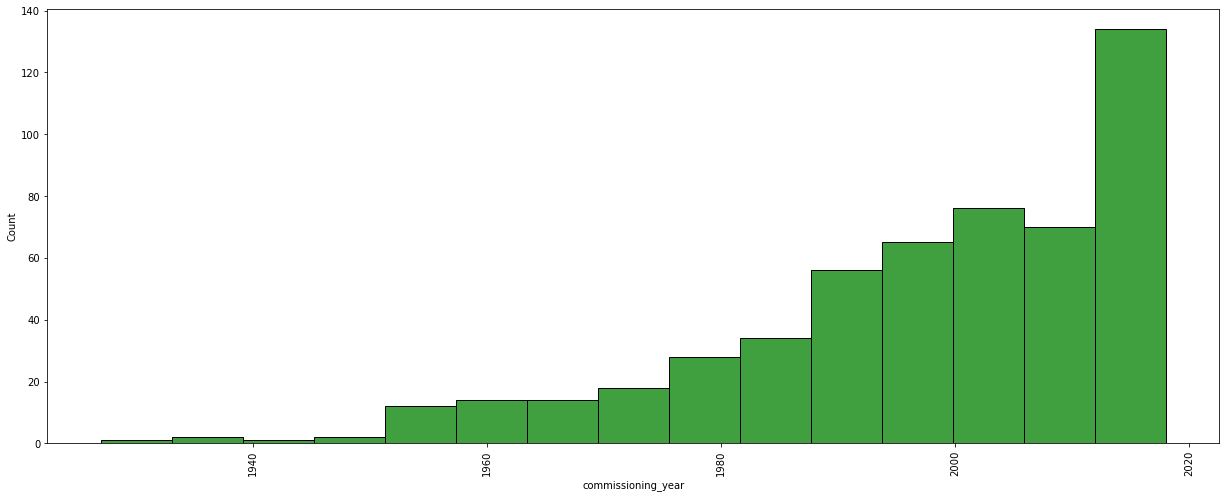



The Histogram Diagram for attribute "owner" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


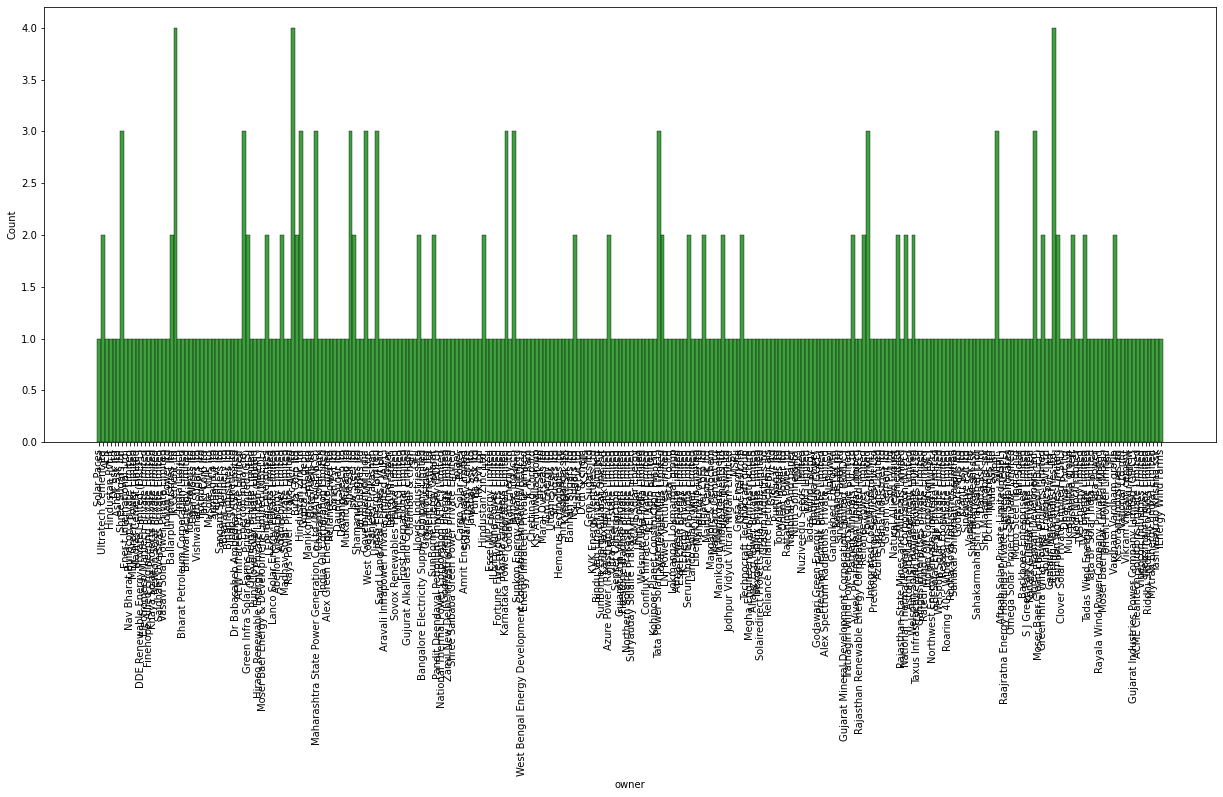



The Histogram Diagram for attribute "source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


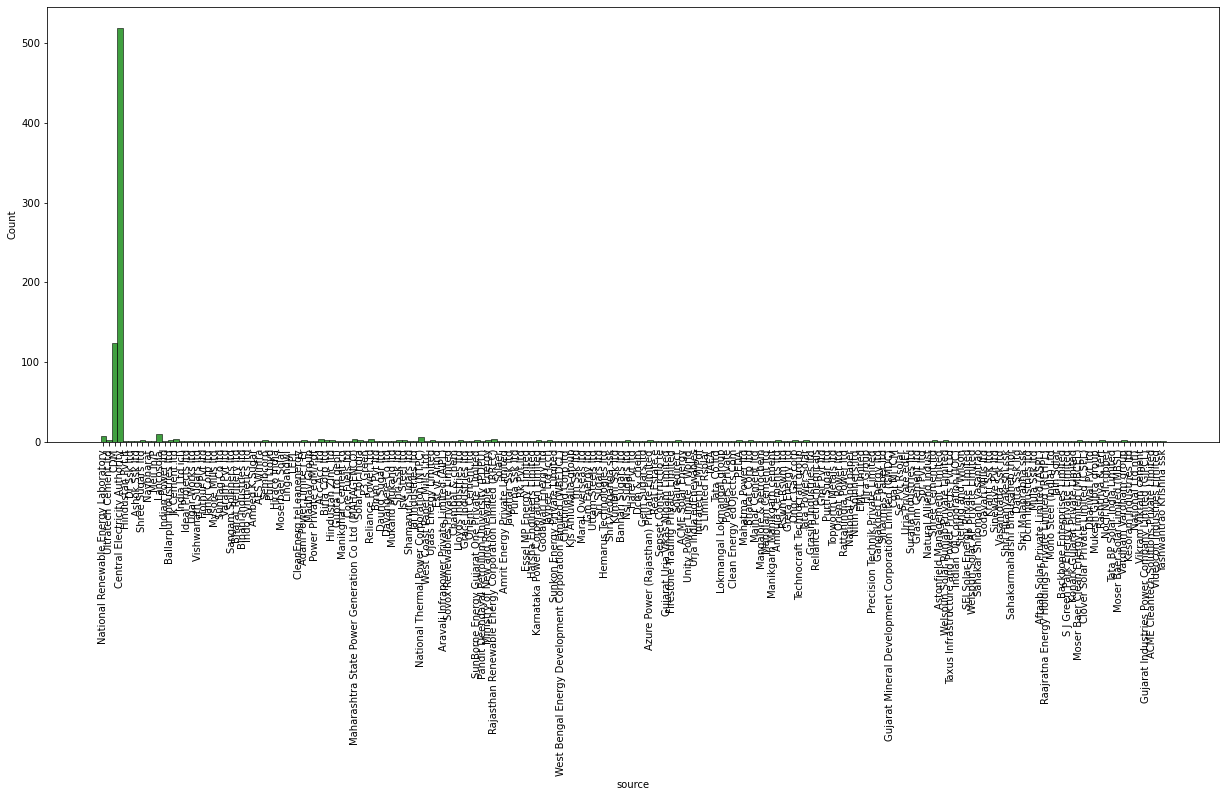



The Histogram Diagram for attribute "geolocation_source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


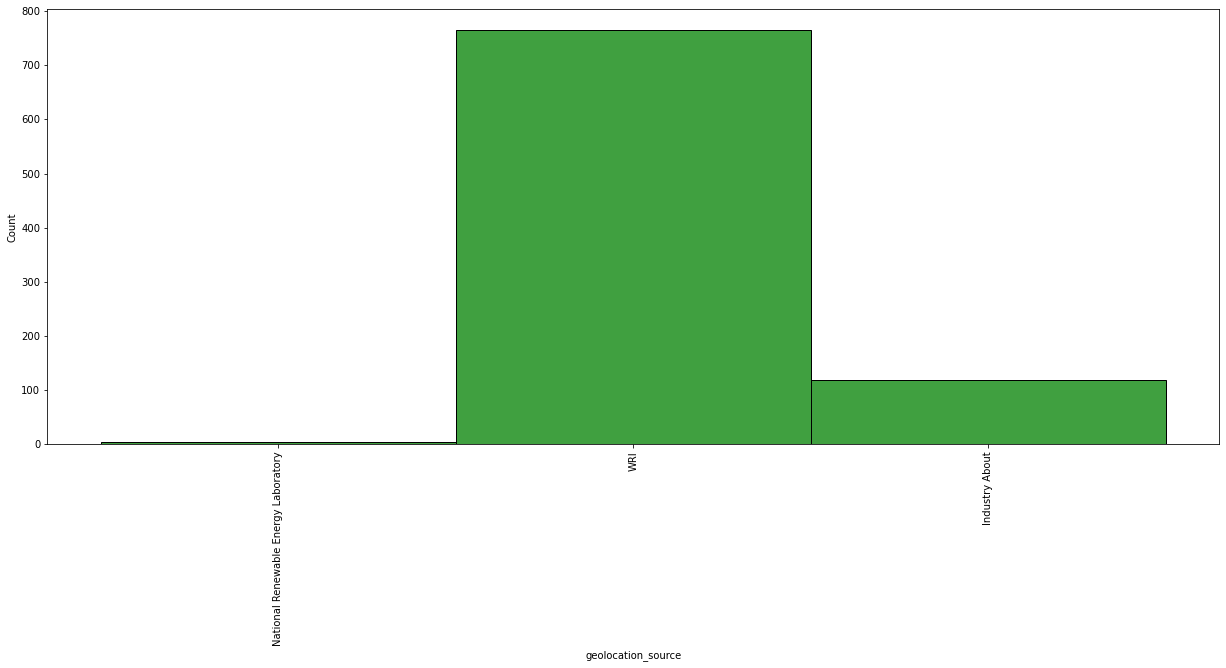



The Histogram Diagram for attribute "generation_gwh_2014" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


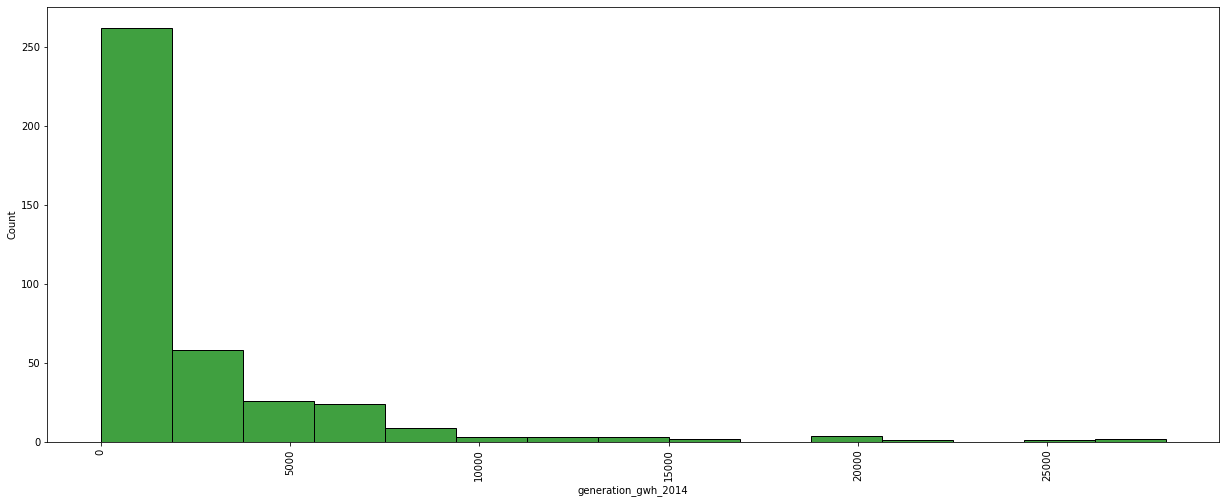



The Histogram Diagram for attribute "generation_gwh_2015" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


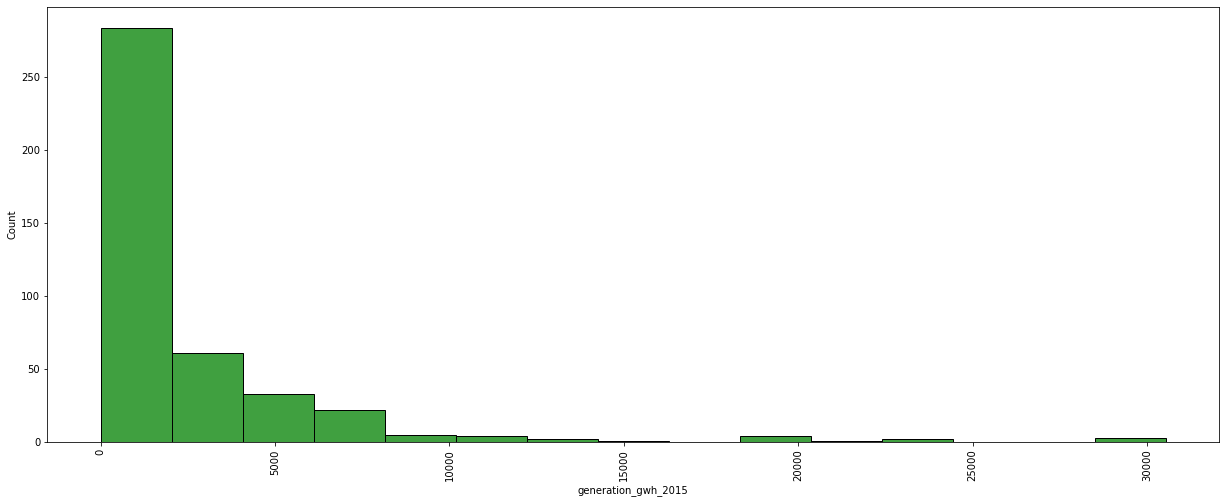



The Histogram Diagram for attribute "generation_gwh_2016" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


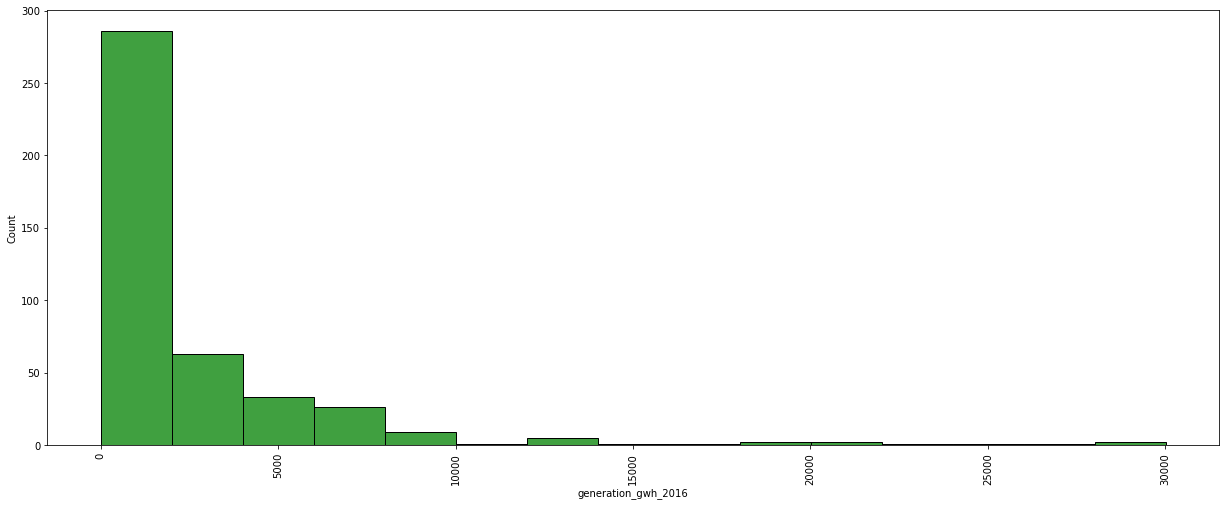



The Histogram Diagram for attribute "generation_gwh_2017" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


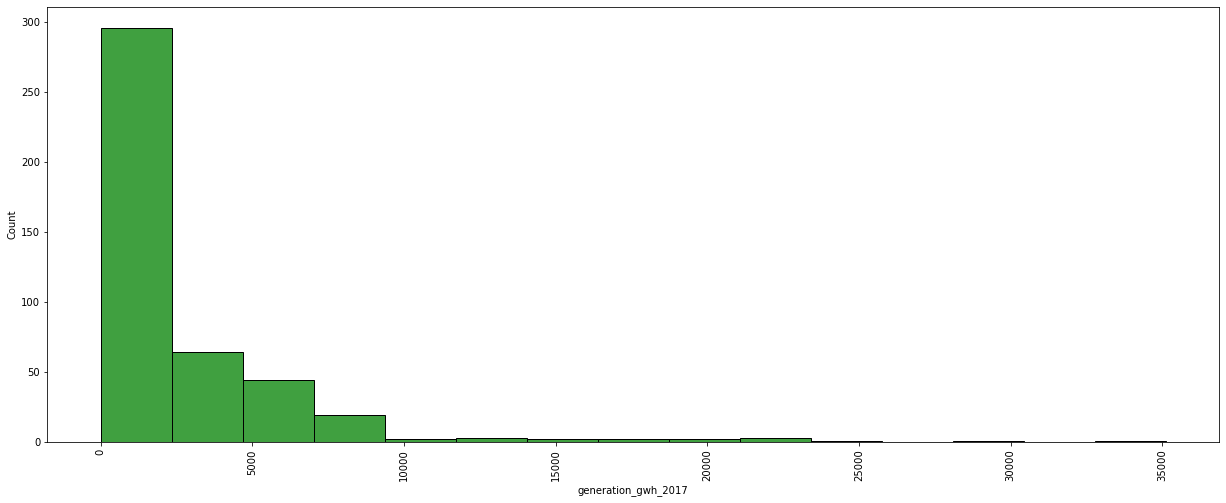



The Histogram Diagram for attribute "generation_gwh_2018" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


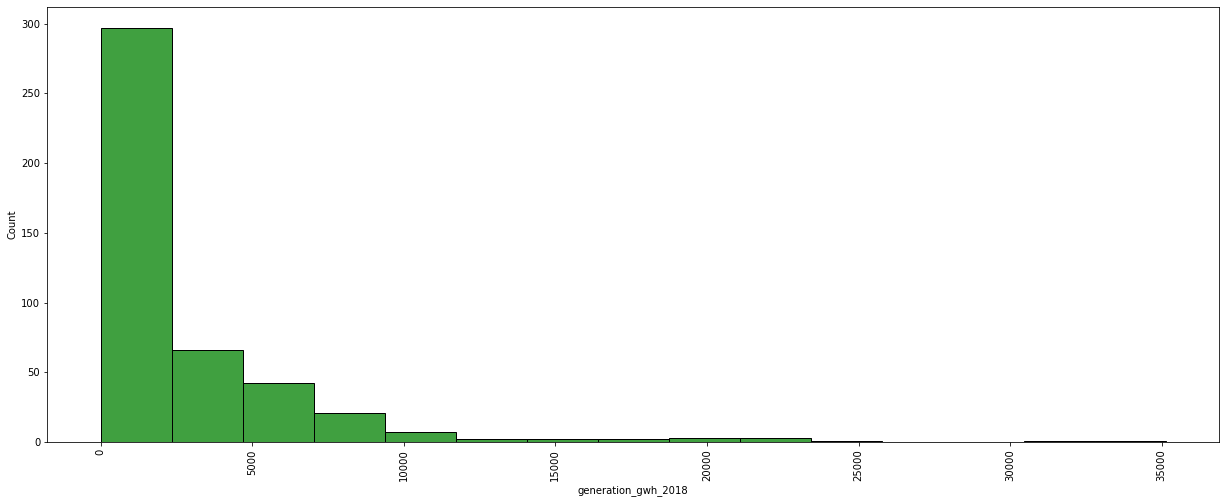

In [55]:
for i in df.columns[1:]:
    plt.figure(figsize=(21,8))
    print(f'The Histogram Diagram for attribute "{i}" is-\n {sns.histplot(df[i],color="g",bins=15)}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

##### This plot basically do the counting of each unique values with respect to given attributes.

1.Most of the powerplants are producing capicity in the range b/w(0-1000)(mw),having latitude range b/w(20-24) & longitude range b/w(76-78).

2.Most of the powerplants are using Coal and Hydro as primary fuel and oil as other fuel 

3.B/w year 2000-2020 most of the power plants are producing more electricity

4.Most of the electricity generated in gigawatt is in the range b/w(0-5000) and hours reported for producing the same is more than 250 hours for the year 2014 and we can now say that by seeing above plot that electricity production and no. of hours consumed for the same is getting increase by each passing year.

#### 2.Scatterplot (x-axis=capacity_mw)

The Scatterplot B/w attributes "capacity_mw" & "capacity_mw" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


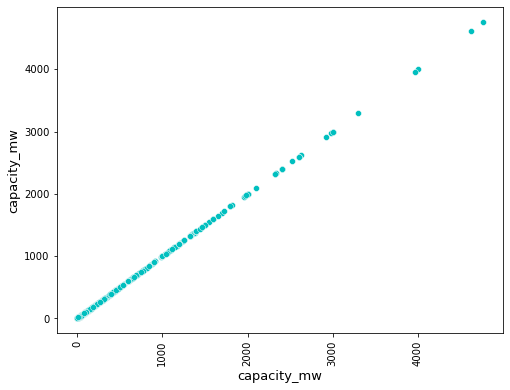



The Scatterplot B/w attributes "capacity_mw" & "latitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


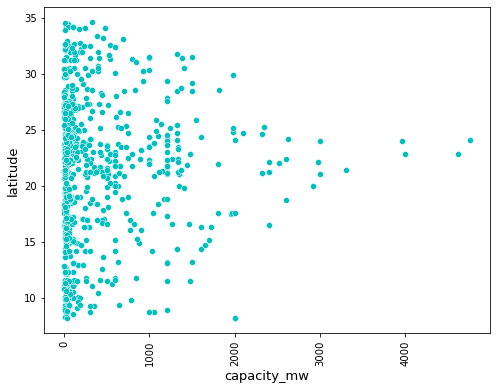



The Scatterplot B/w attributes "capacity_mw" & "longitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


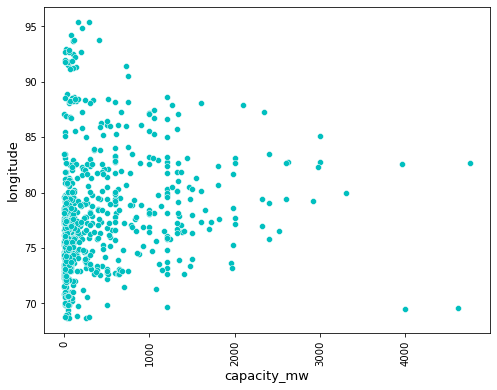



The Scatterplot B/w attributes "capacity_mw" & "primary_fuel" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


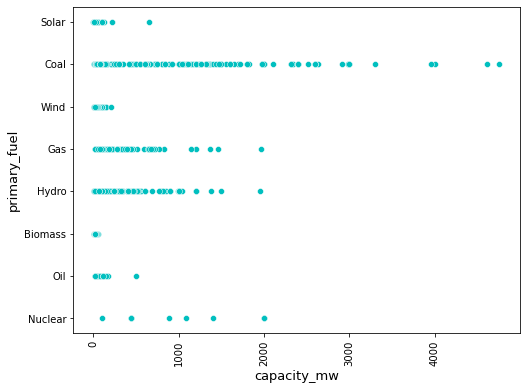



The Scatterplot B/w attributes "capacity_mw" & "other_fuel1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


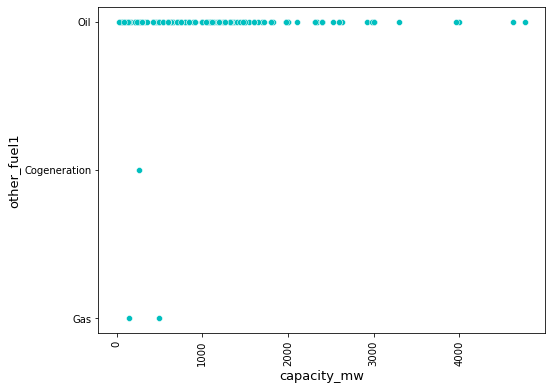



The Scatterplot B/w attributes "capacity_mw" & "commissioning_year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


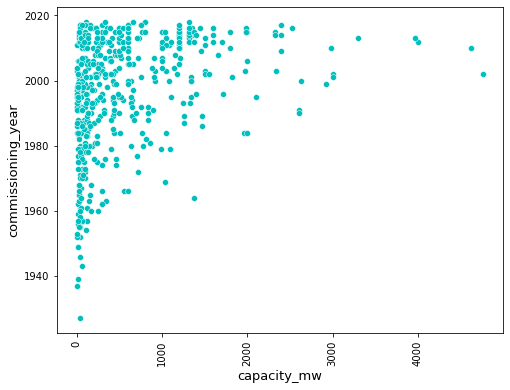



The Scatterplot B/w attributes "capacity_mw" & "owner" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


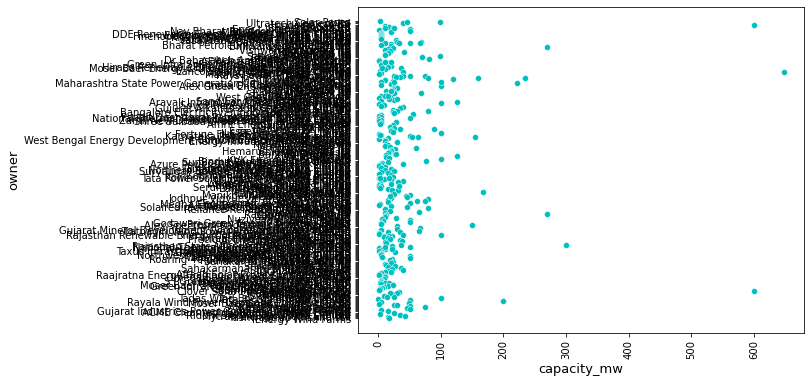



The Scatterplot B/w attributes "capacity_mw" & "source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


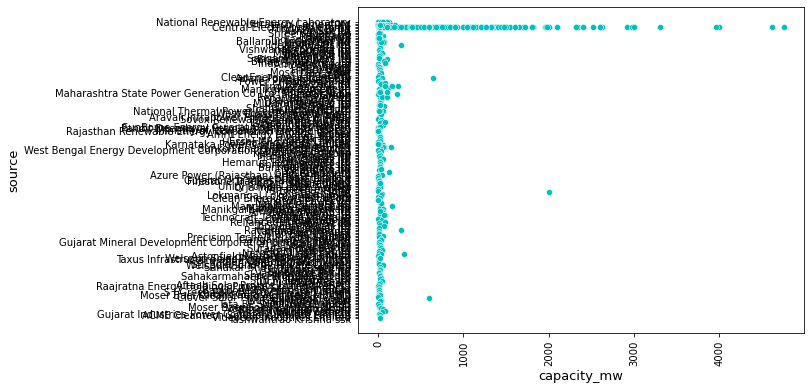



The Scatterplot B/w attributes "capacity_mw" & "geolocation_source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


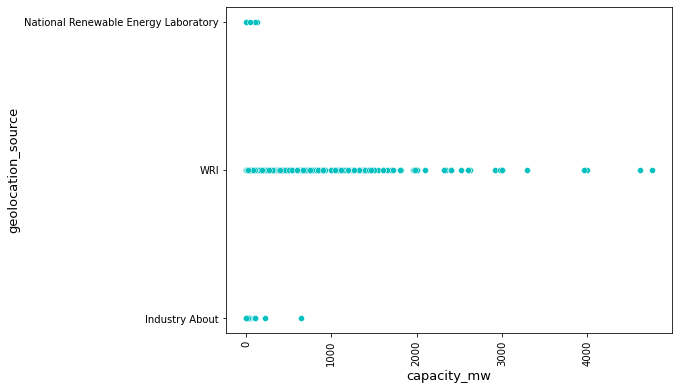



The Scatterplot B/w attributes "capacity_mw" & "generation_gwh_2014" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


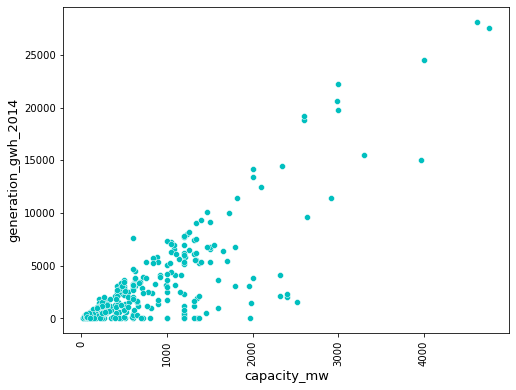



The Scatterplot B/w attributes "capacity_mw" & "generation_gwh_2015" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


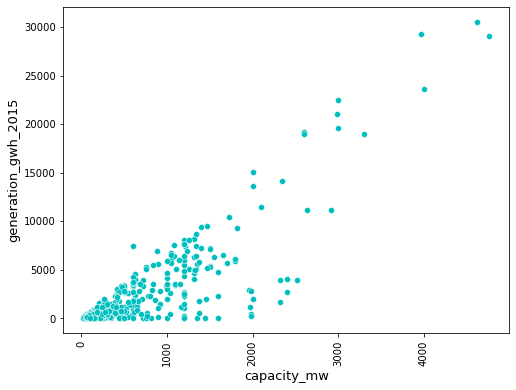



The Scatterplot B/w attributes "capacity_mw" & "generation_gwh_2016" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


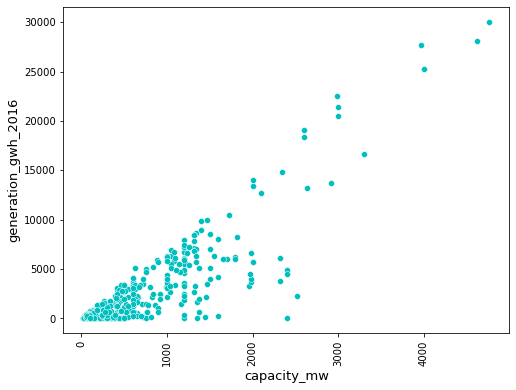



The Scatterplot B/w attributes "capacity_mw" & "generation_gwh_2017" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


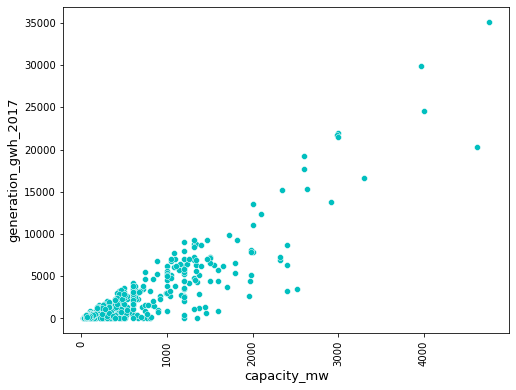



The Scatterplot B/w attributes "capacity_mw" & "generation_gwh_2018" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


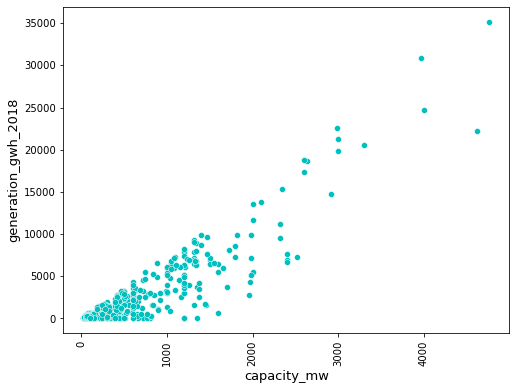

In [65]:
for i in df.columns[1:]:
    plt.figure(figsize=(8,6))
    print(f'The Scatterplot B/w attributes "capacity_mw" & "{i}" is-\n {sns.scatterplot(df["capacity_mw"],df[i],color="c")}')
    plt.xticks(rotation=90)
    plt.ylabel(f'{i}',fontsize=13)
    plt.xlabel("capacity_mw",fontsize=13)
    plt.show()
    print('\n')

##### coal and hydro are most useful among other primary fuels while producing the electricity 

##### Oil usage are most as comapre to other fuel category in producing electricity

##### B/w year 2000-2020 electricity production is increasing

##### Most of the powerplants are generating the electricity in the capacity b/w (0-200) megawatt.

##### Strong Positive correlation exist b/w capacity_mw and generation_gwh (for each year 2014,2015,16,17,18,19) 


#### 3.Lineplot

The Lineplot B/w attributes "capacity_mw" & "capacity_mw" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


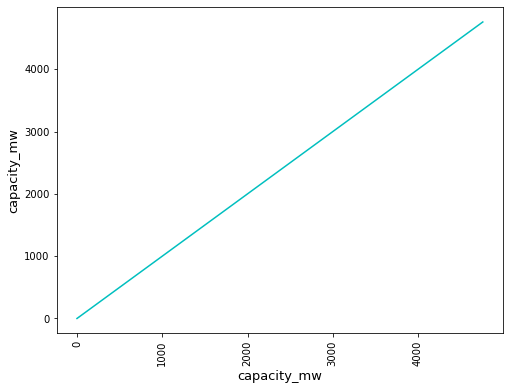



The Lineplot B/w attributes "capacity_mw" & "latitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


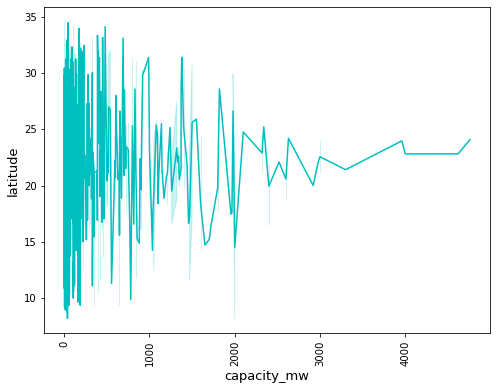



The Lineplot B/w attributes "capacity_mw" & "longitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


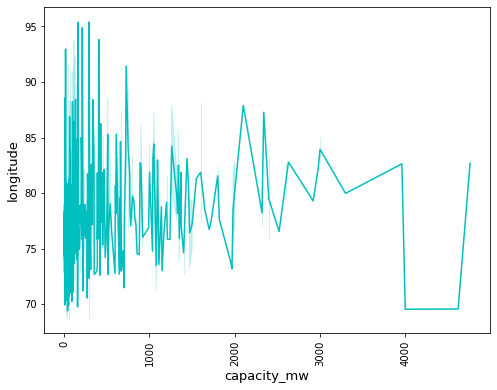



The Lineplot B/w attributes "capacity_mw" & "primary_fuel" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


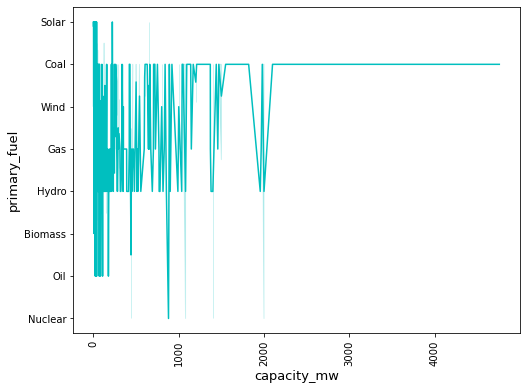



The Lineplot B/w attributes "capacity_mw" & "other_fuel1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


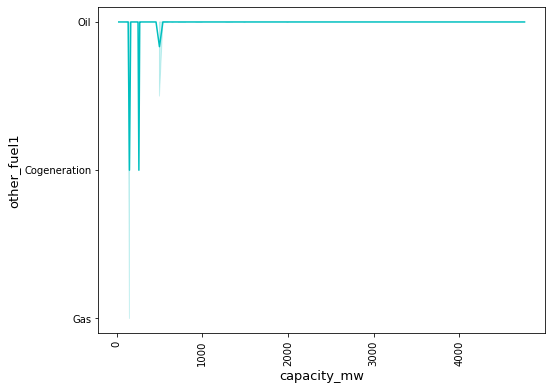



The Lineplot B/w attributes "capacity_mw" & "commissioning_year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


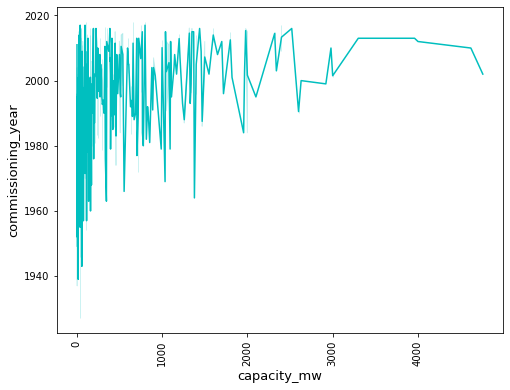



The Lineplot B/w attributes "capacity_mw" & "owner" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


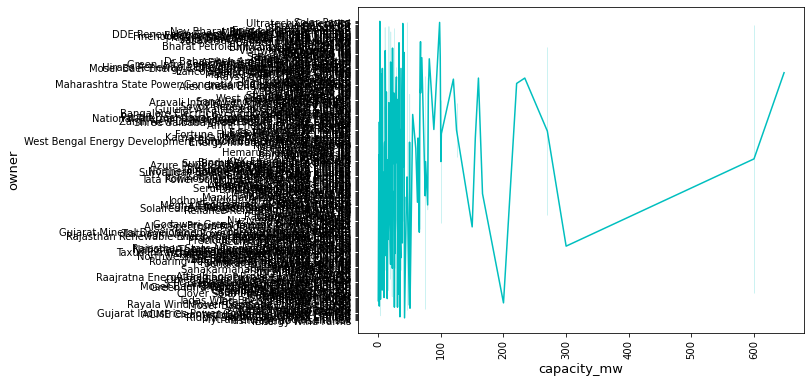



The Lineplot B/w attributes "capacity_mw" & "source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


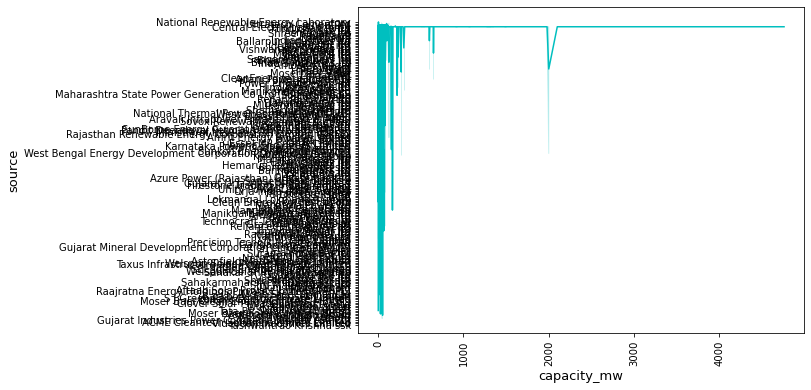



The Lineplot B/w attributes "capacity_mw" & "geolocation_source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


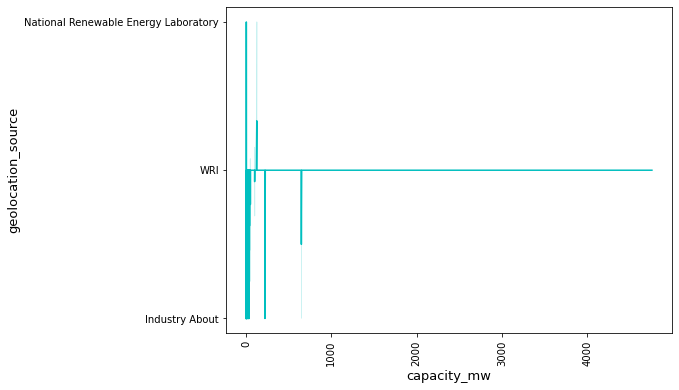



The Lineplot B/w attributes "capacity_mw" & "generation_gwh_2014" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


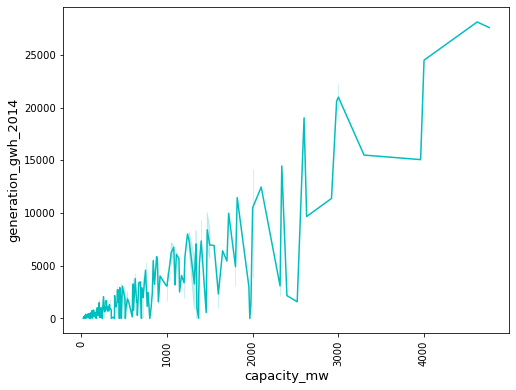



The Lineplot B/w attributes "capacity_mw" & "generation_gwh_2015" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


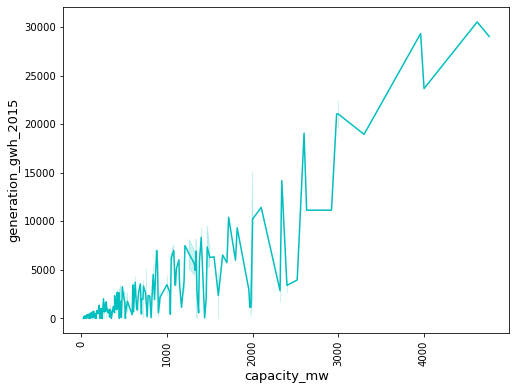



The Lineplot B/w attributes "capacity_mw" & "generation_gwh_2016" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


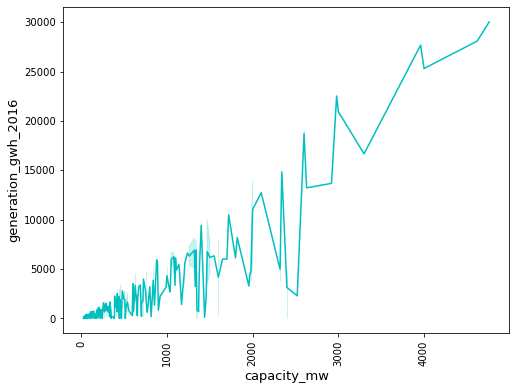



The Lineplot B/w attributes "capacity_mw" & "generation_gwh_2017" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


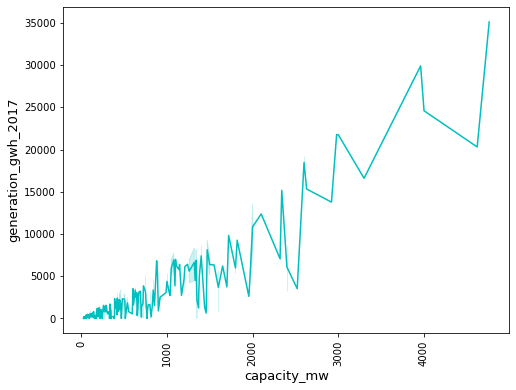



The Lineplot B/w attributes "capacity_mw" & "generation_gwh_2018" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


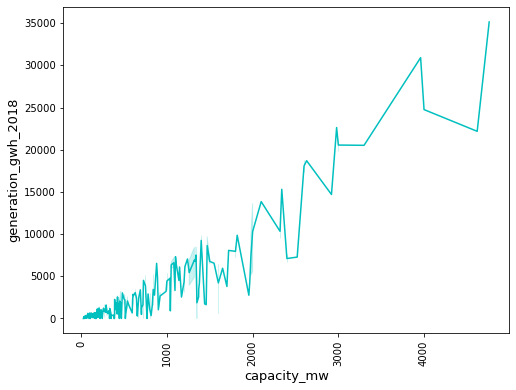

In [60]:
for i in df.columns[1:]:
    plt.figure(figsize=(8,6))
    print(f'The Lineplot B/w attributes "capacity_mw" & "{i}" is-\n {sns.lineplot(df["capacity_mw"],df[i],color="c")}')
    plt.xticks(rotation=90)
    plt.ylabel(f'{i}',fontsize=13)
    plt.xlabel("capacity_mw",fontsize=13)
    plt.show()
    print('\n')

This basically indicates the trend for each attributes,as we can say that the lattitude trend and longitude trend is occuring most b/w range (0-200) and (0-900) w.r.t. capacity.Similarly we can see for the rest parameters

#### 4.JointPlot

The Jointplot B/w attributes "capacity_mw" & "capacity_mw" is-


<Figure size 576x432 with 0 Axes>

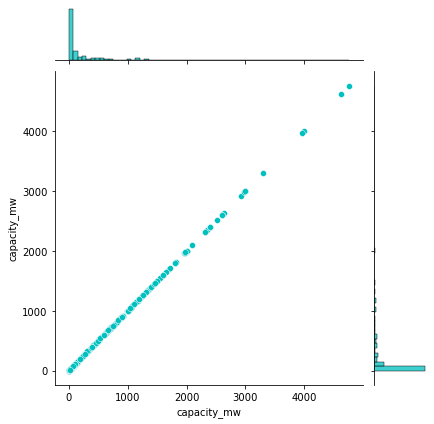



The Jointplot B/w attributes "capacity_mw" & "latitude" is-


<Figure size 576x432 with 0 Axes>

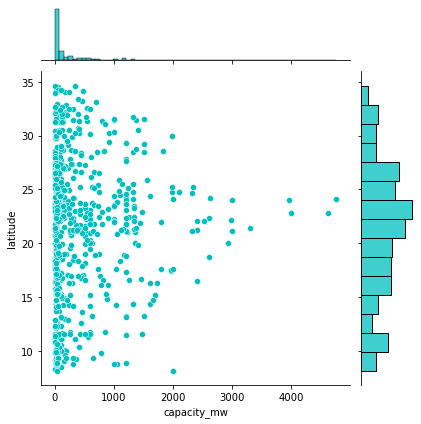



The Jointplot B/w attributes "capacity_mw" & "longitude" is-


<Figure size 576x432 with 0 Axes>

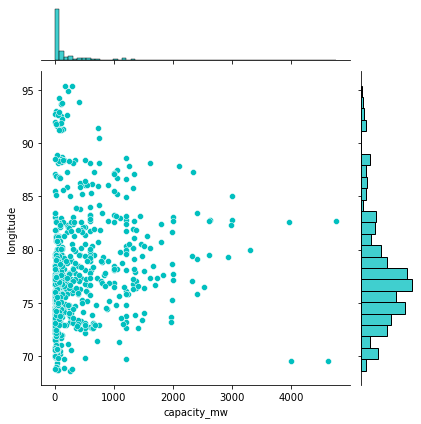



The Jointplot B/w attributes "capacity_mw" & "primary_fuel" is-


<Figure size 576x432 with 0 Axes>

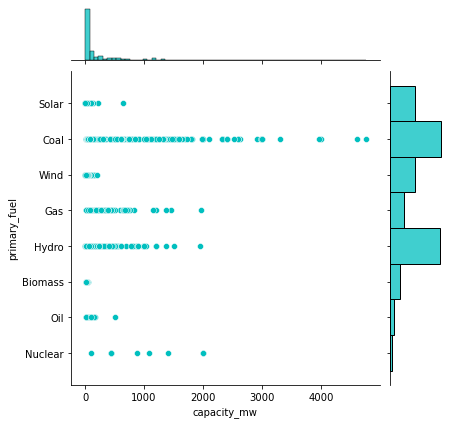



The Jointplot B/w attributes "capacity_mw" & "other_fuel1" is-


<Figure size 576x432 with 0 Axes>

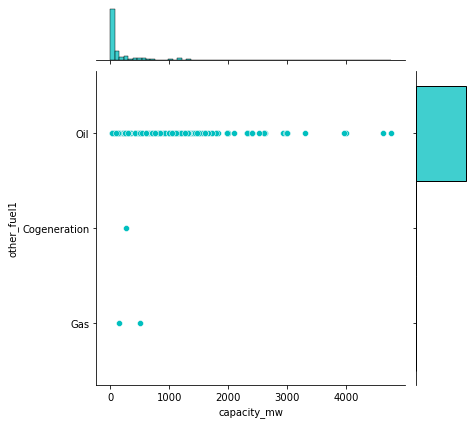



The Jointplot B/w attributes "capacity_mw" & "commissioning_year" is-


<Figure size 576x432 with 0 Axes>

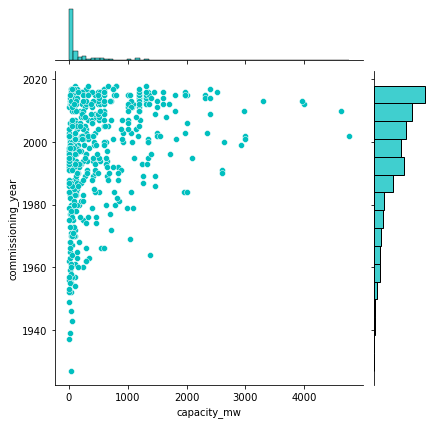



The Jointplot B/w attributes "capacity_mw" & "owner" is-


<Figure size 576x432 with 0 Axes>

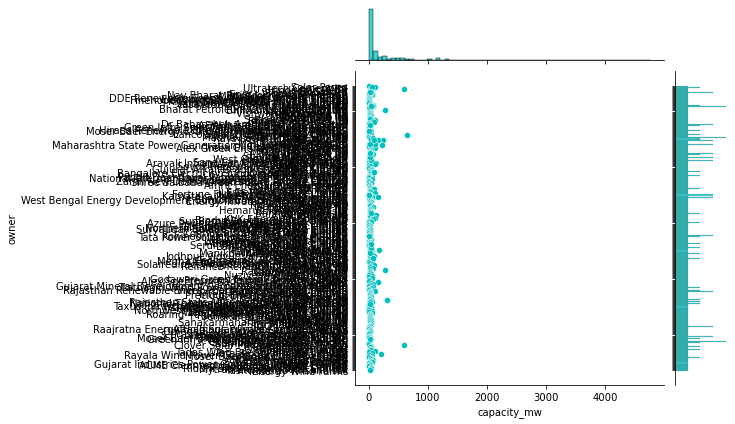



The Jointplot B/w attributes "capacity_mw" & "source" is-


<Figure size 576x432 with 0 Axes>

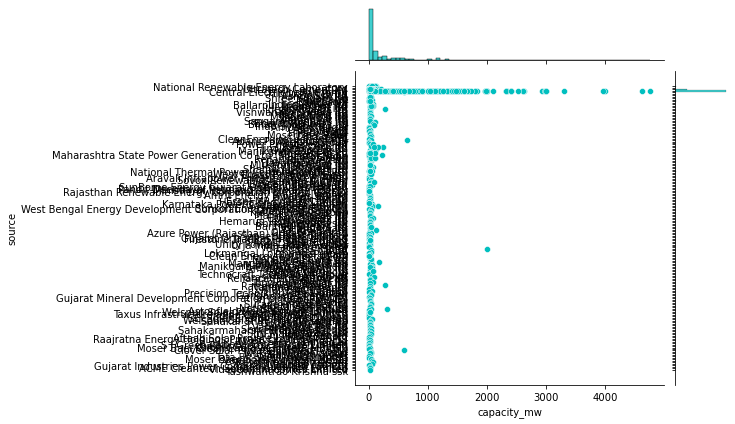



The Jointplot B/w attributes "capacity_mw" & "geolocation_source" is-


<Figure size 576x432 with 0 Axes>

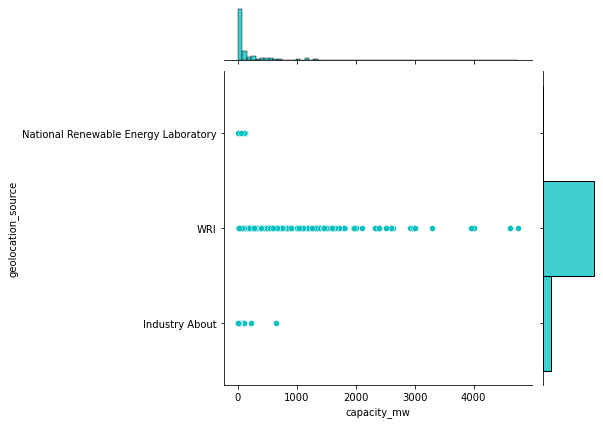



The Jointplot B/w attributes "capacity_mw" & "generation_gwh_2014" is-


<Figure size 576x432 with 0 Axes>

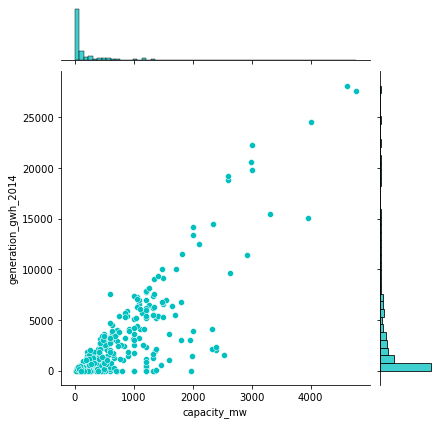



The Jointplot B/w attributes "capacity_mw" & "generation_gwh_2015" is-


<Figure size 576x432 with 0 Axes>

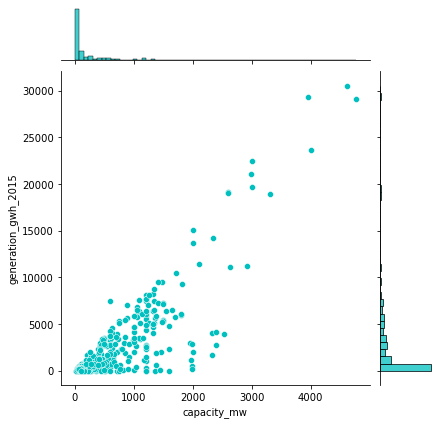



The Jointplot B/w attributes "capacity_mw" & "generation_gwh_2016" is-


<Figure size 576x432 with 0 Axes>

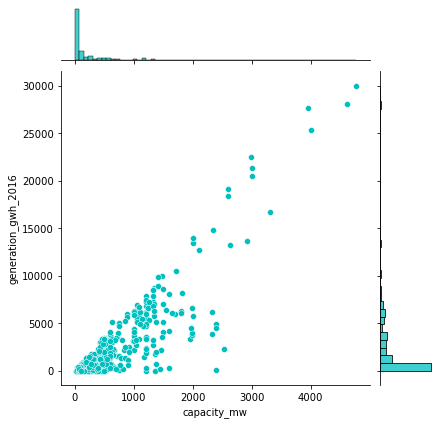



The Jointplot B/w attributes "capacity_mw" & "generation_gwh_2017" is-


<Figure size 576x432 with 0 Axes>

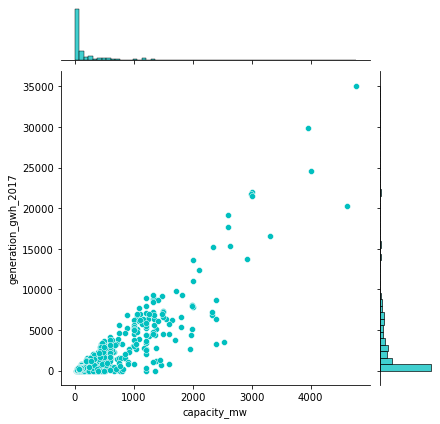



The Jointplot B/w attributes "capacity_mw" & "generation_gwh_2018" is-


<Figure size 576x432 with 0 Axes>

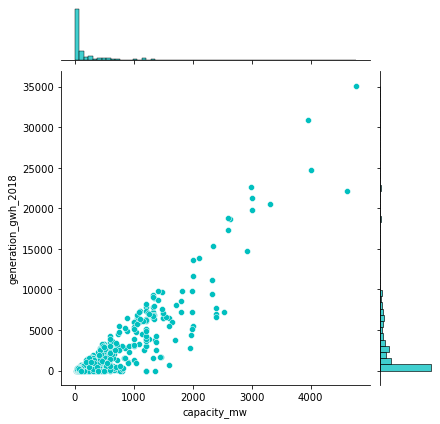

In [61]:
for i in df.columns[1:]:
    plt.figure(figsize=(8,6))
    print(f'The Jointplot B/w attributes "capacity_mw" & "{i}" is-\n {sns.jointplot(df["capacity_mw"],df[i],color="c")}')
    plt.xticks(rotation=90)
    plt.ylabel(f'{i}',fontsize=13)
    plt.xlabel("capacity_mw",fontsize=13)
    plt.show()
    print('\n')

Jointplot basically combines two plot all together for the visualization.This plot is basically a combination of scatter and bar diagrams.If i talk about the 4th diagram it's telling us that however attribute primary fuel is distributed everywhere but it's distribution is most for Coal w.r.t. capacity. 

#### 5.Scatterplot (x-axis= primary_fuel)

The Scatterplot B/w attributes "primary_fuel" & "capacity_mw" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


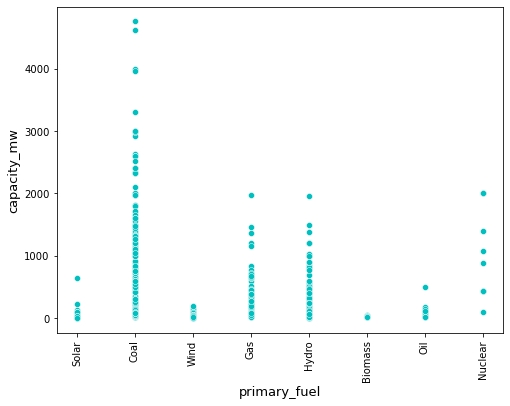



The Scatterplot B/w attributes "primary_fuel" & "latitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


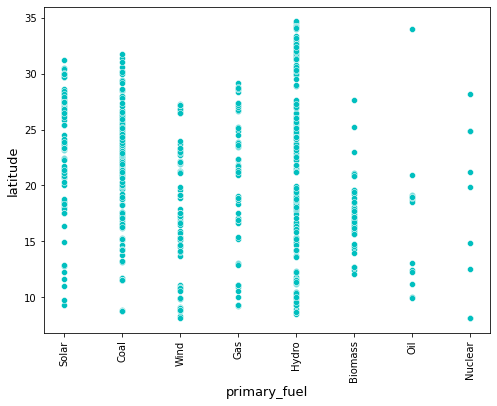



The Scatterplot B/w attributes "primary_fuel" & "longitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


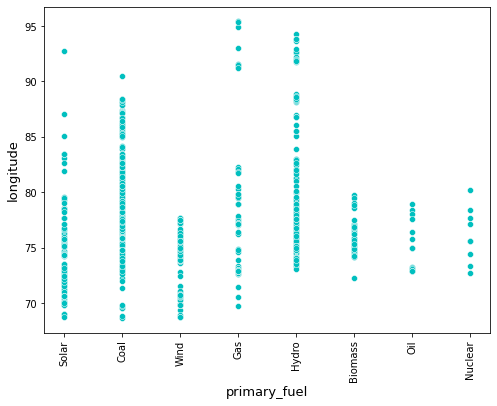



The Scatterplot B/w attributes "primary_fuel" & "primary_fuel" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


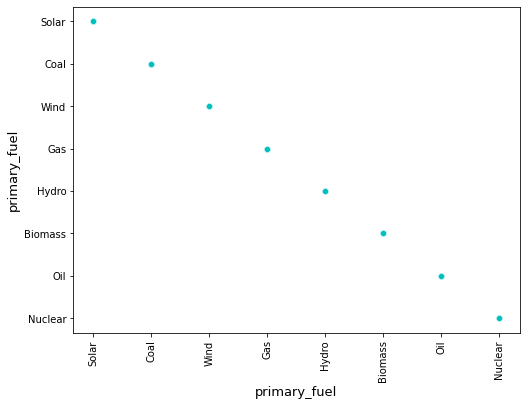



The Scatterplot B/w attributes "primary_fuel" & "other_fuel1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


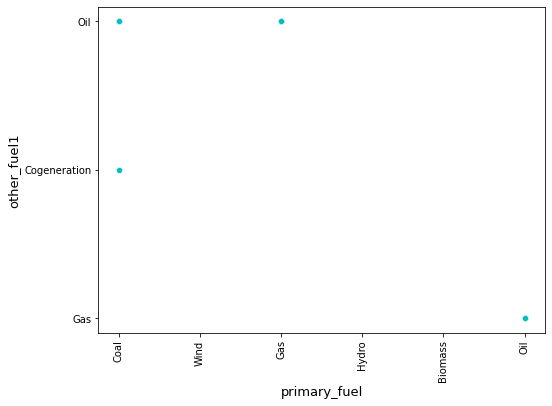



The Scatterplot B/w attributes "primary_fuel" & "commissioning_year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


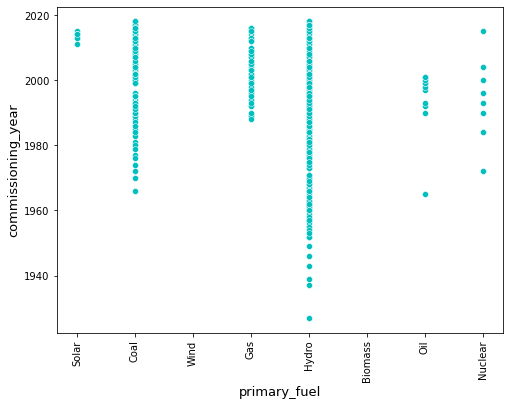



The Scatterplot B/w attributes "primary_fuel" & "owner" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


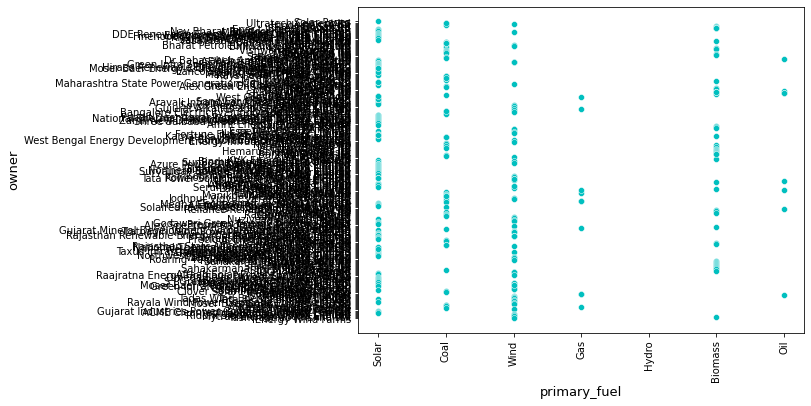



The Scatterplot B/w attributes "primary_fuel" & "source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


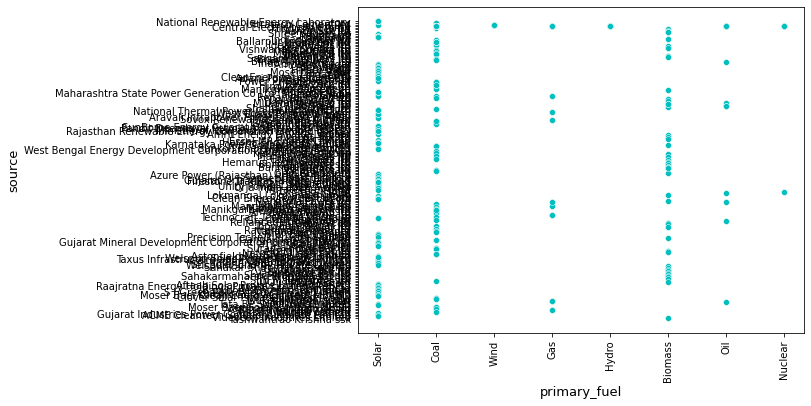



The Scatterplot B/w attributes "primary_fuel" & "geolocation_source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


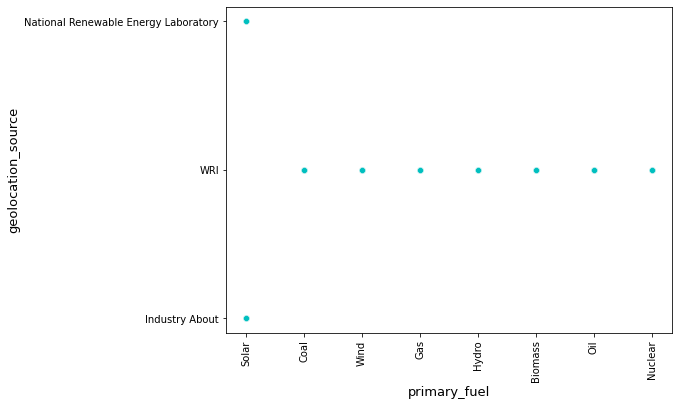



The Scatterplot B/w attributes "primary_fuel" & "generation_gwh_2014" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


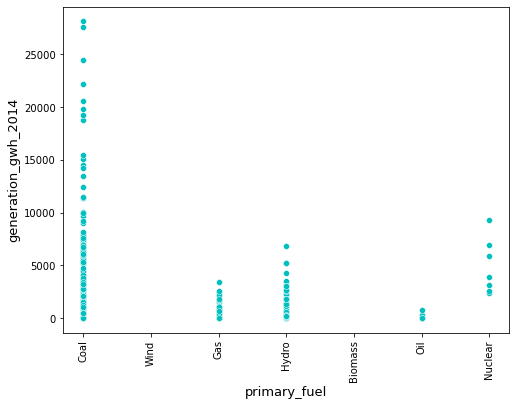



The Scatterplot B/w attributes "primary_fuel" & "generation_gwh_2015" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


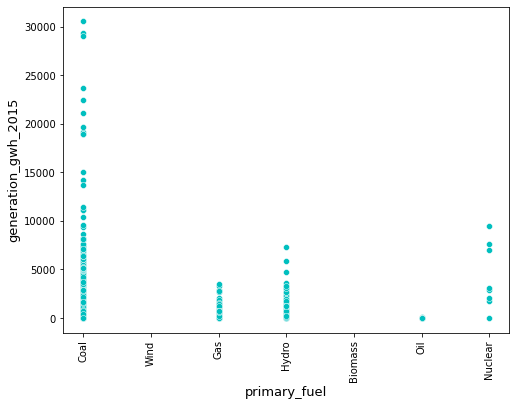



The Scatterplot B/w attributes "primary_fuel" & "generation_gwh_2016" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


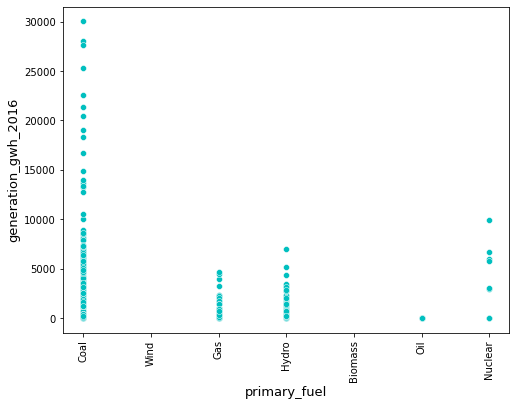



The Scatterplot B/w attributes "primary_fuel" & "generation_gwh_2017" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


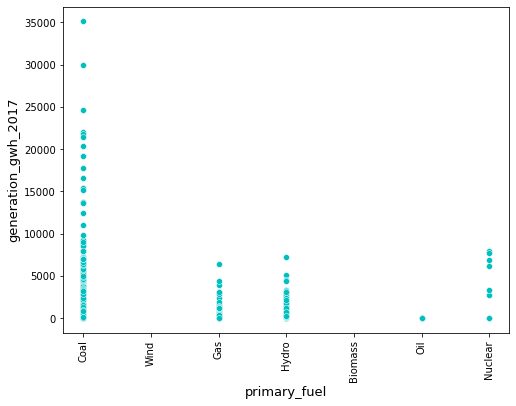



The Scatterplot B/w attributes "primary_fuel" & "generation_gwh_2018" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


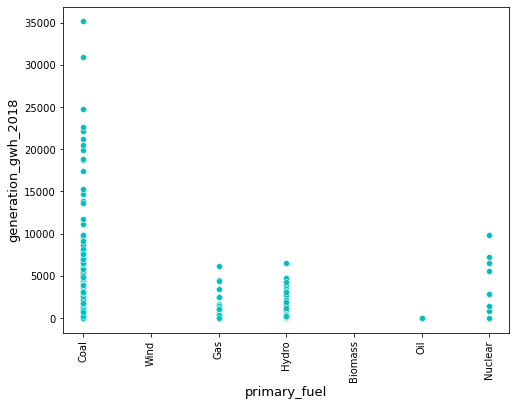

In [63]:
for i in df.columns[1:]:
    plt.figure(figsize=(8,6))
    print(f'The Scatterplot B/w attributes "primary_fuel" & "{i}" is-\n {sns.scatterplot(df["primary_fuel"],df[i],color="c")}')
    plt.xticks(rotation=90)
    plt.ylabel(f'{i}',fontsize=13)
    plt.xlabel("primary_fuel",fontsize=13)
    plt.show()
    print('\n')

##### coal is the most useful among other primary fuels while producing the electricity
##### Hydro fuel usage are increasing year on year rapidly
##### While generating electricity in giga_watt_hour the most useful primary fuel is coal

#### 6.Lineplot(x-axis= primary_fuel)

The Lineplot B/w attributes "primary_fuel" & "capacity_mw" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


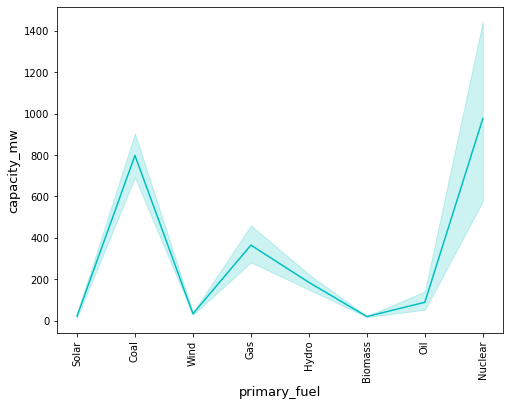



The Lineplot B/w attributes "primary_fuel" & "latitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


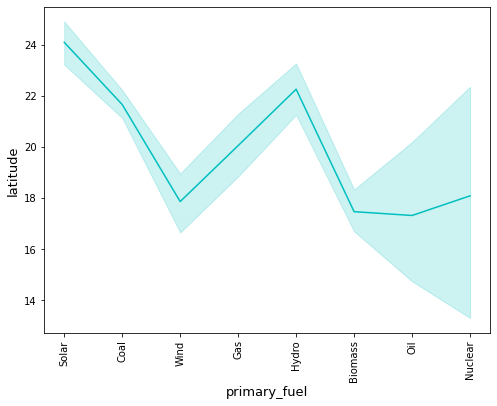



The Lineplot B/w attributes "primary_fuel" & "longitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


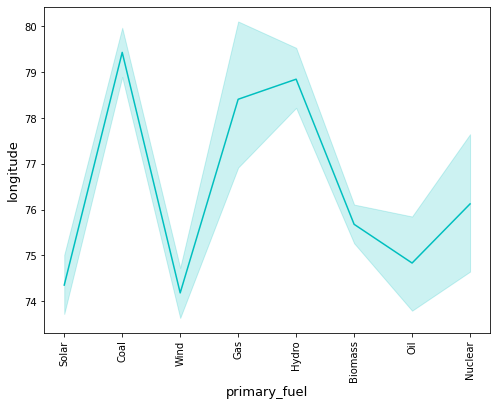



The Lineplot B/w attributes "primary_fuel" & "primary_fuel" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


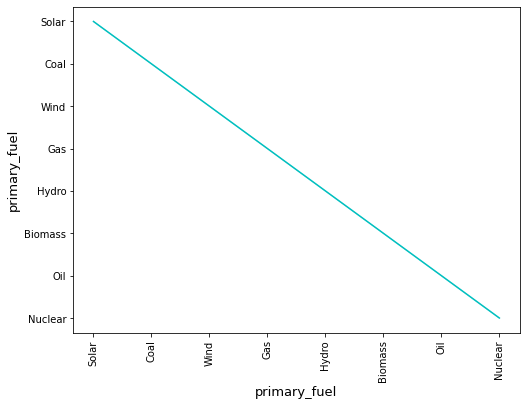



The Lineplot B/w attributes "primary_fuel" & "other_fuel1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


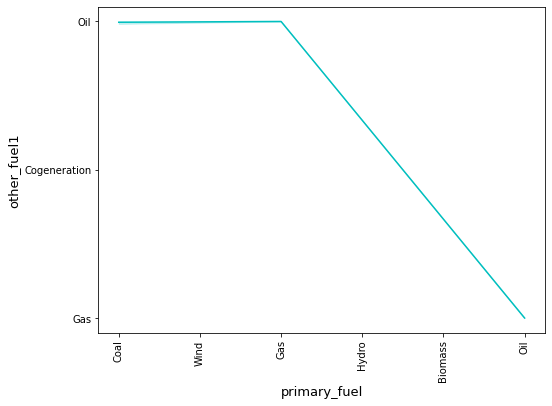



The Lineplot B/w attributes "primary_fuel" & "commissioning_year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


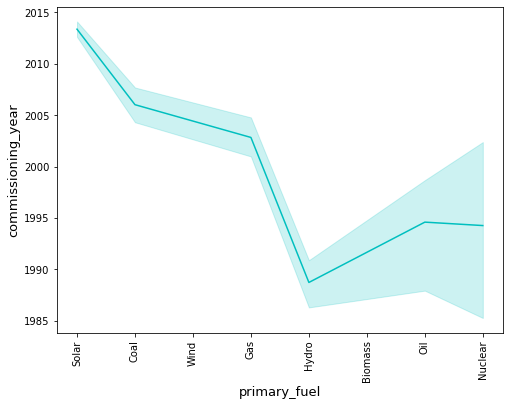



The Lineplot B/w attributes "primary_fuel" & "owner" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


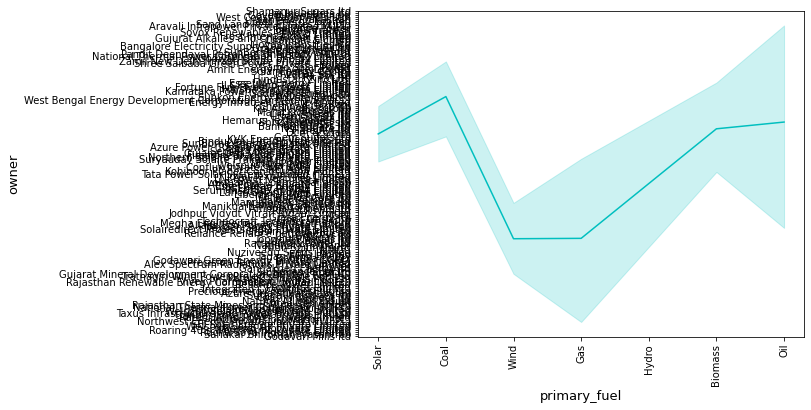



The Lineplot B/w attributes "primary_fuel" & "source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


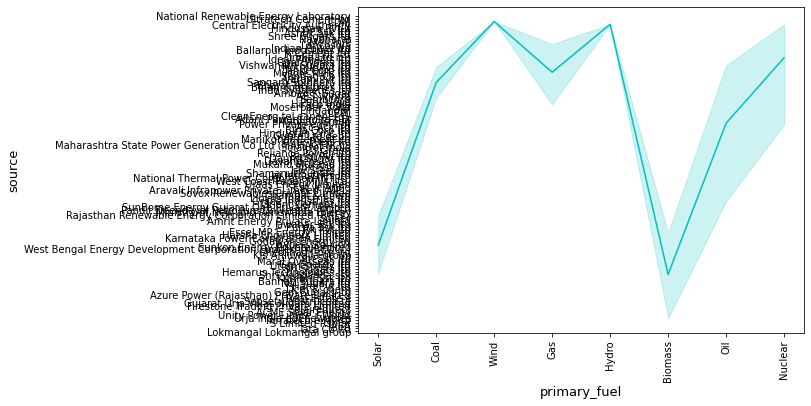



The Lineplot B/w attributes "primary_fuel" & "geolocation_source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


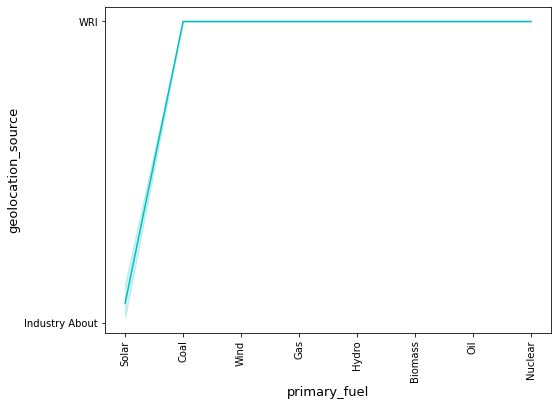



The Lineplot B/w attributes "primary_fuel" & "generation_gwh_2014" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


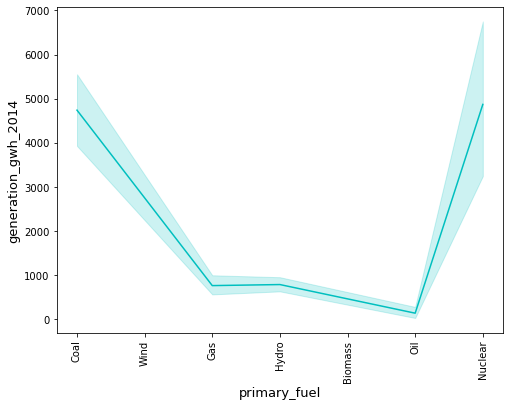



The Lineplot B/w attributes "primary_fuel" & "generation_gwh_2015" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


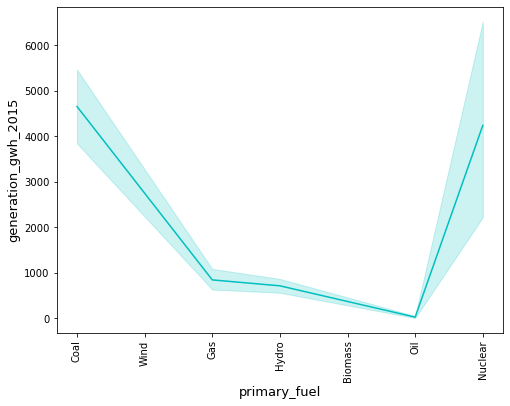



The Lineplot B/w attributes "primary_fuel" & "generation_gwh_2016" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


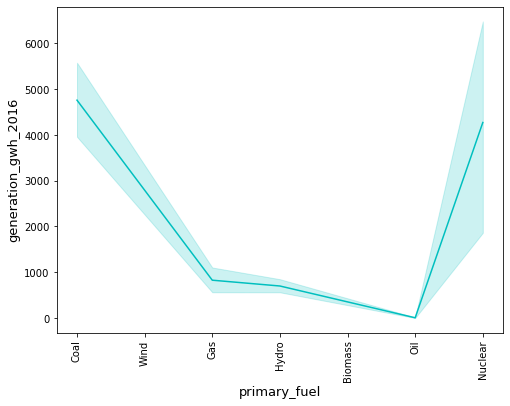



The Lineplot B/w attributes "primary_fuel" & "generation_gwh_2017" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


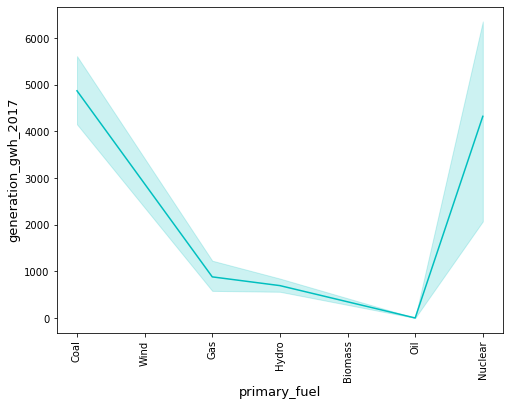



The Lineplot B/w attributes "primary_fuel" & "generation_gwh_2018" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


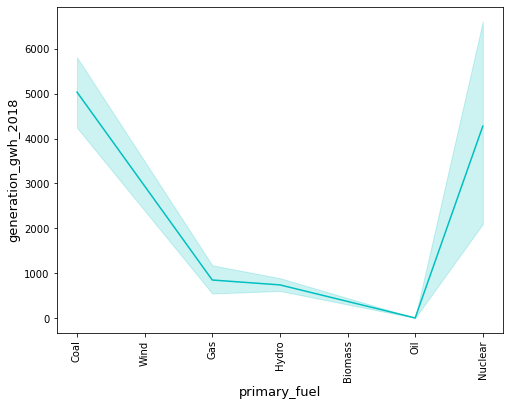

In [64]:
for i in df.columns[1:]:
    plt.figure(figsize=(8,6))
    print(f'The Lineplot B/w attributes "primary_fuel" & "{i}" is-\n {sns.lineplot(df["primary_fuel"],df[i],color="c")}')
    plt.xticks(rotation=90)
    plt.ylabel(f'{i}',fontsize=13)
    plt.xlabel("primary_fuel",fontsize=13)
    plt.show()
    print('\n')

##### In the first figure it's showing that the capacity in megawatt is almost 0 when they generating the electricity with the help of primary fuel Solar and capacity goes up to 800mw when coal comes into the picture,then again decreasing w.r.t. wind and then increases approx 400mw  w.r.t. gas then again decreases in case of hydro. Now what we can understand that Nuclear is producing higher capacity of electricity w.r.t. all other primary fuels and which is about 1000 megawatt and then Coal is second in the list.

##### Here we can write the ascending form of primary fuel w.r.t. procuing the amount of capacity of electricity.
###### Solar<Biomass<Wind<Oil<Hydro<Gas<coal<Nuclear

#### 7.Pairplot

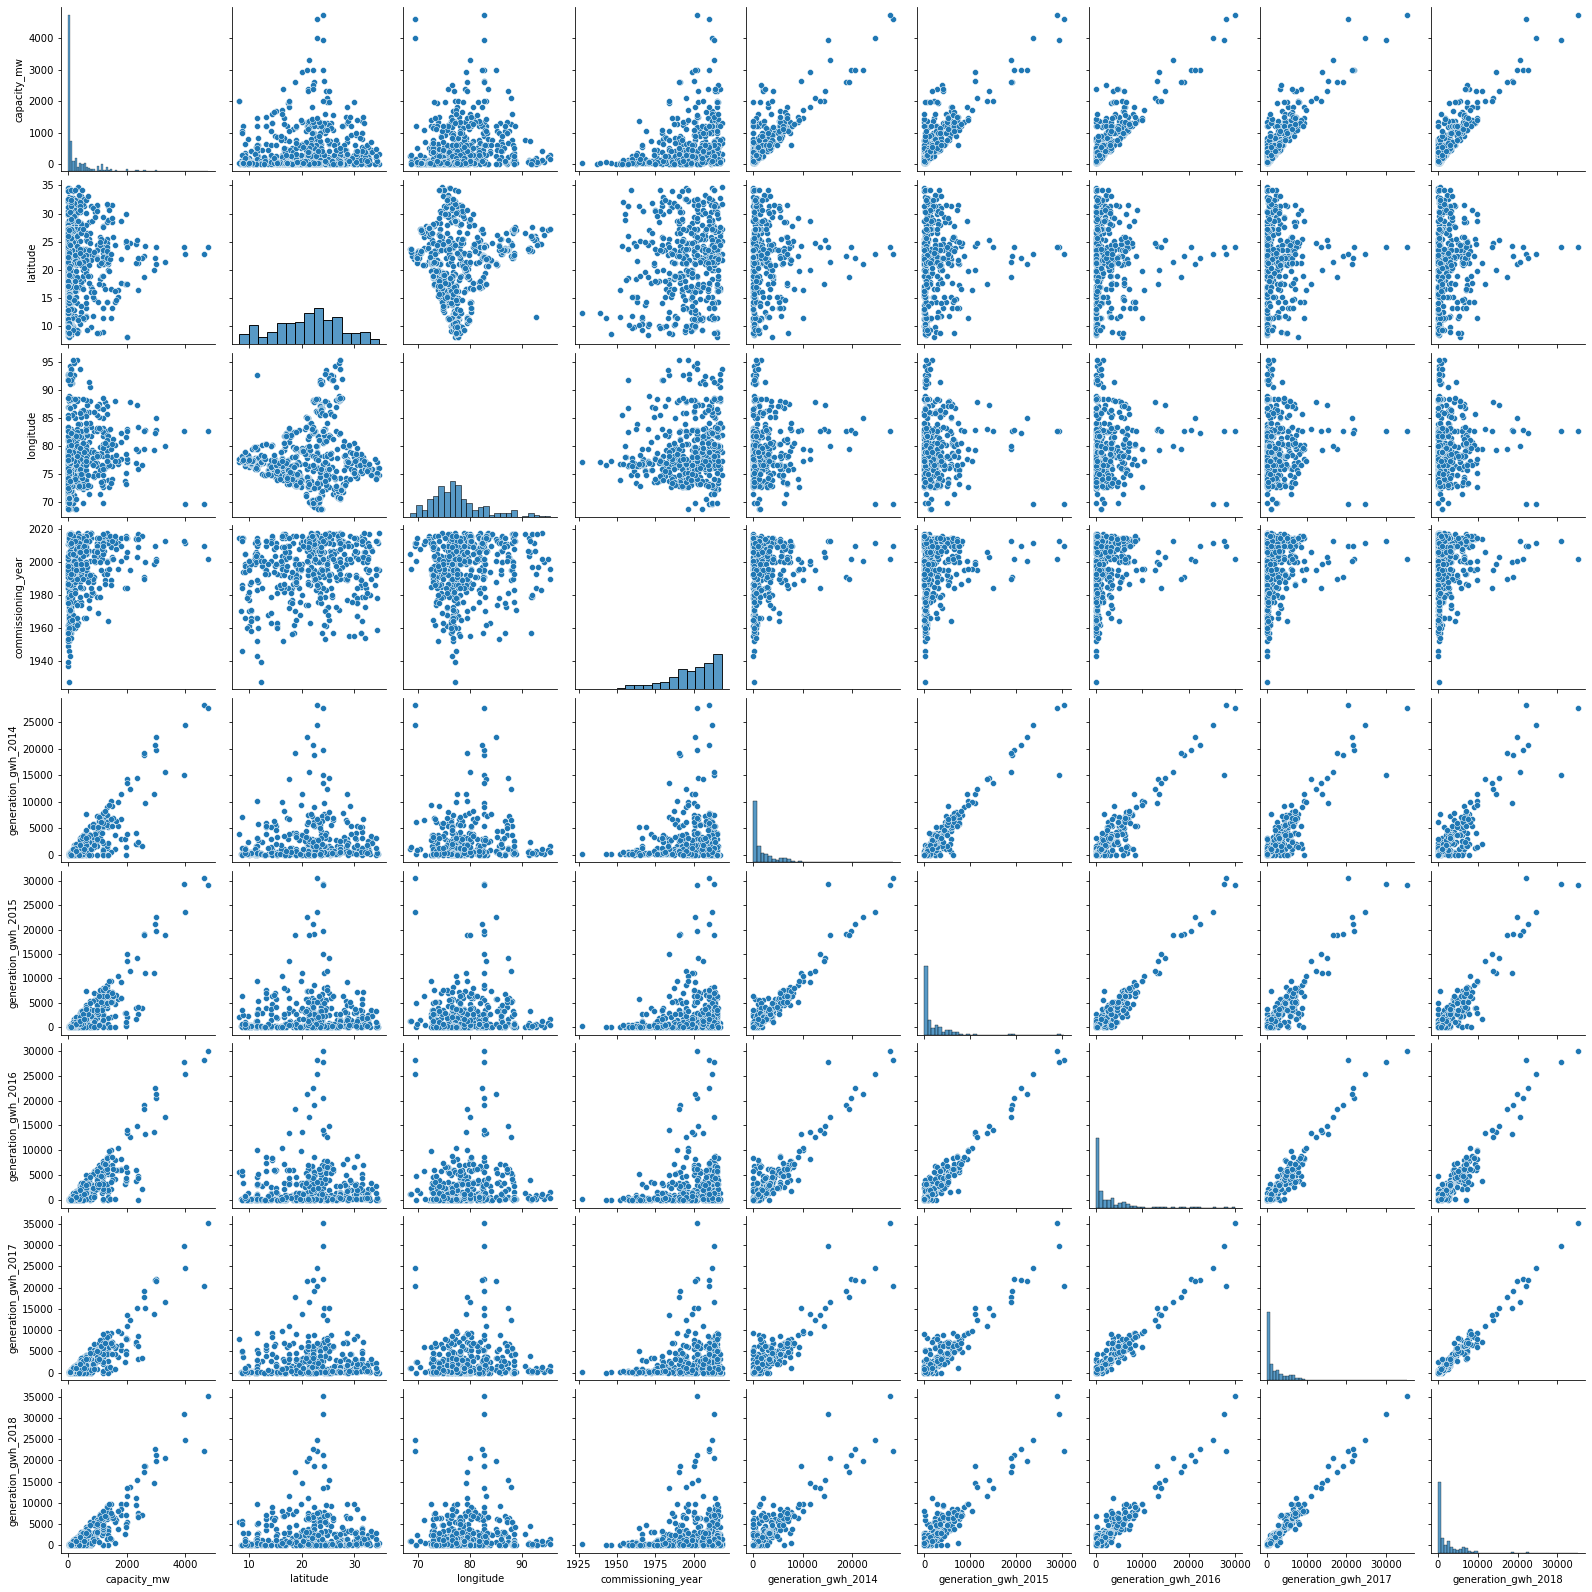

In [62]:
#Always plot numeric columns
sns.pairplot(df)
plt.show()

There is strong high correlation exist b/w Capacity_mw and generation_gwh_2014,2015,16,17,18

#### SimpleImputer

###### To replace nan values of categorical and numeric columns w.r.t. mode and mean/median

In [174]:
import sklearn
from sklearn.impute import SimpleImputer

In [175]:
#replacing nan of numerical columns with mean
l=['capacity_mw','latitude','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
for j in l:
    df[j]=SimpleImputer(missing_values=np.nan,strategy='mean').fit_transform(df[j].values.reshape(-1,1))

In [176]:
#replacing nan of categorical columns with mode
m=['gppd_idnr','primary_fuel','other_fuel1','owner','source','geolocation_source']
for k in m:
    df[k]=SimpleImputer(missing_values=np.nan,strategy='most_frequent').fit_transform(df[k].values.reshape(-1,1))

In [177]:
df.isnull().sum().sum()

0

We've successfully replaced all the nan values present in the dataset.

#### Encoding

##### Now I'll convert all the categorical columns into numeric one by applying label encoder technique
##### Label Encoder

In [178]:
from sklearn.preprocessing import LabelEncoder

In [179]:
n=['gppd_idnr','primary_fuel','other_fuel1','owner','source','geolocation_source']
for p in n:
    df[p]=LabelEncoder().fit_transform(df[p].astype(str))

In [67]:
df.head(9)

gppd_idnr  capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0        657          2.5   28.1839    73.2407             6            2   
1        519         98.0   24.7663    74.6090             1            2   
2        853         39.2   21.9038    69.3732             7            2   
3          0        135.0   23.8712    91.3602             2            2   
4          1       1800.0   21.9603    82.4091             1            2   
5          2        250.0   23.7689    68.6447             1            2   
6          3         60.0   10.4547    77.0078             3            2   
7          4        192.0   32.2258    77.2070             3            2   
8          5        290.0   16.3300    75.8863             3            2   

   commissioning_year  owner  source  geolocation_source  generation_gwh_2014  \
0         2011.000000    229     109                   1          2431.823590   
1         1997.091082    258     174                   2          2431.823590   
2         1997.091082      2      21                   2          2431.823590   
3         2004.000000      5      22                   2           617.789264   
4         2015.000000      5      22                   2          3035.550000   
5         2005.000000      5      22                   2          1153.421000   
6         1970.000000      5      22                   2           157.558250   
7         2010.000000      5      22                   2           674.391100   
8         2004.000000      5      22                   2           480.594950   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0          2428.226946          2467.936859          2547.759305   
1          2428.226946          2467.936859          2547.759305   
2          2428.226946          2467.936859          2547.759305   
3           843.747000           886.004428           663.774500   
4          5916.370000          6243.000000          5385.579736   
5          1208.852000          1175.765000          1147.913000   
6           152.195200            61.421350            89.629600   
7           721.335200           675.724400           679.594950   
8           144.434200           402.029750           439.372100   

   generation_gwh_2018  
0          2600.804099  
1          2600.804099  
2          2600.804099  
3           626.239128  
4          7279.000000  
5           976.655000  
6            48.327150  
7           579.318850  
8           406.377900

#### 8.ViolinPlot

The Violinplot for attribute "gppd_idnr" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


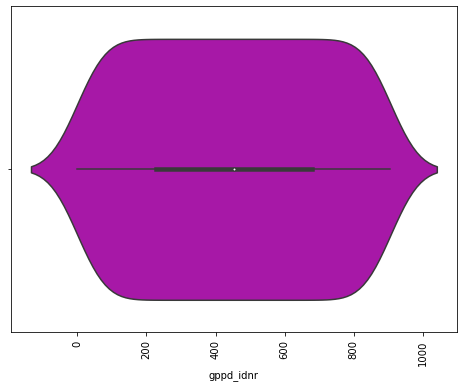



The Violinplot for attribute "capacity_mw" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


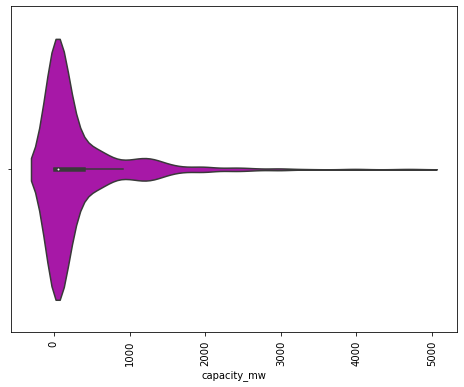



The Violinplot for attribute "latitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


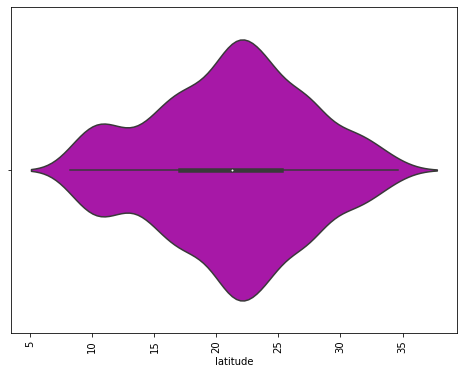



The Violinplot for attribute "longitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


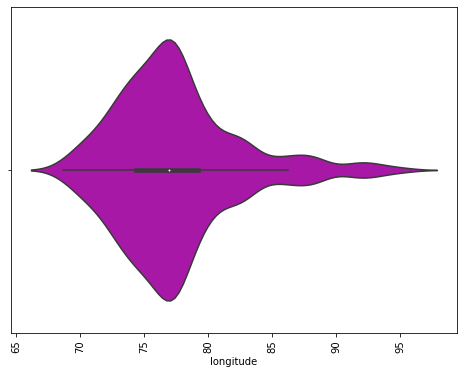



The Violinplot for attribute "primary_fuel" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


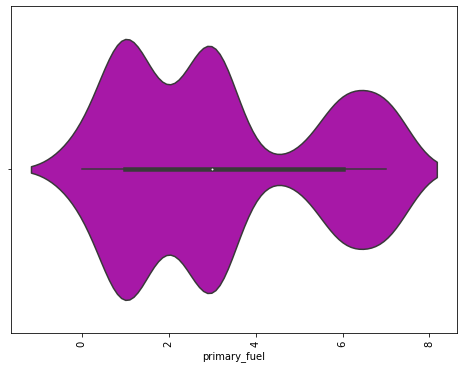



The Violinplot for attribute "other_fuel1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


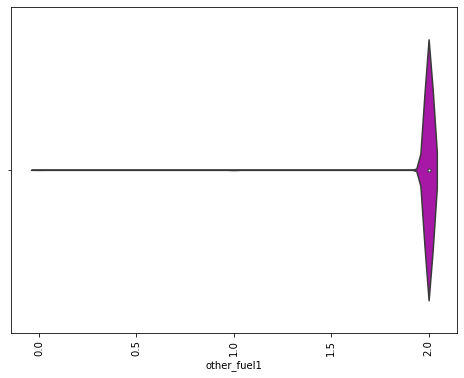



The Violinplot for attribute "commissioning_year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


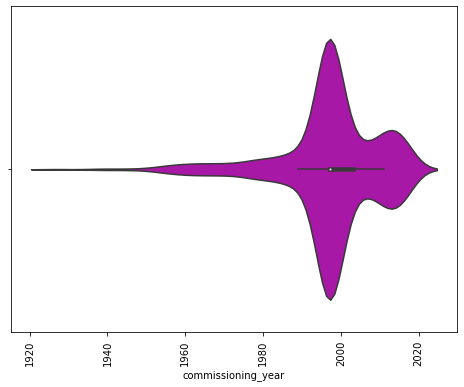



The Violinplot for attribute "owner" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


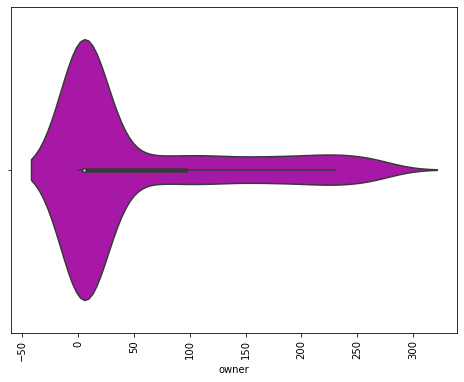



The Violinplot for attribute "source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


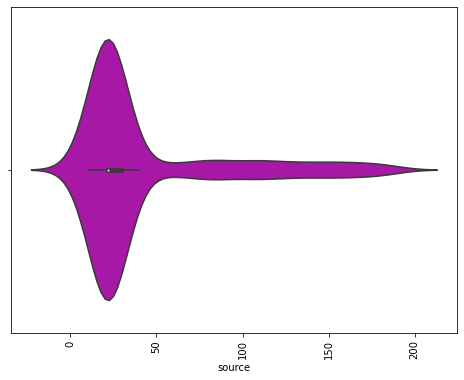



The Violinplot for attribute "geolocation_source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


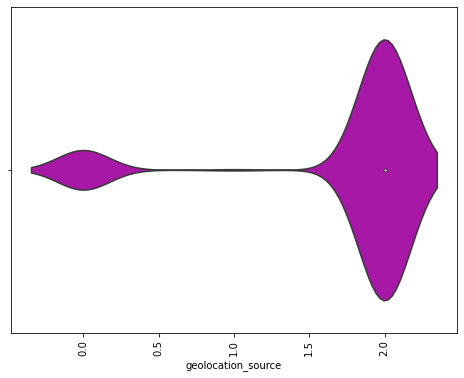



The Violinplot for attribute "generation_gwh_2014" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


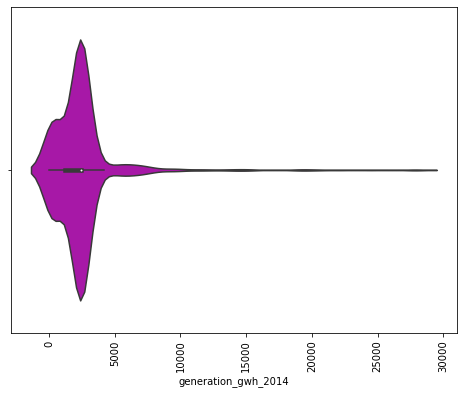



The Violinplot for attribute "generation_gwh_2015" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


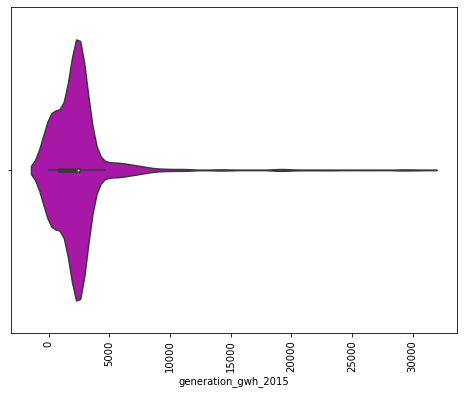



The Violinplot for attribute "generation_gwh_2016" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


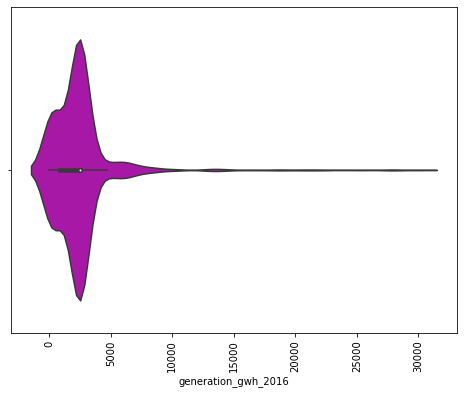



The Violinplot for attribute "generation_gwh_2017" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


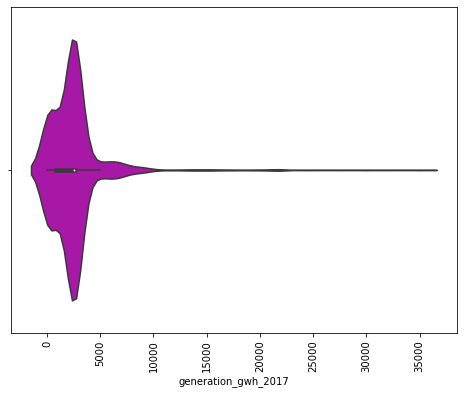



The Violinplot for attribute "generation_gwh_2018" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


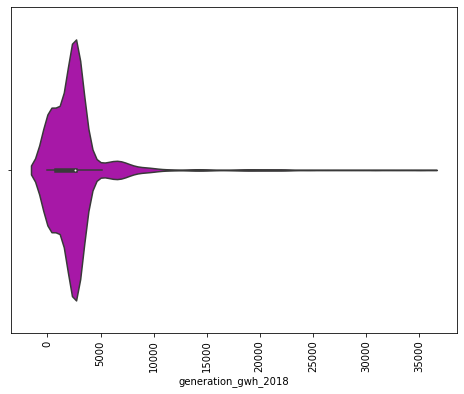

In [74]:
for i in df.columns:
    plt.figure(figsize=(8,6))
    print(f'The Violinplot for attribute "{i}" is-\n {sns.violinplot(df[i],color="m")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

##### Violin plot basically indicates that what is the width of datapoints having most frequency.

As we can see in this plot we can say that most of the power plants are producing capacity approx to 0 mw.

Most of the power plants are having longitude and latitude range (75-80) and 20-25 respectively.

In Year 1990 the electricity production was higher as compare to other years.

#### Descriptive Statistics

In [75]:
df.describe().T

count         mean          std        min          25%  \
gppd_idnr            907.0   453.000000   261.972645     0.0000   226.500000   
capacity_mw          907.0   326.223755   590.085456     0.0000    16.725000   
latitude             907.0    21.197918     6.079148     8.1689    17.072000   
longitude            907.0    77.464907     4.812291    68.6447    74.388900   
primary_fuel         907.0     3.206174     2.280652     0.0000     1.000000   
other_fuel1          907.0     1.995590     0.081259     0.0000     2.000000   
commissioning_year   907.0  1997.091082    13.016360  1927.0000  1997.091082   
owner                907.0    56.169791    82.529116     0.0000     5.000000   
source               907.0    43.847850    44.642818     0.0000    22.000000   
geolocation_source   907.0     1.733186     0.677151     0.0000     2.000000   
generation_gwh_2014  907.0  2431.823590  2665.338608     0.0000  1211.362750   
generation_gwh_2015  907.0  2428.226946  2859.349132     0.0000   916.000000   
generation_gwh_2016  907.0  2467.936859  2877.890004     0.0000   896.500214   
generation_gwh_2017  907.0  2547.759305  2921.502193     0.0000   882.594850   
generation_gwh_2018  907.0  2600.804099  3030.808041     0.0000   824.842340   

                             50%          75%        max  
gppd_idnr             453.000000   679.500000    906.000  
capacity_mw            59.200000   385.250000   4760.000  
latitude               21.281800    25.176450     34.649  
longitude              76.979200    79.206100     95.408  
primary_fuel            3.000000     6.000000      7.000  
other_fuel1             2.000000     2.000000      2.000  
commissioning_year   1997.091082  2003.000000   2018.000  
owner                   5.000000    95.500000    279.000  
source                 22.000000    29.500000    190.000  
geolocation_source      2.000000     2.000000      2.000  
generation_gwh_2014  2431.823590  2431.823590  28127.000  
generation_gwh_2015  2428.226946  2428.226946  30539.000  
generation_gwh_2016  2467.936859  2467.936859  30015.000  
generation_gwh_2017  2547.759305  2547.759305  35116.000  
generation_gwh_2018  2600.804099  2600.804099  35136.000

As we can see in the above chart all the attributes has less median than their respective mean,which indicated that data might skewed right hand side and also the interquartile difference for generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019 are varying too much hence there might be possibility that outliers are present in the data set. 
##### Note.I'm not going to apply statistical properties over any of the categorical columns.

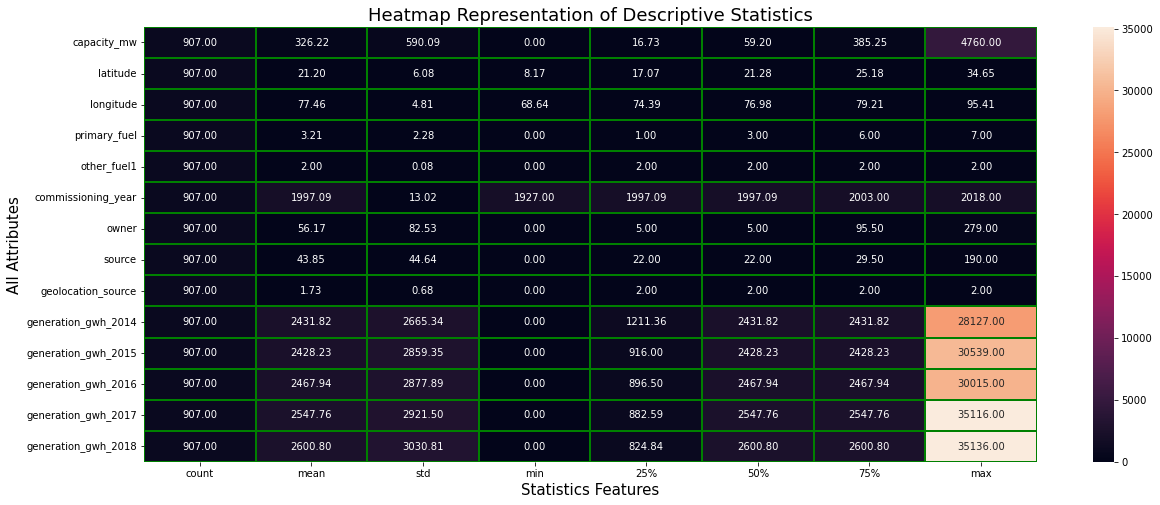

In [79]:
plt.figure(figsize=(20,8))
sns.heatmap(df.describe().T[1:],annot=True,linewidth=0.2,linecolor='GREEN',fmt='0.2f')
plt.xlabel('Statistics Features',fontsize=15)
plt.ylabel('All Attributes',fontsize=15)
plt.title('Heatmap Representation of Descriptive Statistics',fontsize=18)
plt.show()

#### Correlation

In [80]:
df.corr().capacity_mw.sort_values()

primary_fuel          -0.380395
gppd_idnr             -0.335742
owner                 -0.311048
source                -0.242122
other_fuel1            0.003105
latitude               0.050984
longitude              0.195882
geolocation_source     0.204865
commissioning_year     0.274292
generation_gwh_2014    0.694350
generation_gwh_2015    0.711190
generation_gwh_2016    0.742221
generation_gwh_2017    0.757585
generation_gwh_2018    0.773456
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

See, there are 4 attributes having negative values and its showing us that there is negative correlation b/w capacity_mw (which is our target variable) and other respective Negative attributes.Hence will remove all the negative correlated columns later in data cleaning phase.Negative correlation means if input is +ve then output is -ve and vice-versa whereas, Positive correlation means if input is +ve then output would also be +ve and vice-versa. Also we'll not remove any categorical columns in this process

##### The attributes those are giving negative correlation are---primary_fuel,gppd_idnr,owner,source which all are either target variable or categorical one hence will not remove any of these negative correlated columns.

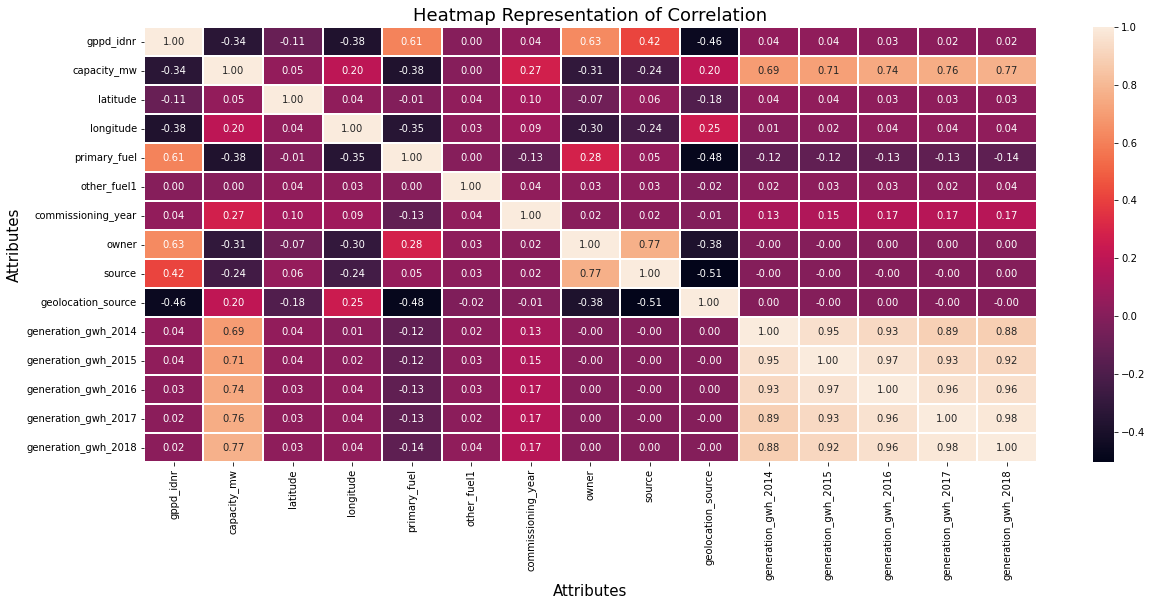

In [81]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,linewidth=0.2,linecolor='white',fmt='0.2f')
plt.xlabel('Attributes',fontsize=15)
plt.ylabel('Attributes',fontsize=15)
plt.title('Heatmap Representation of Correlation',fontsize=18)
plt.show()

#### Multicollinearity

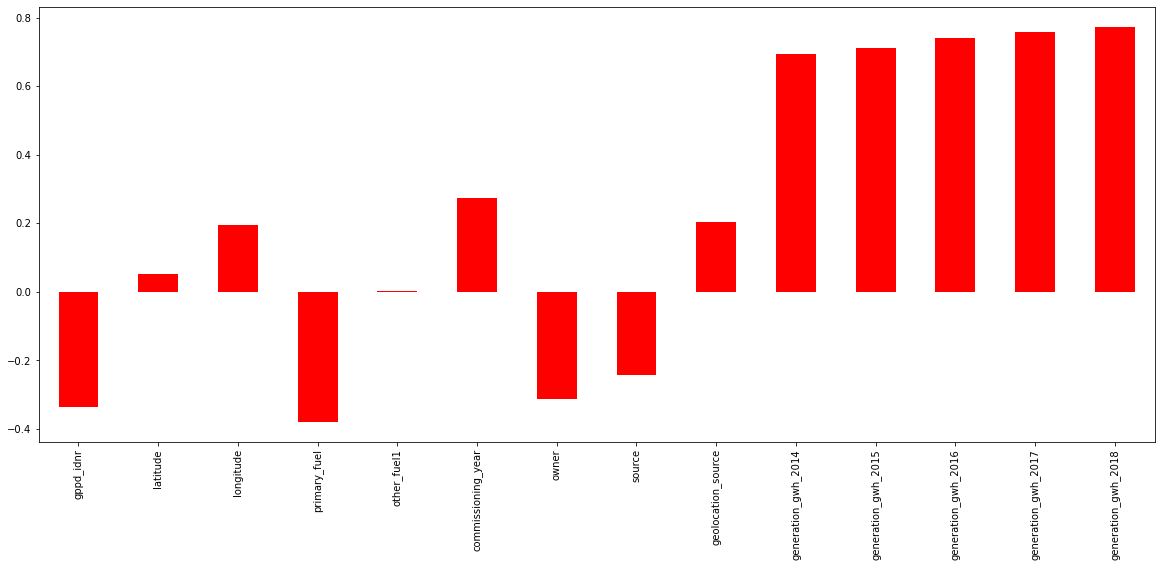

In [82]:
plt.figure(figsize=(20,8))
df.corr().capacity_mw.drop(['capacity_mw']).plot(kind='bar',color='red')
plt.show()

##### i'll check the multicollinearity later in the Data Cleansing portion when i'll be calculating the Variance inflation factor.

#### Skewness

In [68]:
df.skew().sort_values()

other_fuel1           -20.453120
geolocation_source     -2.159841
commissioning_year     -1.399359
latitude               -0.149698
gppd_idnr               0.000000
primary_fuel            0.472251
longitude               1.141881
owner                   1.364406
source                  1.827373
capacity_mw             3.123576
generation_gwh_2018     4.937907
generation_gwh_2014     5.035446
generation_gwh_2016     5.068427
generation_gwh_2017     5.110952
generation_gwh_2015     5.364134
dtype: float64

##### The threshold value of Skewness is +/=0.5. Attributes- latitude,gppd_idnr,primary_fuel are only in the range while others are either skewed right or left.  will remove skewness from thses columns later on in data cleansing part,also will not touch target column and categorical columns for removing the skewness.

Categorical and Target Column = source,owner,primary_fuel,gppd_idnr,geolocation_source,other_fuel1

#### Distribution Plot
##### Here we can now check the normal distribution pattern for each of the attributes which are skewed left or right hand side

The Distribution Plot for attribute gppd_idnr is-
 AxesSubplot(0.125,0.125;0.775x0.755)




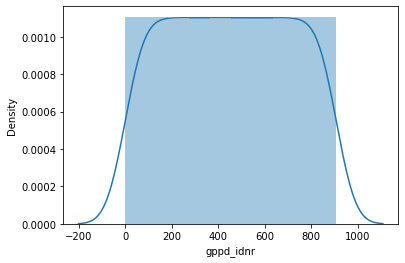

The Distribution Plot for attribute capacity_mw is-
 AxesSubplot(0.125,0.125;0.775x0.755)




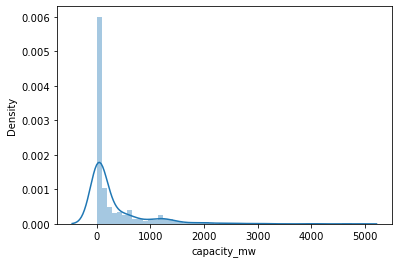

The Distribution Plot for attribute latitude is-
 AxesSubplot(0.125,0.125;0.775x0.755)




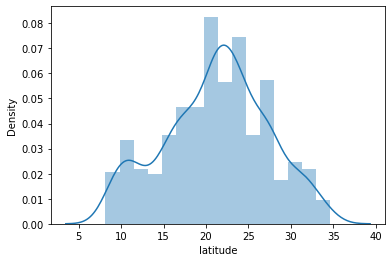

The Distribution Plot for attribute longitude is-
 AxesSubplot(0.125,0.125;0.775x0.755)




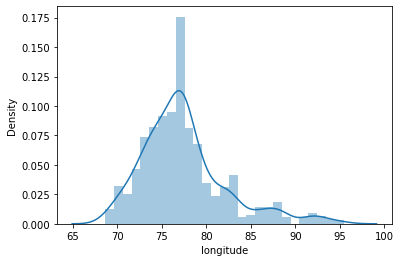

The Distribution Plot for attribute primary_fuel is-
 AxesSubplot(0.125,0.125;0.775x0.755)




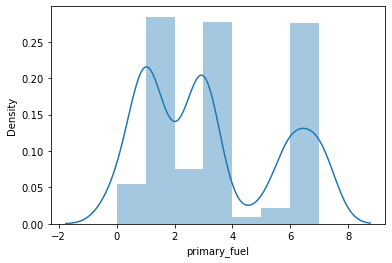

The Distribution Plot for attribute other_fuel1 is-
 AxesSubplot(0.125,0.125;0.775x0.755)




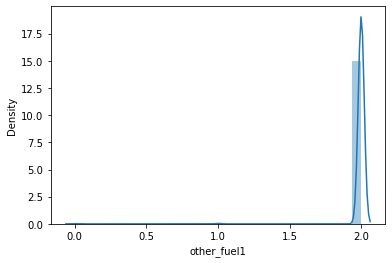

The Distribution Plot for attribute commissioning_year is-
 AxesSubplot(0.125,0.125;0.775x0.755)




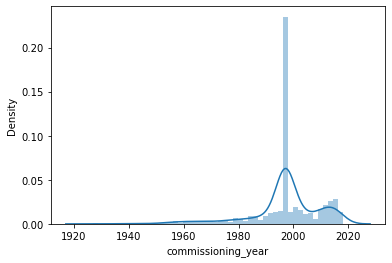

The Distribution Plot for attribute owner is-
 AxesSubplot(0.125,0.125;0.775x0.755)




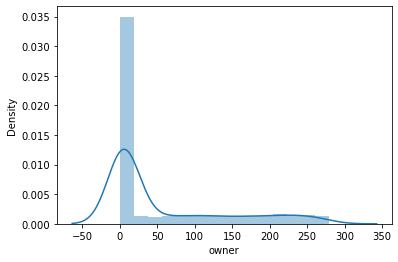

The Distribution Plot for attribute source is-
 AxesSubplot(0.125,0.125;0.775x0.755)




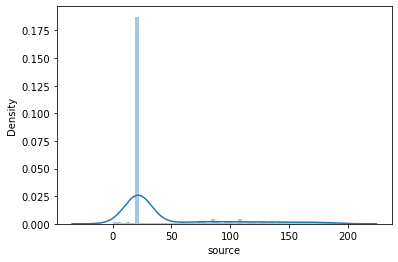

The Distribution Plot for attribute geolocation_source is-
 AxesSubplot(0.125,0.125;0.775x0.755)




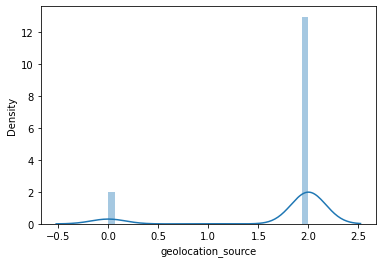

The Distribution Plot for attribute generation_gwh_2014 is-
 AxesSubplot(0.125,0.125;0.775x0.755)




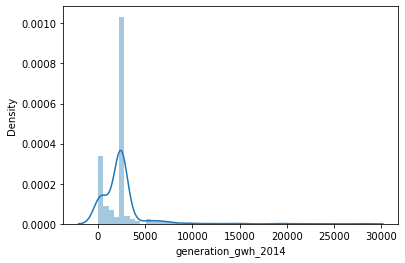

The Distribution Plot for attribute generation_gwh_2015 is-
 AxesSubplot(0.125,0.125;0.775x0.755)




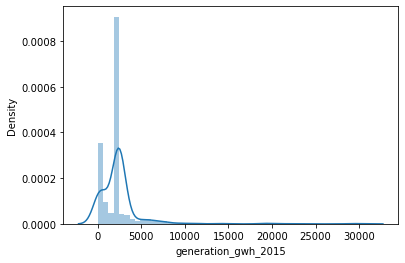

The Distribution Plot for attribute generation_gwh_2016 is-
 AxesSubplot(0.125,0.125;0.775x0.755)




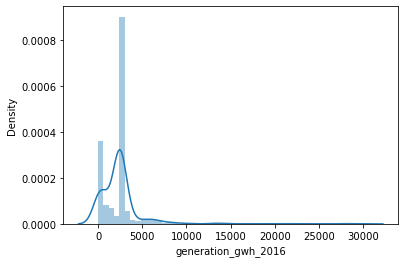

The Distribution Plot for attribute generation_gwh_2017 is-
 AxesSubplot(0.125,0.125;0.775x0.755)




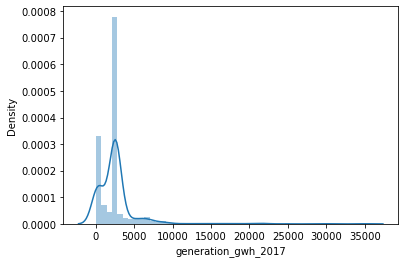

The Distribution Plot for attribute generation_gwh_2018 is-
 AxesSubplot(0.125,0.125;0.775x0.755)




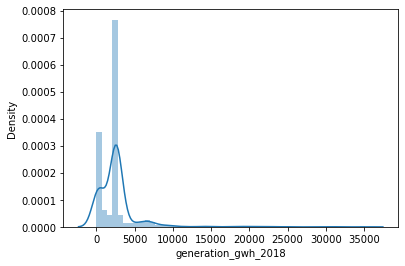

In [84]:
for i in df.columns:
    print(f'The Distribution Plot for attribute {i} is-\n {sns.distplot(df[i])}')
    print('\n')
    plt.show()

As we can see in the above distribution plots all of the attributes are skewed both right ad left hand side.Ergo,i'll remove the skewness later on the data cleansing section by power transfrorm or boxcox method

#### Outliers


In [69]:
z=np.abs(zscore(df))
np.where(z>3)

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
        147, 158, 179, 183, 191, 209, 209, 209, 209, 209, 209, 222, 244,
        299, 308, 308, 308, 308, 308, 308, 321, 323, 333, 340, 342, 345,
        360, 363, 364, 364, 364, 364, 364, 364, 371, 375, 416, 427, 444,
        454, 478, 482, 484, 493, 493, 493, 493, 493, 493, 494, 494, 494,
        494, 494, 494, 499, 519, 538, 541, 546, 573, 577, 583, 592, 601,
        621, 638, 648, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657,
        657, 661, 669, 689, 695, 695, 695, 695, 695, 695, 706, 709, 721,
        721, 721, 721, 724, 724, 724, 724, 724, 726, 726, 726, 726, 726,
        726, 728, 767, 786, 786, 786, 786, 786, 786, 788, 807, 808, 808,
        808, 808, 808, 808, 811, 813, 817, 818, 832, 847, 848, 870, 871,
        879, 880, 880, 880, 880, 880, 880, 895, 900], dtype=int64),
 array([ 1, 11, 12, 13, 14,  8,  8,  1, 10, 11, 12, 13, 14,  1, 10,  3,  3,
         8,  1, 10, 11, 12, 13, 14,  6,  3,  8,  1, 1

we can see that there are lots of rows and columns are present having outliers

In [44]:
z.iloc[15,1]

3.906294028602196

In [45]:
z.iloc[895,8]

3.0963182120153383

#### Boxplots To check the Outliers

The Box Plot for attribute gppd_idnr is-
 AxesSubplot(0.125,0.125;0.775x0.755)




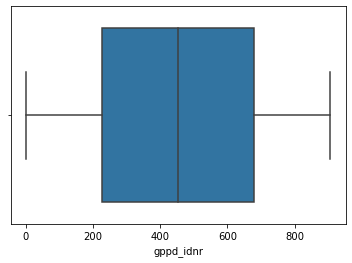

The Box Plot for attribute capacity_mw is-
 AxesSubplot(0.125,0.125;0.775x0.755)




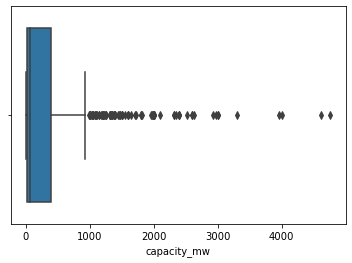

The Box Plot for attribute latitude is-
 AxesSubplot(0.125,0.125;0.775x0.755)




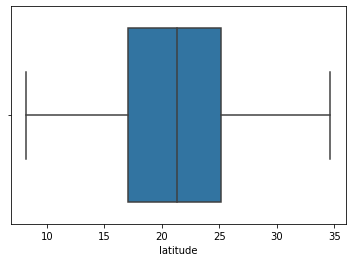

The Box Plot for attribute longitude is-
 AxesSubplot(0.125,0.125;0.775x0.755)




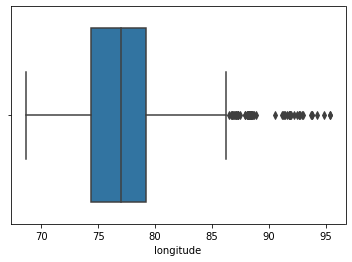

The Box Plot for attribute primary_fuel is-
 AxesSubplot(0.125,0.125;0.775x0.755)




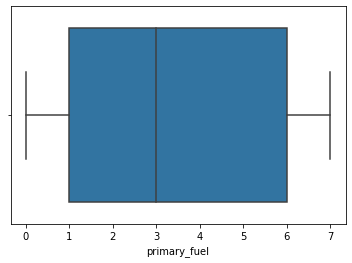

The Box Plot for attribute other_fuel1 is-
 AxesSubplot(0.125,0.125;0.775x0.755)




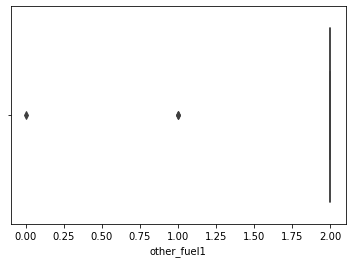

The Box Plot for attribute commissioning_year is-
 AxesSubplot(0.125,0.125;0.775x0.755)




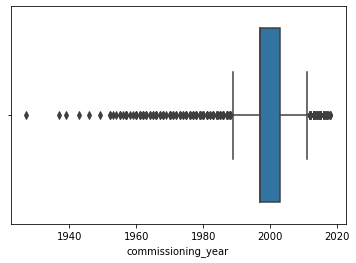

The Box Plot for attribute owner is-
 AxesSubplot(0.125,0.125;0.775x0.755)




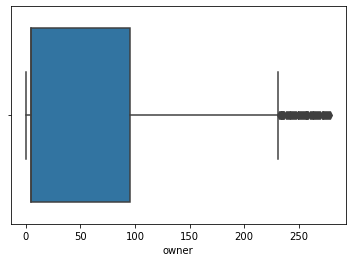

The Box Plot for attribute source is-
 AxesSubplot(0.125,0.125;0.775x0.755)




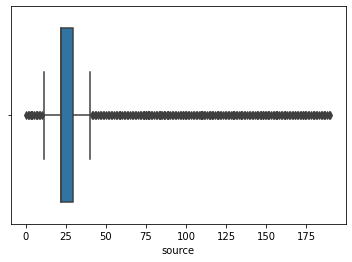

The Box Plot for attribute geolocation_source is-
 AxesSubplot(0.125,0.125;0.775x0.755)




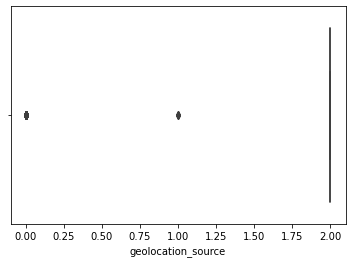

The Box Plot for attribute generation_gwh_2014 is-
 AxesSubplot(0.125,0.125;0.775x0.755)




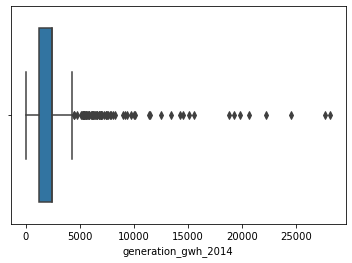

The Box Plot for attribute generation_gwh_2015 is-
 AxesSubplot(0.125,0.125;0.775x0.755)




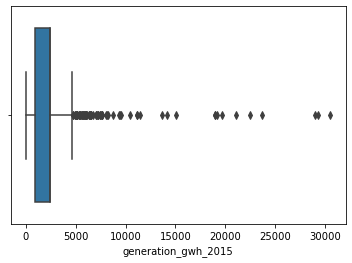

The Box Plot for attribute generation_gwh_2016 is-
 AxesSubplot(0.125,0.125;0.775x0.755)




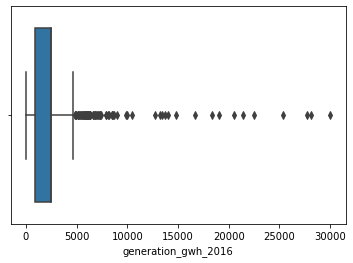

The Box Plot for attribute generation_gwh_2017 is-
 AxesSubplot(0.125,0.125;0.775x0.755)




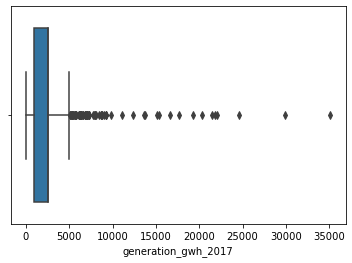

The Box Plot for attribute generation_gwh_2018 is-
 AxesSubplot(0.125,0.125;0.775x0.755)




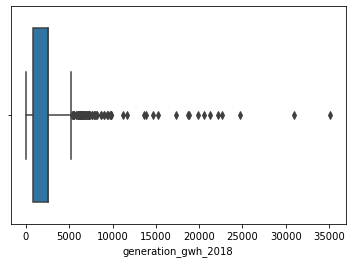

In [90]:
for i in df.columns:
    print(f'The Box Plot for attribute {i} is-\n {sns.boxplot(df[i])}')
    print('\n')
    plt.show()

As we can see in the above boxplot images there might be possibility of outliers presence in attributes-longitude, other_fuel,commisioning year,owner,source,generation_gwh_2014,15,16,17,18 and I'll remove the same in next part of data cleansing

#### Data Cleansing
##### 1. Remove Negative Correlation

Since only categorical columns are having negative correlation hence will not remove those for the same.

#### 2.Removing Multicollinearity

In [70]:
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
x=df.drop(['capacity_mw'],axis=1)
x

gppd_idnr  latitude  longitude  primary_fuel  other_fuel1  \
0          657   28.1839    73.2407             6            2   
1          519   24.7663    74.6090             1            2   
2          853   21.9038    69.3732             7            2   
3            0   23.8712    91.3602             2            2   
4            1   21.9603    82.4091             1            2   
..         ...       ...        ...           ...          ...   
902        491   16.2949    77.3568             1            2   
903        822   12.8932    78.1654             6            2   
904        891   15.2758    75.5811             7            2   
905        539   24.3500    73.7477             1            2   
906        876    9.9344    77.4768             7            2   

     commissioning_year  owner  source  geolocation_source  \
0           2011.000000    229     109                   1   
1           1997.091082    258     174                   2   
2           1997.091082      2      21                   2   
3           2004.000000      5      22                   2   
4           2015.000000      5      22                   2   
..                  ...    ...     ...                 ...   
902         2016.000000      5      22                   2   
903         1997.091082    114      77                   0   
904         1997.091082      5      21                   2   
905         1997.091082     91      59                   2   
906         1997.091082    279      21                   2   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0            2431.823590          2428.226946          2467.936859   
1            2431.823590          2428.226946          2467.936859   
2            2431.823590          2428.226946          2467.936859   
3             617.789264           843.747000           886.004428   
4            3035.550000          5916.370000          6243.000000   
..                   ...                  ...                  ...   
902          2431.823590             0.994875           233.596650   
903          2431.823590          2428.226946          2467.936859   
904          2431.823590          2428.226946          2467.936859   
905          2431.823590          2428.226946          2467.936859   
906          2431.823590          2428.226946          2467.936859   

     generation_gwh_2017  generation_gwh_2018  
0            2547.759305          2600.804099  
1            2547.759305          2600.804099  
2            2547.759305          2600.804099  
3             663.774500           626.239128  
4            5385.579736          7279.000000  
..                   ...                  ...  
902           865.400000           686.500000  
903          2547.759305          2600.804099  
904          2547.759305          2600.804099  
905          2547.759305          2600.804099  
906          2547.759305          2600.804099  

[907 rows x 14 columns]

In [72]:
#calculating variance_inflation_factor Score
def vif():
    df1=pd.DataFrame()
    df1['Features']=x.columns
    df1['Variance_Inflation_Factor']=[variance_inflation_factor(x.values,v) for v in range(x.shape[1])]
    print(df1)

In [73]:
vif()

               Features  Variance_Inflation_Factor
0             gppd_idnr                  10.723425
1              latitude                  14.568644
2             longitude                 323.168578
3          primary_fuel                   7.100004
4           other_fuel1                 604.095744
5    commissioning_year                 973.108996
6                 owner                   5.513191
7                source                   7.443360
8    geolocation_source                  15.964370
9   generation_gwh_2014                  20.428131
10  generation_gwh_2015                  45.082788
11  generation_gwh_2016                  57.901837
12  generation_gwh_2017                  65.410822
13  generation_gwh_2018                  53.019706


See,from the above we can see that there are two variables those are sharing the equal amount of information to the target variable (generation_gwh_2018 & generation_gwh_2017) and i'm removing 'generation_gwh_2017' as it has less correlation score as comapre to other one.Also there are some columns those are sharing the same information towards target column but those are categorical hence will not drop those.

In [74]:
df2=df.drop(['generation_gwh_2017'],axis=1)
df2

gppd_idnr  capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0          657          2.5   28.1839    73.2407             6            2   
1          519         98.0   24.7663    74.6090             1            2   
2          853         39.2   21.9038    69.3732             7            2   
3            0        135.0   23.8712    91.3602             2            2   
4            1       1800.0   21.9603    82.4091             1            2   
..         ...          ...       ...        ...           ...          ...   
902        491       1600.0   16.2949    77.3568             1            2   
903        822          3.0   12.8932    78.1654             6            2   
904        891         25.5   15.2758    75.5811             7            2   
905        539         80.0   24.3500    73.7477             1            2   
906        876         16.5    9.9344    77.4768             7            2   

     commissioning_year  owner  source  geolocation_source  \
0           2011.000000    229     109                   1   
1           1997.091082    258     174                   2   
2           1997.091082      2      21                   2   
3           2004.000000      5      22                   2   
4           2015.000000      5      22                   2   
..                  ...    ...     ...                 ...   
902         2016.000000      5      22                   2   
903         1997.091082    114      77                   0   
904         1997.091082      5      21                   2   
905         1997.091082     91      59                   2   
906         1997.091082    279      21                   2   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0            2431.823590          2428.226946          2467.936859   
1            2431.823590          2428.226946          2467.936859   
2            2431.823590          2428.226946          2467.936859   
3             617.789264           843.747000           886.004428   
4            3035.550000          5916.370000          6243.000000   
..                   ...                  ...                  ...   
902          2431.823590             0.994875           233.596650   
903          2431.823590          2428.226946          2467.936859   
904          2431.823590          2428.226946          2467.936859   
905          2431.823590          2428.226946          2467.936859   
906          2431.823590          2428.226946          2467.936859   

     generation_gwh_2018  
0            2600.804099  
1            2600.804099  
2            2600.804099  
3             626.239128  
4            7279.000000  
..                   ...  
902           686.500000  
903          2600.804099  
904          2600.804099  
905          2600.804099  
906          2600.804099  

[907 rows x 14 columns]

#### 3.Removing Outliers

In [75]:
df3=df2[(z<3).all(axis=1)]
df3

gppd_idnr  capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0          657          2.5   28.1839    73.2407             6            2   
1          519         98.0   24.7663    74.6090             1            2   
2          853         39.2   21.9038    69.3732             7            2   
3            0        135.0   23.8712    91.3602             2            2   
4            1       1800.0   21.9603    82.4091             1            2   
..         ...          ...       ...        ...           ...          ...   
902        491       1600.0   16.2949    77.3568             1            2   
903        822          3.0   12.8932    78.1654             6            2   
904        891         25.5   15.2758    75.5811             7            2   
905        539         80.0   24.3500    73.7477             1            2   
906        876         16.5    9.9344    77.4768             7            2   

     commissioning_year  owner  source  geolocation_source  \
0           2011.000000    229     109                   1   
1           1997.091082    258     174                   2   
2           1997.091082      2      21                   2   
3           2004.000000      5      22                   2   
4           2015.000000      5      22                   2   
..                  ...    ...     ...                 ...   
902         2016.000000      5      22                   2   
903         1997.091082    114      77                   0   
904         1997.091082      5      21                   2   
905         1997.091082     91      59                   2   
906         1997.091082    279      21                   2   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0            2431.823590          2428.226946          2467.936859   
1            2431.823590          2428.226946          2467.936859   
2            2431.823590          2428.226946          2467.936859   
3             617.789264           843.747000           886.004428   
4            3035.550000          5916.370000          6243.000000   
..                   ...                  ...                  ...   
902          2431.823590             0.994875           233.596650   
903          2431.823590          2428.226946          2467.936859   
904          2431.823590          2428.226946          2467.936859   
905          2431.823590          2428.226946          2467.936859   
906          2431.823590          2428.226946          2467.936859   

     generation_gwh_2018  
0            2600.804099  
1            2600.804099  
2            2600.804099  
3             626.239128  
4            7279.000000  
..                   ...  
902           686.500000  
903          2600.804099  
904          2600.804099  
905          2600.804099  
906          2600.804099  

[831 rows x 14 columns]

In [103]:
print(df2.shape)
print(df3.shape)

(907, 14)
(831, 14)


In [104]:
percentage_loss=(907-831)*100/907
percentage_loss

8.379272326350607

I'm getting the percentage loss is about 8% which is decent because our dataset is large having 907 rows and out of it we are loosing only 8% rows.Now we can move ahead by considering it

#### 4.Removing Skewness
##### a): Using power_transform method

In [76]:
from sklearn.preprocessing import power_transform

In [77]:
x=df3.drop(['capacity_mw'],axis=1)
x

gppd_idnr  latitude  longitude  primary_fuel  other_fuel1  \
0          657   28.1839    73.2407             6            2   
1          519   24.7663    74.6090             1            2   
2          853   21.9038    69.3732             7            2   
3            0   23.8712    91.3602             2            2   
4            1   21.9603    82.4091             1            2   
..         ...       ...        ...           ...          ...   
902        491   16.2949    77.3568             1            2   
903        822   12.8932    78.1654             6            2   
904        891   15.2758    75.5811             7            2   
905        539   24.3500    73.7477             1            2   
906        876    9.9344    77.4768             7            2   

     commissioning_year  owner  source  geolocation_source  \
0           2011.000000    229     109                   1   
1           1997.091082    258     174                   2   
2           1997.091082      2      21                   2   
3           2004.000000      5      22                   2   
4           2015.000000      5      22                   2   
..                  ...    ...     ...                 ...   
902         2016.000000      5      22                   2   
903         1997.091082    114      77                   0   
904         1997.091082      5      21                   2   
905         1997.091082     91      59                   2   
906         1997.091082    279      21                   2   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0            2431.823590          2428.226946          2467.936859   
1            2431.823590          2428.226946          2467.936859   
2            2431.823590          2428.226946          2467.936859   
3             617.789264           843.747000           886.004428   
4            3035.550000          5916.370000          6243.000000   
..                   ...                  ...                  ...   
902          2431.823590             0.994875           233.596650   
903          2431.823590          2428.226946          2467.936859   
904          2431.823590          2428.226946          2467.936859   
905          2431.823590          2428.226946          2467.936859   
906          2431.823590          2428.226946          2467.936859   

     generation_gwh_2018  
0            2600.804099  
1            2600.804099  
2            2600.804099  
3             626.239128  
4            7279.000000  
..                   ...  
902           686.500000  
903          2600.804099  
904          2600.804099  
905          2600.804099  
906          2600.804099  

[831 rows x 13 columns]

In [78]:
x=power_transform(x)
x

array([[ 0.75488224,  1.15757565, -0.93159852, ...,  0.35781174,
         0.36060402,  0.376212  ],
       [ 0.29899613,  0.59065259, -0.51578406, ...,  0.35781174,
         0.36060402,  0.376212  ],
       [ 1.35958446,  0.11978205, -2.35129261, ...,  0.35781174,
         0.36060402,  0.376212  ],
       ...,
       [ 1.47217222, -0.95395687, -0.24337349, ...,  0.35781174,
         0.36060402,  0.376212  ],
       [ 0.36695645,  0.52193742, -0.77288457, ...,  0.35781174,
         0.36060402,  0.376212  ],
       [ 1.42789016, -1.7976091 ,  0.23885204, ...,  0.35781174,
         0.36060402,  0.376212  ]])

In [79]:
df3.skew().sort_values()

geolocation_source    -2.098153
commissioning_year    -0.836352
latitude              -0.116001
gppd_idnr             -0.052788
other_fuel1            0.000000
primary_fuel           0.414888
longitude              0.907429
generation_gwh_2018    1.316517
owner                  1.316648
generation_gwh_2015    1.391829
generation_gwh_2016    1.413544
generation_gwh_2014    1.524498
source                 1.778820
capacity_mw            1.951101
dtype: float64

As, we can see that skewness is still present in the data set and it means that our data is not normally distributed,so will try another method to remove the skewness

#### b): Square_root Method

In [83]:
z=['commissioning_year','longitude','generation_gwh_2018','generation_gwh_2014','generation_gwh_2016','generation_gwh_2015']
for g in z:
    df3[g]=np.sqrt(df3[g])

In [84]:
df3.skew().sort_values()

geolocation_source    -2.098153
generation_gwh_2014   -0.468238
generation_gwh_2015   -0.433498
generation_gwh_2018   -0.397178
commissioning_year    -0.390090
generation_gwh_2016   -0.388923
latitude              -0.116001
gppd_idnr             -0.052788
longitude              0.000000
other_fuel1            0.000000
primary_fuel           0.414888
owner                  1.316648
source                 1.778820
capacity_mw            1.951101
dtype: float64

As,we can see that skewness is fully removed now in numerical columns and our data is almost normally distributed but going forward will need to transform this data in the range b/w 0 & 1 and also we have to attain the mean=0 and standard deviation =+/-1 for this will use Standard Scaler techinque

#### Using Standard Scaler

In [85]:
df3

gppd_idnr  capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0          657          2.5   28.1839   0.490895             6            2   
1          519         98.0   24.7663   0.490895             1            2   
2          853         39.2   21.9038   0.490895             7            2   
3            0        135.0   23.8712   0.490895             2            2   
4            1       1800.0   21.9603   0.490895             1            2   
..         ...          ...       ...        ...           ...          ...   
902        491       1600.0   16.2949   0.490895             1            2   
903        822          3.0   12.8932   0.490895             6            2   
904        891         25.5   15.2758   0.490895             7            2   
905        539         80.0   24.3500   0.490895             1            2   
906        876         16.5    9.9344   0.490895             7            2   

     commissioning_year  owner  source  geolocation_source  \
0          4.077291e+64    229     109                   1   
1          3.553768e+64    258     174                   2   
2          3.553768e+64      2      21                   2   
3          3.805281e+64      5      22                   2   
4          4.240911e+64      5      22                   2   
..                  ...    ...     ...                 ...   
902        4.282779e+64      5      22                   2   
903        3.553768e+64    114      77                   0   
904        3.553768e+64      5      21                   2   
905        3.553768e+64     91      59                   2   
906        3.553768e+64    279      21                   2   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0              49.313523            49.277043            49.678334   
1              49.313523            49.277043            49.678334   
2              49.313523            49.277043            49.678334   
3              24.855367            29.047323            29.765827   
4              55.095826            76.917943            79.012657   
..                   ...                  ...                  ...   
902            49.313523             0.997434            15.283869   
903            49.313523            49.277043            49.678334   
904            49.313523            49.277043            49.678334   
905            49.313523            49.277043            49.678334   
906            49.313523            49.277043            49.678334   

     generation_gwh_2018  
0              50.998079  
1              50.998079  
2              50.998079  
3              25.024770  
4              85.317056  
..                   ...  
902            26.201145  
903            50.998079  
904            50.998079  
905            50.998079  
906            50.998079  

[831 rows x 14 columns]

In [86]:
x=df3.drop(['capacity_mw'],axis=1)
x

gppd_idnr  latitude  longitude  primary_fuel  other_fuel1  \
0          657   28.1839   0.490895             6            2   
1          519   24.7663   0.490895             1            2   
2          853   21.9038   0.490895             7            2   
3            0   23.8712   0.490895             2            2   
4            1   21.9603   0.490895             1            2   
..         ...       ...        ...           ...          ...   
902        491   16.2949   0.490895             1            2   
903        822   12.8932   0.490895             6            2   
904        891   15.2758   0.490895             7            2   
905        539   24.3500   0.490895             1            2   
906        876    9.9344   0.490895             7            2   

     commissioning_year  owner  source  geolocation_source  \
0          4.077291e+64    229     109                   1   
1          3.553768e+64    258     174                   2   
2          3.553768e+64      2      21                   2   
3          3.805281e+64      5      22                   2   
4          4.240911e+64      5      22                   2   
..                  ...    ...     ...                 ...   
902        4.282779e+64      5      22                   2   
903        3.553768e+64    114      77                   0   
904        3.553768e+64      5      21                   2   
905        3.553768e+64     91      59                   2   
906        3.553768e+64    279      21                   2   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0              49.313523            49.277043            49.678334   
1              49.313523            49.277043            49.678334   
2              49.313523            49.277043            49.678334   
3              24.855367            29.047323            29.765827   
4              55.095826            76.917943            79.012657   
..                   ...                  ...                  ...   
902            49.313523             0.997434            15.283869   
903            49.313523            49.277043            49.678334   
904            49.313523            49.277043            49.678334   
905            49.313523            49.277043            49.678334   
906            49.313523            49.277043            49.678334   

     generation_gwh_2018  
0              50.998079  
1              50.998079  
2              50.998079  
3              25.024770  
4              85.317056  
..                   ...  
902            26.201145  
903            50.998079  
904            50.998079  
905            50.998079  
906            50.998079  

[831 rows x 13 columns]

In [87]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [88]:
x=sc.fit_transform(x)
x

array([[ 0.74018501,  1.15213456, -0.93154248, ...,  0.36884618,
         0.36804173,  0.37979853],
       [ 0.22114078,  0.59548469, -0.51573147, ...,  0.36884618,
         0.36804173,  0.37979853],
       [ 1.47737828,  0.12924807, -2.35149132, ...,  0.36884618,
         0.36804173,  0.37979853],
       ...,
       [ 1.6203035 , -0.95030346, -0.24333633, ...,  0.36884618,
         0.36804173,  0.37979853],
       [ 0.29636458,  0.52767882, -0.77282651, ...,  0.36884618,
         0.36804173,  0.37979853],
       [ 1.56388565, -1.82029691,  0.23884608, ...,  0.36884618,
         0.36804173,  0.37979853]])

In [89]:
x.mean()

-7.797920954599002e-10

In [90]:
x.std()

0.9607689228305228

<AxesSubplot:ylabel='Density'>

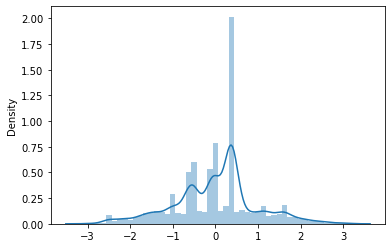

In [91]:
sns.distplot(x)

###### Now,almost our features is normally distributed as we have got the mean almost as zero and standard deviation=1 i.e. data is fully transformed in b/w 0-1

#### Using Principle Component Analysis(PCA)

In [92]:
from sklearn.decomposition import PCA

In [93]:
#converting the 13 columns into 4 columns
pca=PCA(n_components=4)

In [94]:
x_pca=pca.fit_transform(x)
x_pca

array([[-2.5405005 , -1.73216944, -1.71394165, -0.22527708],
       [-2.00503716, -0.98257749, -2.17125094,  2.08221952],
       [-1.380148  , -0.83800282,  1.77076632, -1.66136319],
       ...,
       [-1.00109404, -0.28512937,  2.00325176, -0.33389504],
       [-0.78317313,  0.3487517 , -0.47158542,  0.18102429],
       [-1.86941722, -1.21935277,  1.8050173 ,  1.77066438]])

In [95]:
x=x_pca
x

array([[-2.5405005 , -1.73216944, -1.71394165, -0.22527708],
       [-2.00503716, -0.98257749, -2.17125094,  2.08221952],
       [-1.380148  , -0.83800282,  1.77076632, -1.66136319],
       ...,
       [-1.00109404, -0.28512937,  2.00325176, -0.33389504],
       [-0.78317313,  0.3487517 , -0.47158542,  0.18102429],
       [-1.86941722, -1.21935277,  1.8050173 ,  1.77066438]])

In [96]:
#target variable
y=df3['capacity_mw']
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 831, dtype: float64

In [97]:
x.shape

(831, 4)

In [98]:
y.shape

(831,)

#### Plotting the Relationship b/w Principle Components

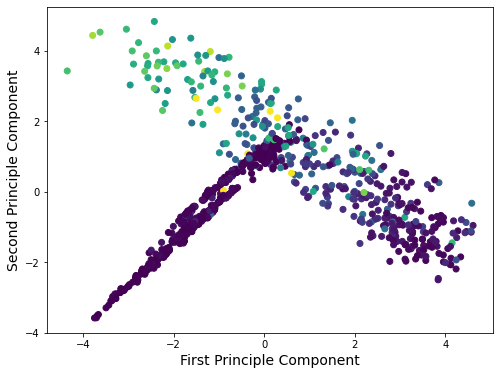

In [99]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0:1],x[:,1:2],c=y)
plt.xlabel('First Principle Component',fontsize=14)
plt.ylabel('Second Principle Component',fontsize=14)
plt.show()

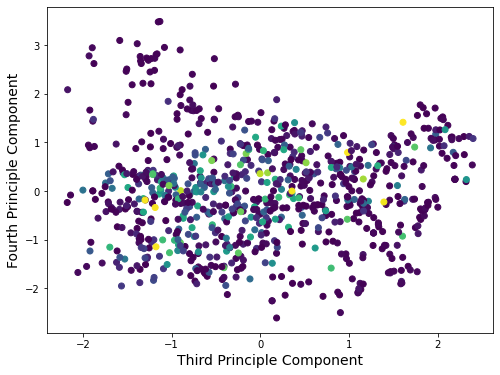

In [100]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,2:3],x[:,3],c=y)
plt.xlabel('Third Principle Component',fontsize=14)
plt.ylabel('Fourth Principle Component',fontsize=14)
plt.show()

Above two diagrams tells us that our feature variables are distributed and mixed well 

#### Training_Testing Phase
##### I am going to train 80% of the data and testing size would be 20%
##### first will try to find out the best value for random_state

In [102]:
#importing machine learning libraries for regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
lr=LinearRegression()

In [113]:
#will finding best value of random_state
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    train_pred=lr.predict(x_train)
    test_pred=lr.predict(x_test)
    if(r2_score(train_pred,y_train))==(r2_score(test_pred,y_test)):
        print(f'At Random_State {i} the training accuracy and testing accuracy both are same')
        print(f'Training Accuracy is {r2_score(train_pred,y_train)}')
        print(f'Testing Accuracy is {r2_score(test_pred,y_test)}')
        print(f'The Mean Absolute Error is(MAE)- {mean_absolute_error(test_pred,y_test)}')
        print(f'The Mean Squared Error is(MSE)- {mean_squared_error(test_pred,y_test)}')
        print(f'The Root Mean Squared Error(RMSE) is- {np.sqrt(mean_squared_error(test_pred,y_test))}')
        print('\n')
    else:
        print(f'At Random_State {i} the training accuracy and testing accuracy both are not same')
        print(f'Training Accuracy is {r2_score(train_pred,y_train)}')
        print(f'Testing Accuracy is {r2_score(test_pred,y_test)}')
        print(f'\nThe Mean Absolute Error is (MAE)- {mean_absolute_error(test_pred,y_test)}')
        print(f'The Mean Squared Error is (MSE)- {mean_squared_error(test_pred,y_test)}')
        print(f'The Root Mean Squared Error is (RMSE)- {np.sqrt(mean_squared_error(test_pred,y_test))}')
        print('\n')

At Random_State 0 the training accuracy and testing accuracy both are not same
Training Accuracy is 0.015047299430829386
Testing Accuracy is -0.5645787633121202

The Mean Absolute Error is (MAE)- 251.7829904097483
The Mean Squared Error is (MSE)- 127354.30827034579
The Root Mean Squared Error is (RMSE)- 356.86735388705114


At Random_State 1 the training accuracy and testing accuracy both are not same
Training Accuracy is -0.2563056489666167
Testing Accuracy is -0.03497670248738083

The Mean Absolute Error is (MAE)- 234.5318384903455
The Mean Squared Error is (MSE)- 94438.53263253659
The Root Mean Squared Error is (RMSE)- 307.30853003542967


At Random_State 2 the training accuracy and testing accuracy both are not same
Training Accuracy is -0.0625674831664087
Testing Accuracy is -0.24742058423849178

The Mean Absolute Error is (MAE)- 224.96963207322958
The Mean Squared Error is (MSE)- 102644.94507421517
The Root Mean Squared Error is (RMSE)- 320.38249807724384


At Random_State 3 the 

#### Drwaing Linear Regression Line

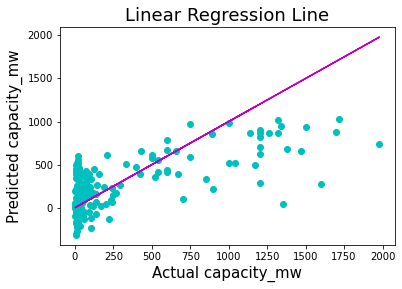

In [114]:
plt.scatter(y_test,test_pred,color='c')
plt.plot(y_test,y_test,color='m')
plt.xlabel("Actual capacity_mw",fontsize=15)
plt.ylabel("Predicted capacity_mw",fontsize=15)
plt.title("Linear Regression Line",fontsize=18)
plt.show()

As we can clearly see that the above line is not containg much points at all as there is distribution happening and it's happening in both left and right side of line ergo this can't be the best fitted line of the model. Hence this model is not working good for predicting the same.

#### Finding Out CV Score

In [109]:
from sklearn.model_selection import cross_val_score

In [115]:
for n in range(2,12):
    cvscore=cross_val_score(lr,x,y,cv=n)
    mean=cvscore.mean()
    std=cvscore.std()
    print(f'At K-Fold {n} The CV Score of Linear Regression Model is {mean*100} and Standard Deviation is {std}')
    print('\n')

At K-Fold 2 The CV Score of Linear Regression Model is 42.95612015496697 and Standard Deviation is 0.03530098426558981


At K-Fold 3 The CV Score of Linear Regression Model is 43.15641850087959 and Standard Deviation is 0.03888580115641254


At K-Fold 4 The CV Score of Linear Regression Model is 43.94403320688212 and Standard Deviation is 0.048854489889184366


At K-Fold 5 The CV Score of Linear Regression Model is 44.963873125530405 and Standard Deviation is 0.03842361006400956


At K-Fold 6 The CV Score of Linear Regression Model is 44.43410044577909 and Standard Deviation is 0.05219396914499389


At K-Fold 7 The CV Score of Linear Regression Model is 42.086621971163225 and Standard Deviation is 0.12891328269354776


At K-Fold 8 The CV Score of Linear Regression Model is 43.55293863733724 and Standard Deviation is 0.10670284518376598


At K-Fold 9 The CV Score of Linear Regression Model is 42.627767399452146 and Standard Deviation is 0.09382739135954545


At K-Fold 10 The CV Score of

We're getting highest CV score as 45% at K-Fold 5 and less testing accuracy with linear regression model hence will go for other model as well to check it's CV score and testing accuracy both

In [118]:
#importing other libraries
from sklearn.linear_model import Lasso,Ridge,ElasticNet,SGDRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
ls=Lasso()
rd=Ridge()
en=ElasticNet()
sgd=SGDRegressor()
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
grd=GradientBoostingRegressor()

In [127]:
#creating a definition to expand the model individually
def model(m,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    m.fit(x_train,y_train)
    train_pred=m.predict(x_train)
    test_pred=m.predict(x_test)
    print(f'Training Accuracy of model {m} is {r2_score(train_pred,y_train)}')
    print(f'Testing Accuracy of model {m} is {r2_score(test_pred,y_test)}')
    print('\nError in the model is calculated below-\n')
    print(f'The Mean Absolute Error is (MAE)- {mean_absolute_error(test_pred,y_test)}')
    print(f'The Mean Squared Error is (MSE)- {mean_squared_error(test_pred,y_test)}')
    print(f'The Root Mean Squared Error is (RMSE)- {np.sqrt(mean_squared_error(test_pred,y_test))}')
    print('\n')
    print('Finding out the best K-Fold Value')
    print('\n\t')
    for j in range(2,12):
        cvs=cross_val_score(m,x,y,cv=j)
        cvs.mean()
        cvs.std()
        print(f'At K-Fold {j} the CV Score of model {m} is {cvs.mean()*100} & std is {cvs.std()}')
        print('\n')
    print('\n\t')
    plt.scatter(y_test,test_pred,color='c')
    plt.plot(y_test,y_test,color='m')
    plt.xlabel("Actual capacity_mw",fontsize=15)
    plt.ylabel("Predicted capacity_mw",fontsize=15)
    plt.title("Linear Regression Line",fontsize=18)
    plt.show()

Training Accuracy of model Lasso() is -0.14026960908829733
Testing Accuracy of model Lasso() is -0.2867562831828676

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 228.96484413566012
The Mean Squared Error is (MSE)- 100990.01882327847
The Root Mean Squared Error is (RMSE)- 317.789267948555


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Lasso() is 42.995373178665034 & std is 0.034536836603792975


At K-Fold 3 the CV Score of model Lasso() is 43.19953268287748 & std is 0.03841877429852855


At K-Fold 4 the CV Score of model Lasso() is 43.975189182501694 & std is 0.04822204280433701


At K-Fold 5 the CV Score of model Lasso() is 44.99212607633888 & std is 0.038163937097069174


At K-Fold 6 the CV Score of model Lasso() is 44.46173046612656 & std is 0.052136926128117184


At K-Fold 7 the CV Score of model Lasso() is 42.107092988699755 & std is 0.12872716939705245


At K-Fold 8 the CV Score of model Lasso() is 43.57177525082928 & std is 

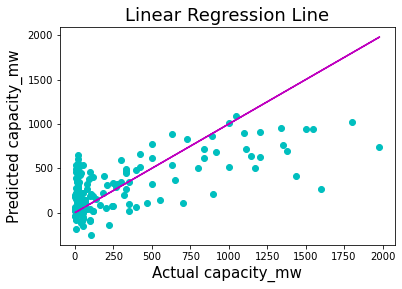

In [128]:
model(ls,x,y)

Training Accuracy of model Ridge() is -0.1349619686113792
Testing Accuracy of model Ridge() is -0.2803052048740724

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 229.19103360768105
The Mean Squared Error is (MSE)- 101016.52184855289
The Root Mean Squared Error is (RMSE)- 317.83096426961436


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Ridge() is 42.96215239617394 & std is 0.0351304091881543


At K-Fold 3 the CV Score of model Ridge() is 43.161811607381736 & std is 0.03875078602848949


At K-Fold 4 the CV Score of model Ridge() is 43.94780280441704 & std is 0.04874941243554889


At K-Fold 5 the CV Score of model Ridge() is 44.967260763925154 & std is 0.03837739855227483


At K-Fold 6 the CV Score of model Ridge() is 44.436914147177504 & std is 0.052137515284543155


At K-Fold 7 the CV Score of model Ridge() is 42.0906140516227 & std is 0.12880290303855357


At K-Fold 8 the CV Score of model Ridge() is 43.55660488796545 & std is 0.1

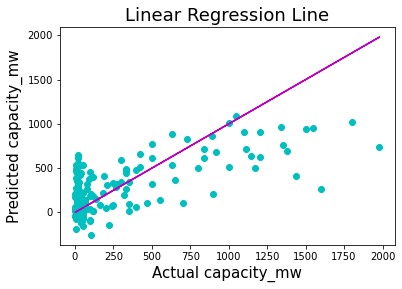

In [129]:
model(rd,x,y)

Training Accuracy of model ElasticNet() is -0.6877953138732997
Testing Accuracy of model ElasticNet() is -0.9250511859915025

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 229.57818033366183
The Mean Squared Error is (MSE)- 104331.03483634573
The Root Mean Squared Error is (RMSE)- 323.0031498861052


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model ElasticNet() is 42.439859531872 & std is 0.009928042974554518


At K-Fold 3 the CV Score of model ElasticNet() is 42.776103250469994 & std is 0.011932522926516994


At K-Fold 4 the CV Score of model ElasticNet() is 43.32260816137655 & std is 0.025136131673401528


At K-Fold 5 the CV Score of model ElasticNet() is 44.31428233095568 & std is 0.03315711810889364


At K-Fold 6 the CV Score of model ElasticNet() is 43.70048473053534 & std is 0.039510850121691705


At K-Fold 7 the CV Score of model ElasticNet() is 41.690581569057436 & std is 0.09860456603208248


At K-Fold 8 the CV Score of model 

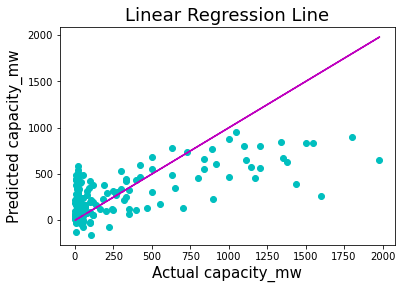

In [130]:
model(en,x,y)

Training Accuracy of model SGDRegressor() is -0.14071251143250207
Testing Accuracy of model SGDRegressor() is -0.28614224045661807

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 231.4533329925523
The Mean Squared Error is (MSE)- 102132.57599211801
The Root Mean Squared Error is (RMSE)- 319.5818768205075


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model SGDRegressor() is 42.643029769205384 & std is 0.03596642552205204


At K-Fold 3 the CV Score of model SGDRegressor() is 43.27719307041831 & std is 0.04115841067070361


At K-Fold 4 the CV Score of model SGDRegressor() is 44.097482211053276 & std is 0.04532745289560779


At K-Fold 5 the CV Score of model SGDRegressor() is 45.11788113530167 & std is 0.036392104300230405


At K-Fold 6 the CV Score of model SGDRegressor() is 44.86632297002455 & std is 0.04649581501990432


At K-Fold 7 the CV Score of model SGDRegressor() is 42.05371858026776 & std is 0.12727548838228736


At K-Fold 8 the CV

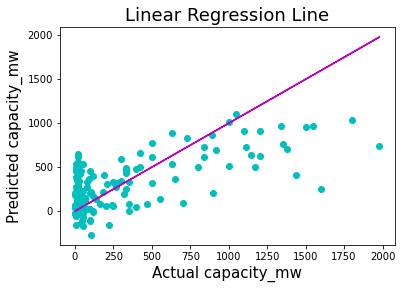

In [131]:
model(sgd,x,y)

Training Accuracy of model RandomForestRegressor() is 0.9345305926802056
Testing Accuracy of model RandomForestRegressor() is 0.603473929732387

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 133.98120718562873
The Mean Squared Error is (MSE)- 55835.45889625636
The Root Mean Squared Error is (RMSE)- 236.2952790392909


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model RandomForestRegressor() is 58.15577323202905 & std is 0.03492947838448446


At K-Fold 3 the CV Score of model RandomForestRegressor() is 60.25319214736125 & std is 0.06598130365129386


At K-Fold 4 the CV Score of model RandomForestRegressor() is 63.61474341899164 & std is 0.05093442047681692


At K-Fold 5 the CV Score of model RandomForestRegressor() is 65.32632358761283 & std is 0.049839556488782966


At K-Fold 6 the CV Score of model RandomForestRegressor() is 66.0243700993115 & std is 0.05905965534363688


At K-Fold 7 the CV Score of model RandomForestRegressor() is 64.

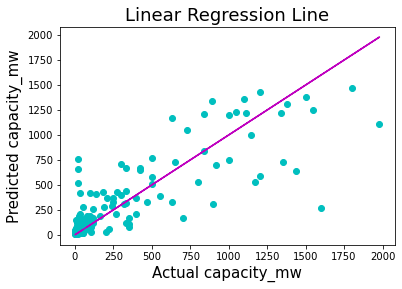

In [132]:
model(rf,x,y)

Training Accuracy of model AdaBoostRegressor() is -0.04055395621311675
Testing Accuracy of model AdaBoostRegressor() is -0.21281574989521834

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 305.84479777917187
The Mean Squared Error is (MSE)- 128772.43782627645
The Root Mean Squared Error is (RMSE)- 358.8487673467424


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model AdaBoostRegressor() is 44.73915722960143 & std is 0.07623861728500403


At K-Fold 3 the CV Score of model AdaBoostRegressor() is 41.50973422234448 & std is 0.06326436260780875


At K-Fold 4 the CV Score of model AdaBoostRegressor() is 41.99848077007548 & std is 0.1370357548704734


At K-Fold 5 the CV Score of model AdaBoostRegressor() is 38.97263173446889 & std is 0.10588055551096692


At K-Fold 6 the CV Score of model AdaBoostRegressor() is 40.56341410985079 & std is 0.20803360496106976


At K-Fold 7 the CV Score of model AdaBoostRegressor() is 35.383235454815235 & std is 0.

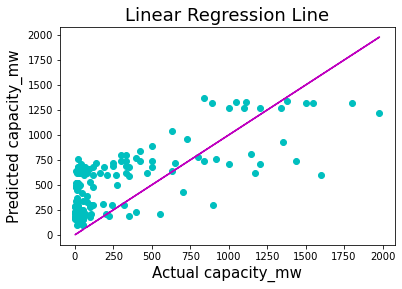

In [133]:
model(ad,x,y)

Training Accuracy of model GradientBoostingRegressor() is 0.8577983225064433
Testing Accuracy of model GradientBoostingRegressor() is 0.5650723262837241

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 140.8572726255893
The Mean Squared Error is (MSE)- 55755.779200682286
The Root Mean Squared Error is (RMSE)- 236.12661688315083


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model GradientBoostingRegressor() is 50.31803551652363 & std is 0.051790497730395624


At K-Fold 3 the CV Score of model GradientBoostingRegressor() is 49.3468004035439 & std is 0.09262644887154367


At K-Fold 4 the CV Score of model GradientBoostingRegressor() is 60.766283864374145 & std is 0.05949347040665172


At K-Fold 5 the CV Score of model GradientBoostingRegressor() is 59.63522543796284 & std is 0.06307245436995589


At K-Fold 6 the CV Score of model GradientBoostingRegressor() is 63.15154580098682 & std is 0.061377395724277216


At K-Fold 7 the CV Score of mode

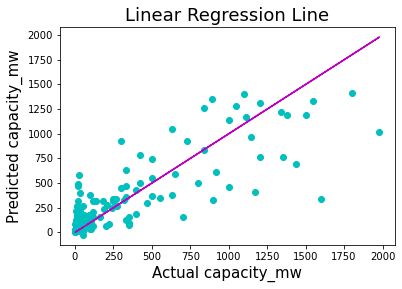

In [134]:
model(grd,x,y)

#### Hyper Parameter Tuning
##### To make the model more accurate by providing their best parameters

In [135]:
from sklearn.model_selection import GridSearchCV

In [136]:
#defining all the parameters of the respective models
dict_ls={'alpha':[.0001,.001,.01,.1,1,10],'selection':['cyclic', 'random']}
dict_rd={'alpha':[.0001,.001,.01,.1,1,10],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga', 'lbfgs']}
dict_en={'alpha':[.0001,.001,.01,.1,1,10],'selection':['cyclic', 'random']}
dict_rf={'criterion' : ["squared_error", "absolute_error", "poisson"],'max_features':["sqrt", "log2", None]}
dict_ad={'loss':['linear', 'square', 'exponential']}
dict_grd={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],'criterion':['friedman_mse', 'squared_error', 'mse'],'max_features':['auto', 'sqrt', 'log2']}
dict_sgd={'alpha':[.0001,.001,.01,.1,1,10],'penalty':['l2', 'l1', 'elasticnet'],'learning_rate':['constant', 'optimal', 'invscaling','adaptive'],'loss':['squared_error','huber','epsilon_insensitive','squared_epsilon_insensitive']}

In [137]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def HPT(machine,dictionary):
    grd=GridSearchCV(machine,dictionary)
    grd.fit(x,y)
    print(f'The best Parameters of the model {machine} are {grd.best_params_}')

In [138]:
HPT(ls,dict_ls)

The best Parameters of the model Lasso() are {'alpha': 10, 'selection': 'cyclic'}


In [139]:
HPT(rd,dict_rd)

The best Parameters of the model Ridge() are {'alpha': 10, 'solver': 'saga'}


In [140]:
HPT(en,dict_en)

The best Parameters of the model ElasticNet() are {'alpha': 0.1, 'selection': 'random'}


In [141]:
HPT(sgd,dict_sgd)

The best Parameters of the model SGDRegressor() are {'alpha': 0.01, 'learning_rate': 'optimal', 'loss': 'squared_error', 'penalty': 'l2'}


In [142]:
HPT(rf,dict_rf)

The best Parameters of the model RandomForestRegressor() are {'criterion': 'poisson', 'max_features': 'log2'}


In [143]:
HPT(ad,dict_ad)

The best Parameters of the model AdaBoostRegressor() are {'loss': 'linear'}


In [144]:
HPT(grd,dict_grd)

The best Parameters of the model GradientBoostingRegressor() are {'criterion': 'squared_error', 'loss': 'huber', 'max_features': 'log2'}


In [147]:
#Redefining the models after getting the parameters
ls=Lasso(alpha=10,selection='cyclic')
rd=Ridge(alpha=10,solver='saga')
en=ElasticNet(alpha=0.1,selection='random')
rf=RandomForestRegressor(criterion='poisson',max_features='log2')
ad=AdaBoostRegressor(loss='linear')
grd=GradientBoostingRegressor(criterion='squared_error',loss='huber',max_features='log2')
sgd=SGDRegressor(alpha=0.01,learning_rate='optimal',penalty='l2',loss='squared_error')

Training Accuracy of model Lasso(alpha=10) is -0.20383894010215542
Testing Accuracy of model Lasso(alpha=10) is -0.3636656802655245

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 227.35050166941073
The Mean Squared Error is (MSE)- 100996.60946891921
The Root Mean Squared Error is (RMSE)- 317.79963730142805


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Lasso(alpha=10) is 43.22009413046729 & std is 0.027606550796067664


At K-Fold 3 the CV Score of model Lasso(alpha=10) is 43.418517316043605 & std is 0.03467030067606484


At K-Fold 4 the CV Score of model Lasso(alpha=10) is 44.09715177168974 & std is 0.04297086659089916


At K-Fold 5 the CV Score of model Lasso(alpha=10) is 45.08500091554852 & std is 0.03592041137329217


At K-Fold 6 the CV Score of model Lasso(alpha=10) is 44.557375597634625 & std is 0.051558926098997294


At K-Fold 7 the CV Score of model Lasso(alpha=10) is 42.14251144577415 & std is 0.1270938106465515


At K-Fold

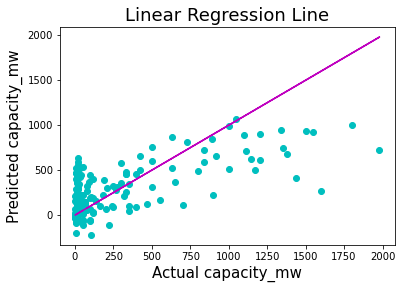

In [148]:
model(ls,x,y)

Training Accuracy of model Ridge(alpha=10, solver='saga') is -0.147952750320961
Testing Accuracy of model Ridge(alpha=10, solver='saga') is -0.2955557428933928

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 229.01900586936398
The Mean Squared Error is (MSE)- 101059.55366377062
The Root Mean Squared Error is (RMSE)- 317.8986531329924


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Ridge(alpha=10, solver='saga') is 43.01374230063101 & std is 0.033581629563892545


At K-Fold 3 the CV Score of model Ridge(alpha=10, solver='saga') is 43.20760064517049 & std is 0.03755841677404502


At K-Fold 4 the CV Score of model Ridge(alpha=10, solver='saga') is 43.980679591198104 & std is 0.04780359503442758


At K-Fold 5 the CV Score of model Ridge(alpha=10, solver='saga') is 44.995181771086955 & std is 0.037978054568853406


At K-Fold 6 the CV Score of model Ridge(alpha=10, solver='saga') is 44.457976477601974 & std is 0.05162146001127598


At K-Fo

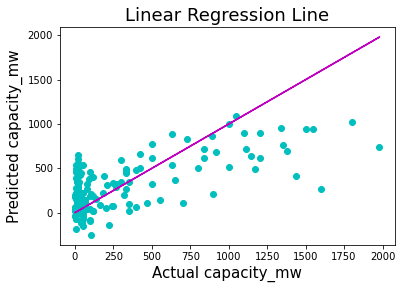

In [150]:
model(rd,x,y)

Training Accuracy of model ElasticNet(alpha=0.1, selection='random') is -0.18114307435859223
Testing Accuracy of model ElasticNet(alpha=0.1, selection='random') is -0.33457206253397365

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 228.60537872889353
The Mean Squared Error is (MSE)- 101162.91414010692
The Root Mean Squared Error is (RMSE)- 318.06117986970196


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model ElasticNet(alpha=0.1, selection='random') is 43.058837969002646 & std is 0.03184816521037942


At K-Fold 3 the CV Score of model ElasticNet(alpha=0.1, selection='random') is 43.282089899263944 & std is 0.03524998343033042


At K-Fold 4 the CV Score of model ElasticNet(alpha=0.1, selection='random') is 44.037951509483285 & std is 0.045663837472819116


At K-Fold 5 the CV Score of model ElasticNet(alpha=0.1, selection='random') is 45.05315890861099 & std is 0.037019877433848554


At K-Fold 6 the CV Score of model ElasticNet(alpha=0.1

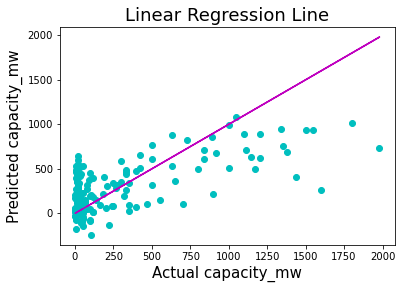

In [151]:
model(en,x,y)

Training Accuracy of model SGDRegressor(alpha=0.01, learning_rate='optimal') is -0.13772079586417996
Testing Accuracy of model SGDRegressor(alpha=0.01, learning_rate='optimal') is -0.27488651865935076

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 227.73008172451424
The Mean Squared Error is (MSE)- 99839.7647961302
The Root Mean Squared Error is (RMSE)- 315.9743103420438


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model SGDRegressor(alpha=0.01, learning_rate='optimal') is 37.84296389324356 & std is 0.04641943011437283


At K-Fold 3 the CV Score of model SGDRegressor(alpha=0.01, learning_rate='optimal') is 41.846056606328034 & std is 0.04481776551271305


At K-Fold 4 the CV Score of model SGDRegressor(alpha=0.01, learning_rate='optimal') is 44.659586574952336 & std is 0.03601422278623647


At K-Fold 5 the CV Score of model SGDRegressor(alpha=0.01, learning_rate='optimal') is 44.30984094079889 & std is 0.036734557086136446


At K-Fold 6

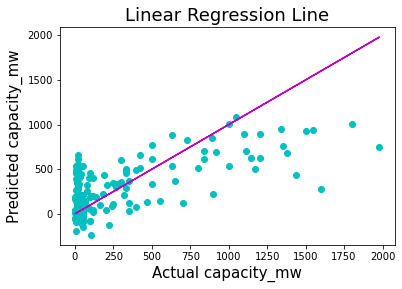

In [152]:
model(sgd,x,y)

Training Accuracy of model RandomForestRegressor(criterion='poisson', max_features='log2') is 0.9443448031246154
Testing Accuracy of model RandomForestRegressor(criterion='poisson', max_features='log2') is 0.6144189490164971

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 133.61982738522954
The Mean Squared Error is (MSE)- 50994.25146580452
The Root Mean Squared Error is (RMSE)- 225.81906798542173


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model RandomForestRegressor(criterion='poisson', max_features='log2') is 61.809714150300245 & std is 0.03607157250746662


At K-Fold 3 the CV Score of model RandomForestRegressor(criterion='poisson', max_features='log2') is 64.93013076970514 & std is 0.03103627642641066


At K-Fold 4 the CV Score of model RandomForestRegressor(criterion='poisson', max_features='log2') is 66.77236795374867 & std is 0.03817609259001196


At K-Fold 5 the CV Score of model RandomForestRegressor(criterion='poisson', max_

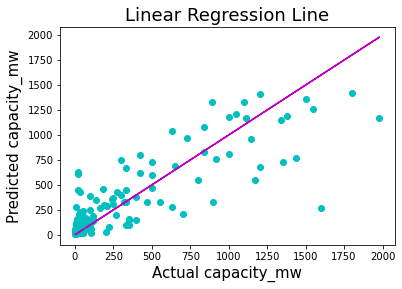

In [153]:
model(rf,x,y)

Training Accuracy of model AdaBoostRegressor() is -0.060612260411051055
Testing Accuracy of model AdaBoostRegressor() is -0.2084489280841868

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 312.8592268327511
The Mean Squared Error is (MSE)- 134739.8566026779
The Root Mean Squared Error is (RMSE)- 367.06928038543066


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model AdaBoostRegressor() is 42.95711129834027 & std is 0.13472716297332615


At K-Fold 3 the CV Score of model AdaBoostRegressor() is 36.154321562835754 & std is 0.18726376292284974


At K-Fold 4 the CV Score of model AdaBoostRegressor() is 42.82650694809293 & std is 0.15231588397945087


At K-Fold 5 the CV Score of model AdaBoostRegressor() is 34.59055658089178 & std is 0.13413427430386715


At K-Fold 6 the CV Score of model AdaBoostRegressor() is 39.236805256397474 & std is 0.15641126973535285


At K-Fold 7 the CV Score of model AdaBoostRegressor() is 41.03569700154687 & std is 0

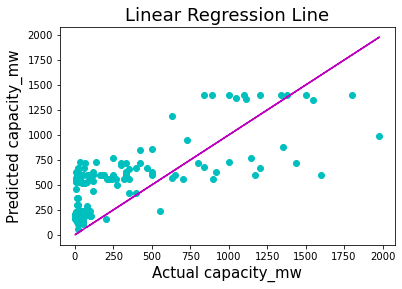

In [154]:
model(ad,x,y)

Training Accuracy of model GradientBoostingRegressor(criterion='squared_error', loss='huber',
                          max_features='log2') is 0.6806256293455544
Testing Accuracy of model GradientBoostingRegressor(criterion='squared_error', loss='huber',
                          max_features='log2') is 0.4956324452751596

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 134.67667575185297
The Mean Squared Error is (MSE)- 60577.908677436055
The Root Mean Squared Error is (RMSE)- 246.12579848003756


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model GradientBoostingRegressor(criterion='squared_error', loss='huber',
                          max_features='log2') is 47.69168858026264 & std is 0.02899197468945408


At K-Fold 3 the CV Score of model GradientBoostingRegressor(criterion='squared_error', loss='huber',
                          max_features='log2') is 58.86982332371483 & std is 0.023390541775939713


At K-Fold 4 the CV Score of mo

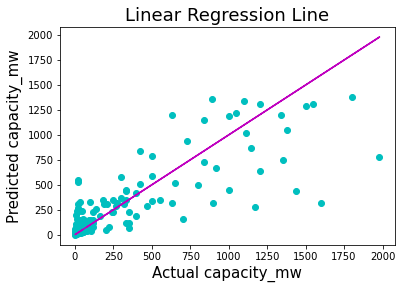

In [155]:
model(grd,x,y)

##### RandomForestRegressor model seems perfect as compare to other models as the RMSE(root mean square error) are less and training,testing accuracy and CV Accuracy is too good as compare to other models.

##### Root Square Mean indicates- the distance b/w the datapoints of predicted and original target and for better accuracy distance b/w the datapoints needs to be less.

#### Saving the Best Model

In [156]:
import joblib
file='global.obj'
joblib.dump(rf,file)

['global.obj']

#### Loading the Modle

In [157]:
a=joblib.load('global.obj')
a

RandomForestRegressor(criterion='poisson', max_features='log2')

In [158]:
#making prediction
pred=a.predict(x_test)
pred

array([ 551.1074    ,   38.846     ,  142.88692   ,   58.0885    ,
        148.84701   ,   47.3108    , 1367.095     ,  232.326     ,
         24.378     ,   96.435     ,   13.672     ,   66.5747    ,
        129.498     ,  784.29      ,   17.7215    , 1410.8       ,
        600.2928    ,   24.132     ,  169.2694    ,  160.4215    ,
        584.9       ,    5.108     ,  519.265     , 1330.9       ,
         22.887     ,   19.774     ,  152.181     ,   43.194     ,
          9.0595    ,    8.109     , 1329.9       ,   82.4702    ,
         30.70817333,   43.213     ,    7.62316667, 1351.2       ,
         12.179     ,   54.89      ,   38.9638    ,   53.299     ,
         47.343     , 1159.1       ,   56.908     ,   88.864     ,
         21.0039    ,   31.102     ,   17.682     , 1164.862     ,
        171.295     ,   49.842     ,  951.        ,   38.1505    ,
         14.43      ,  926.612     , 1532.1       ,    7.38      ,
         15.654     ,   21.364     ,  276.57784   ,  290.165  

In [163]:
#Accuracy of RandomForestRegressor
accuracy_score=r2_score(pred,y_test)
accuracy_score

0.793963884113186

<AxesSubplot:ylabel='Density'>

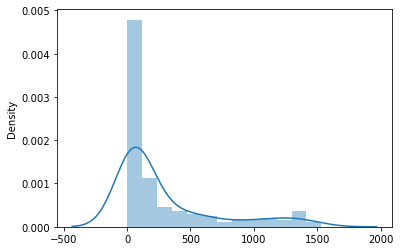

In [165]:
#plotting distribution plot to check normal distribution
sns.distplot(pred)

Text(0.5, 1.0, 'Linear Regression Line')

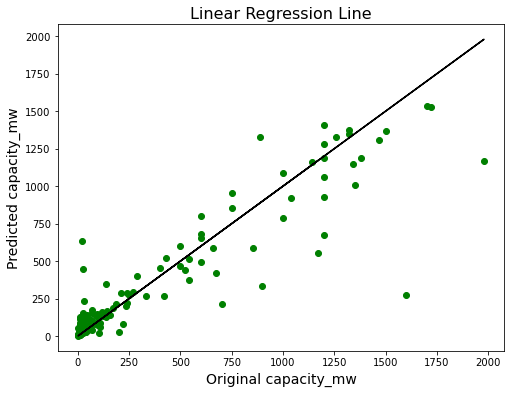

In [166]:
#Plotting Best-Fitted Line
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred,color='GREEN')
plt.plot(y_test,y_test,color='black')
plt.xlabel('Original capacity_mw',fontsize=14)
plt.ylabel('Predicted capacity_mw',fontsize=14)
plt.title('Linear Regression Line',fontsize=16)

As,we can see that the distance b/w the datapoints of the predicted capacity and original capacity is not that high which indicates RMSE to be on lower side.which indicates that our model is performing well

### Conclusion

In [170]:
df=pd.DataFrame(data=([pred,y_test]),index=['Predicted capacity_mw','Original capacity_mw'])
df

0       1          2        3          4    \
Predicted capacity_mw   551.1074  38.846  142.88692  58.0885  148.84701   
Original capacity_mw   1170.0000  23.100   45.00000  35.1000   94.20000   

                           5         6        7       8       9    ...  \
Predicted capacity_mw  47.3108  1367.095  232.326  24.378  96.435  ...   
Original capacity_mw   20.0000  1500.000   30.000  36.300  70.000  ...   

                          157      158     159     160     161     162  \
Predicted capacity_mw  1281.6  20.5881  25.527  16.113  1527.0  36.251   
Original capacity_mw   1200.0  16.0000  27.650   6.600  1720.0  20.000   

                             163       164       165      166  
Predicted capacity_mw  12.533667  586.7128  1004.656  38.3725  
Original capacity_mw   15.000000  855.0000  1350.000  11.2000  

[2 rows x 167 columns]

##### As our model accuracy is 80% and its prediction is almost same as original one hence Random Forest Regressor is one of the best model among all which have less RMSE, high Training ,Testing and CV score.Also,this model training accuracy is 100% that's why model testing accuracy was 80% as model got lot's of data for the training.

### B): Classification Model Building(Taking primary_fuel as Target)

##### I've already done the EDA process in the first part hence will start by checking Correlation,outliers,skewness and all and later on will built a classification model

#### Correlation

In [181]:
#I've taken the same dataframe as i did in first part where I did remove all the meaningless attributes.
df.corr().primary_fuel.sort_values()

geolocation_source    -0.483217
capacity_mw           -0.380395
longitude             -0.347948
generation_gwh_2018   -0.136983
generation_gwh_2017   -0.132003
generation_gwh_2016   -0.131051
commissioning_year    -0.126650
generation_gwh_2015   -0.124828
generation_gwh_2014   -0.124769
latitude              -0.010204
other_fuel1            0.004912
source                 0.053613
owner                  0.284296
gppd_idnr              0.609180
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

Will remove all the negative columns later on

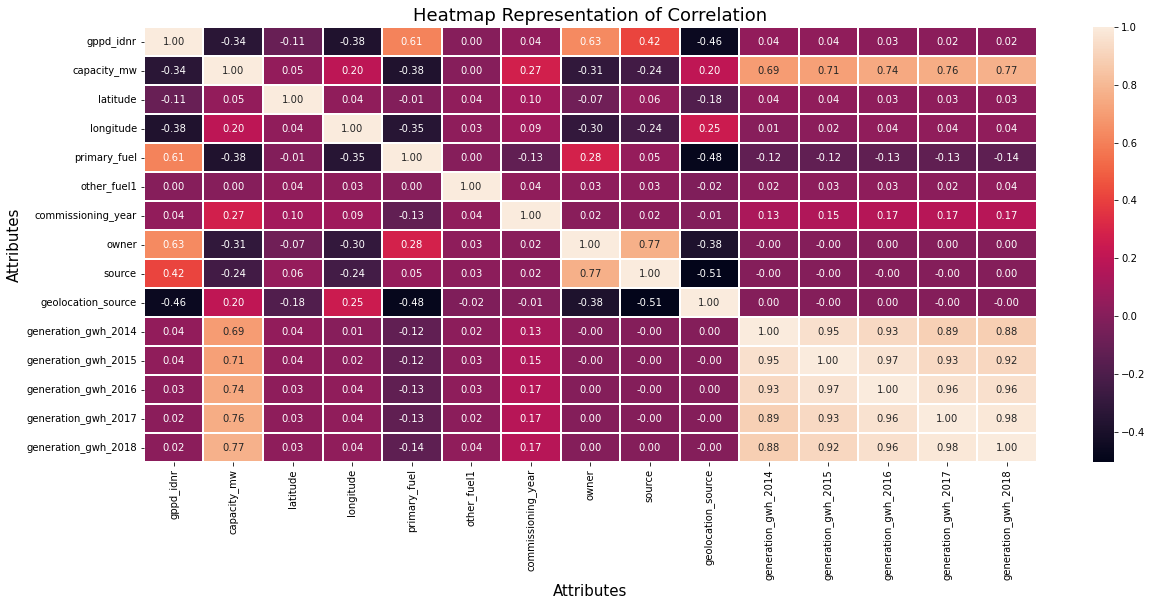

In [180]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,linewidth=0.2,linecolor='white',fmt='0.2f')
plt.xlabel('Attributes',fontsize=15)
plt.ylabel('Attributes',fontsize=15)
plt.title('Heatmap Representation of Correlation',fontsize=18)
plt.show()

#### Multicollinearity

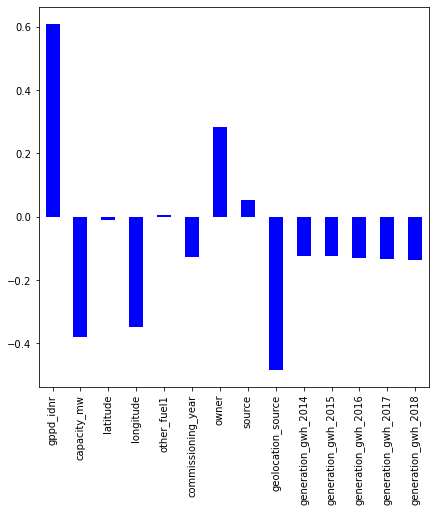

In [189]:
plt.figure(figsize=(7,7))
df.corr().primary_fuel.drop(['primary_fuel']).plot(kind='bar',color='blue')
plt.show()

Will remove Multicollinearity later on

#### Skewness

In [190]:
df.skew().sort_values()

other_fuel1           -20.453120
geolocation_source     -2.159841
commissioning_year     -1.399359
latitude               -0.149698
gppd_idnr               0.000000
primary_fuel            0.472251
longitude               1.141881
owner                   1.364406
source                  1.827373
capacity_mw             3.123576
generation_gwh_2018     4.937907
generation_gwh_2014     5.035446
generation_gwh_2016     5.068427
generation_gwh_2017     5.110952
generation_gwh_2015     5.364134
dtype: float64

Skewness is present will remove in next part

#### Outliers

In [191]:
z1=np.abs(zscore(df))
np.where(z1>3)

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
        147, 158, 179, 183, 191, 209, 209, 209, 209, 209, 209, 222, 244,
        299, 308, 308, 308, 308, 308, 308, 321, 323, 333, 340, 342, 345,
        360, 363, 364, 364, 364, 364, 364, 364, 371, 375, 416, 427, 444,
        454, 478, 482, 484, 493, 493, 493, 493, 493, 493, 494, 494, 494,
        494, 494, 494, 499, 519, 538, 541, 546, 573, 577, 583, 592, 601,
        621, 638, 648, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657,
        657, 661, 669, 689, 695, 695, 695, 695, 695, 695, 706, 709, 721,
        721, 721, 721, 724, 724, 724, 724, 724, 726, 726, 726, 726, 726,
        726, 728, 767, 786, 786, 786, 786, 786, 786, 788, 807, 808, 808,
        808, 808, 808, 808, 811, 813, 817, 818, 832, 847, 848, 870, 871,
        879, 880, 880, 880, 880, 880, 880, 895, 900], dtype=int64),
 array([ 1, 11, 12, 13, 14,  8,  8,  1, 10, 11, 12, 13, 14,  1, 10,  3,  3,
         8,  1, 10, 11, 12, 13, 14,  6,  3,  8,  1, 1

###### There are lots of rows and columns having outliers

In [192]:
z1.iloc[879,8]

3.118730590058321

In [193]:
z1.iloc[900,8]

3.2532048583162174

#### Data Cleansing
##### 1.Removing Negative Correlation

In [195]:
df4=df.drop(['capacity_mw','longitude','generation_gwh_2018','generation_gwh_2017','generation_gwh_2016','commissioning_year','generation_gwh_2015','generation_gwh_2014','latitude'],axis=1)
df4

gppd_idnr  primary_fuel  other_fuel1  owner  source  geolocation_source
0          657             6            2    229     109                   1
1          519             1            2    258     174                   2
2          853             7            2      2      21                   2
3            0             2            2      5      22                   2
4            1             1            2      5      22                   2
..         ...           ...          ...    ...     ...                 ...
902        491             1            2      5      22                   2
903        822             6            2    114      77                   0
904        891             7            2      5      21                   2
905        539             1            2     91      59                   2
906        876             7            2    279      21                   2

[907 rows x 6 columns]

#### Removing Multicollinearity

In [197]:
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [198]:
x=df4.drop(['primary_fuel'],axis=1)
x

gppd_idnr  other_fuel1  owner  source  geolocation_source
0          657            2    229     109                   1
1          519            2    258     174                   2
2          853            2      2      21                   2
3            0            2      5      22                   2
4            1            2      5      22                   2
..         ...          ...    ...     ...                 ...
902        491            2      5      22                   2
903        822            2    114      77                   0
904        891            2      5      21                   2
905        539            2     91      59                   2
906        876            2    279      21                   2

[907 rows x 5 columns]

In [199]:
def vif():
    df5=pd.DataFrame()
    df5['Features']=x.columns
    df5['Variance_Inflation_Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(df5)

In [200]:
vif()

             Features  Variance_Inflation_Factor
0           gppd_idnr                   7.742893
1         other_fuel1                  25.071885
2               owner                   5.228861
3              source                   5.899975
4  geolocation_source                  11.466666


See attribute owner and source are having same VIF score but since both are categorical one hence will not drop it

#### Removing Outliers

In [206]:
df5=df4[(z1<3).all(axis=1)]
df5

gppd_idnr  primary_fuel  other_fuel1  owner  source  geolocation_source
0          657             6            2    229     109                   1
1          519             1            2    258     174                   2
2          853             7            2      2      21                   2
3            0             2            2      5      22                   2
4            1             1            2      5      22                   2
..         ...           ...          ...    ...     ...                 ...
902        491             1            2      5      22                   2
903        822             6            2    114      77                   0
904        891             7            2      5      21                   2
905        539             1            2     91      59                   2
906        876             7            2    279      21                   2

[831 rows x 6 columns]

In [207]:
print(df4.shape)
print(df5.shape)

(907, 6)
(831, 6)


In [208]:
percentage_loss=(907-831)*100/907
percentage_loss

8.379272326350607

I'm getting the percentage loss is about 8% which is decent because our dataset is large having 907 rows and out of it we are loosing only 8% rows.Now we can move ahead by considering it

#### Removing Skewness

In [210]:
df5.skew().sort_values()

geolocation_source   -2.098153
gppd_idnr            -0.052788
other_fuel1           0.000000
primary_fuel          0.414888
owner                 1.316648
source                1.778820
dtype: float64

all are the categorical variables so will not remove skewness.will skip

#### Standard Scaler

In [211]:
x=df5.drop(['primary_fuel'],axis=1)
x

gppd_idnr  other_fuel1  owner  source  geolocation_source
0          657            2    229     109                   1
1          519            2    258     174                   2
2          853            2      2      21                   2
3            0            2      5      22                   2
4            1            2      5      22                   2
..         ...          ...    ...     ...                 ...
902        491            2      5      22                   2
903        822            2    114      77                   0
904        891            2      5      21                   2
905        539            2     91      59                   2
906        876            2    279      21                   2

[831 rows x 5 columns]

In [209]:
from sklearn.preprocessing import StandardScaler

In [212]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.74018501,  0.        ,  2.16222467,  1.56956787, -1.05254748],
       [ 0.22114078,  0.        ,  2.52448197,  3.11111028,  0.40280519],
       [ 1.47737828,  0.        , -0.67337558, -0.51744341,  0.40280519],
       ...,
       [ 1.6203035 ,  0.        , -0.63590068, -0.51744341,  0.40280519],
       [ 0.29636458,  0.        ,  0.43837959,  0.38376601,  0.40280519],
       [ 1.56388565,  0.        ,  2.78680622, -0.51744341,  0.40280519]])

2.907154394204983e-17
0.8944271909999159


AxesSubplot(0.125,0.125;0.775x0.755)


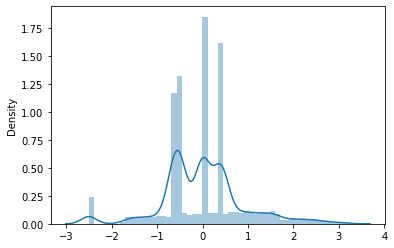

In [216]:
print(x.mean())
print(x.std())
print('\n')
print(sns.distplot(x))
plt.show()

Data is almost normally distributed

##### Not using PCA technique as I've less than 5 columns only

In [217]:
y=df5['primary_fuel']
y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 831, dtype: int32

#### Using IMBLearn Technique for balancing of Target class

In [226]:
import pandas
import numpy
print('sklearn version',sklearn.__version__)
print('numpy version',numpy.__version__)
print('pandas version',pandas.__version__)

sklearn version 1.1.2
numpy version 1.20.3
pandas version 1.3.4


In [224]:
!pip install -U imbalanced-learn

In [227]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [228]:
y.value_counts()

6    230
1    230
7    230
2    230
3    230
0    230
5    230
4    230
Name: primary_fuel, dtype: int64

##### We can now clearly see that the classes of target variable primary_fuel is balanced.There are total 8 class are present and due to this we can't use Logistic Regression as well GaussianNB because these two supports only binary classes 0 & 1.

In [229]:
print(x.shape)
print(y.shape)

(1840, 5)
(1840,)


we can't use Logistice and gaussian NB model as class is greater than 2

#### Training-Testing Phase

##### taking 20% for test and 80% for training

In [230]:
#importing machine learning libraries for classification model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
kn=KNeighborsClassifier()

In [231]:
#will finding best value of random_state
for h in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=h)
    kn.fit(x_train,y_train)
    pred_train=kn.predict(x_train)
    pred_test=kn.predict(x_test)
    if accuracy_score(pred_train,y_train) == accuracy_score(pred_test,y_test):
        print('At random_state',h,'the model perform very well')
        print('At random_state',h)
        print('Training Accuracy Score is- ',accuracy_score(pred_train,y_train))
        print('Testing Accuracy Score is- ',accuracy_score(pred_test,y_test))
    else:
        print('At random_state',h)
        print('Training Accuracy Score is- ',accuracy_score(pred_train,y_train))
        print('Testing Accuracy Score is- ',accuracy_score(pred_test,y_test))
        print('\n')

At random_state 0
Training Accuracy Score is-  0.7038043478260869
Testing Accuracy Score is-  0.5597826086956522


At random_state 1
Training Accuracy Score is-  0.7058423913043478
Testing Accuracy Score is-  0.6086956521739131


At random_state 2
Training Accuracy Score is-  0.7139945652173914
Testing Accuracy Score is-  0.5679347826086957


At random_state 3
Training Accuracy Score is-  0.7004076086956522
Testing Accuracy Score is-  0.6141304347826086


At random_state 4
Training Accuracy Score is-  0.7241847826086957
Testing Accuracy Score is-  0.5679347826086957


At random_state 5
Training Accuracy Score is-  0.7160326086956522
Testing Accuracy Score is-  0.5815217391304348


At random_state 6
Training Accuracy Score is-  0.7153532608695652
Testing Accuracy Score is-  0.532608695652174


At random_state 7
Training Accuracy Score is-  0.7072010869565217
Testing Accuracy Score is-  0.5896739130434783


At random_state 8
Training Accuracy Score is-  0.7004076086956522
Testing Accurac

In [232]:
#Traing the Logistic Regression Model at Random_State 47
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=47)
kn.fit(x_train,y_train)
pred_train=kn.predict(x_train)
pred_test=kn.predict(x_test)
print('At random_state',47)
print('Training Accuracy Score is- ',accuracy_score(pred_train,y_train))
print('Testing Accuracy Score is- ',accuracy_score(pred_test,y_test))
print('\n')

At random_state 47
Training Accuracy Score is-  0.7105978260869565
Testing Accuracy Score is-  0.6141304347826086




##### KNeighborsClassifier model performs well but since training accuracy is more than testing accuracy hence there would be overfitting and due to this Bias will be on lower side and variance would be on higher side,also will check the cv score for each model going forward.

#### Finding Out CV Score

In [233]:
from sklearn.model_selection import cross_val_score

In [234]:
for i in range(2,12):
    cvs=cross_val_score(kn,x,y,cv=i)
    print(f'At K-Fold {i} the CV Score of model is {cvs.mean()}')

At K-Fold 2 the CV Score of model is 0.5358695652173913
At K-Fold 3 the CV Score of model is 0.5358633870199249
At K-Fold 4 the CV Score of model is 0.5407608695652173
At K-Fold 5 the CV Score of model is 0.5407608695652173
At K-Fold 6 the CV Score of model is 0.5353107946037626
At K-Fold 7 the CV Score of model is 0.5364139967077302
At K-Fold 8 the CV Score of model is 0.5282608695652173
At K-Fold 9 the CV Score of model is 0.5347441415590626
At K-Fold 10 the CV Score of model is 0.5369565217391304
At K-Fold 11 the CV Score of model is 0.5363623402545558


##### we are getting good CV score as 54%,so we can say that CV score is helping the model in generalizing and make it perform better while doing the prediction.

In [236]:
#importing other libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
dtc=DecisionTreeClassifier()
svc=SVC()
mnb=MultinomialNB()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
grd=GradientBoostingClassifier()
sgd=SGDClassifier()

In [237]:
#creating a definition to expand the model individually
def model(algorithm,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=86)
    algorithm.fit(x_train,y_train)
    pred_train_x=algorithm.predict(x_train)
    pred_test_y=algorithm.predict(x_test)
    print('For',algorithm)
    print('Training_Accuracy_Score=',accuracy_score(y_train,pred_train_x))
    print('Testing_Accuracy_Score=',accuracy_score(y_test,pred_test_y))
    for l in range(2,12):
        cvscore=cross_val_score(algorithm,x,y,cv=l)
        cv_accuracy_score=cvscore.mean()
        print(f'At the K-Fold {l} the CV score of model {algorithm} is {cv_accuracy_score}')
        print('\n')

###### Since Multiclass format is not applicable for AUC_ROC CURVE as it supports only two classes (0&1) hence will not plot Auc_Roc curve

In [239]:
model(dtc,x,y)

For DecisionTreeClassifier()
Training_Accuracy_Score= 0.9993206521739131
Testing_Accuracy_Score= 0.5244565217391305
At the K-Fold 2 the CV score of model DecisionTreeClassifier() is 0.5603260869565218


At the K-Fold 3 the CV score of model DecisionTreeClassifier() is 0.5472835222371598


At the K-Fold 4 the CV score of model DecisionTreeClassifier() is 0.5445652173913044


At the K-Fold 5 the CV score of model DecisionTreeClassifier() is 0.5423913043478261


At the K-Fold 6 the CV score of model DecisionTreeClassifier() is 0.5429467118008984


At the K-Fold 7 the CV score of model DecisionTreeClassifier() is 0.5434857424814757


At the K-Fold 8 the CV score of model DecisionTreeClassifier() is 0.5407608695652174


At the K-Fold 9 the CV score of model DecisionTreeClassifier() is 0.5315133641532493


At the K-Fold 10 the CV score of model DecisionTreeClassifier() is 0.5375


At the K-Fold 11 the CV score of model DecisionTreeClassifier() is 0.5380213598776472




In [240]:
model(svc,x,y)

For SVC()
Training_Accuracy_Score= 0.5536684782608695
Testing_Accuracy_Score= 0.5081521739130435
At the K-Fold 2 the CV score of model SVC() is 0.4809782608695652


At the K-Fold 3 the CV score of model SVC() is 0.4923986800644027


At the K-Fold 4 the CV score of model SVC() is 0.49510869565217386


At the K-Fold 5 the CV score of model SVC() is 0.5010869565217391


At the K-Fold 6 the CV score of model SVC() is 0.5000177414433019


At the K-Fold 7 the CV score of model SVC() is 0.4983766704952088


At the K-Fold 8 the CV score of model SVC() is 0.49619565217391304


At the K-Fold 9 the CV score of model SVC() is 0.4961820500557947


At the K-Fold 10 the CV score of model SVC() is 0.4972826086956522


At the K-Fold 11 the CV score of model SVC() is 0.5016298571687794




In [243]:
model(rfc,x,y)

For RandomForestClassifier()
Training_Accuracy_Score= 0.9993206521739131
Testing_Accuracy_Score= 0.529891304347826
At the K-Fold 2 the CV score of model RandomForestClassifier() is 0.5657608695652174


At the K-Fold 3 the CV score of model RandomForestClassifier() is 0.5489113011072085


At the K-Fold 4 the CV score of model RandomForestClassifier() is 0.5527173913043478


At the K-Fold 5 the CV score of model RandomForestClassifier() is 0.5440217391304347


At the K-Fold 6 the CV score of model RandomForestClassifier() is 0.5527186987715824


At the K-Fold 7 the CV score of model RandomForestClassifier() is 0.5494649024965689


At the K-Fold 8 the CV score of model RandomForestClassifier() is 0.5489130434782609


At the K-Fold 9 the CV score of model RandomForestClassifier() is 0.5440273128221479


At the K-Fold 10 the CV score of model RandomForestClassifier() is 0.5451086956521739


At the K-Fold 11 the CV score of model RandomForestClassifier() is 0.5461738859942451




In [244]:
model(ad,x,y)

For AdaBoostClassifier()
Training_Accuracy_Score= 0.38654891304347827
Testing_Accuracy_Score= 0.3641304347826087
At the K-Fold 2 the CV score of model AdaBoostClassifier() is 0.36684782608695654


At the K-Fold 3 the CV score of model AdaBoostClassifier() is 0.3603351559497177


At the K-Fold 4 the CV score of model AdaBoostClassifier() is 0.3673913043478261


At the K-Fold 5 the CV score of model AdaBoostClassifier() is 0.3945652173913044


At the K-Fold 6 the CV score of model AdaBoostClassifier() is 0.37988865470183736


At the K-Fold 7 the CV score of model AdaBoostClassifier() is 0.3853261793499219


At the K-Fold 8 the CV score of model AdaBoostClassifier() is 0.3798913043478261


At the K-Fold 9 the CV score of model AdaBoostClassifier() is 0.3733832828524364


At the K-Fold 10 the CV score of model AdaBoostClassifier() is 0.37500000000000006


At the K-Fold 11 the CV score of model AdaBoostClassifier() is 0.3695952251341473




In [245]:
model(grd,x,y)

For GradientBoostingClassifier()
Training_Accuracy_Score= 0.8410326086956522
Testing_Accuracy_Score= 0.5679347826086957
At the K-Fold 2 the CV score of model GradientBoostingClassifier() is 0.5559782608695651


At the K-Fold 3 the CV score of model GradientBoostingClassifier() is 0.5532579489277737


At the K-Fold 4 the CV score of model GradientBoostingClassifier() is 0.5527173913043479


At the K-Fold 5 the CV score of model GradientBoostingClassifier() is 0.557608695652174


At the K-Fold 6 the CV score of model GradientBoostingClassifier() is 0.5559831243391312


At the K-Fold 7 the CV score of model GradientBoostingClassifier() is 0.566846760182609


At the K-Fold 8 the CV score of model GradientBoostingClassifier() is 0.566304347826087


At the K-Fold 9 the CV score of model GradientBoostingClassifier() is 0.5657633242999096


At the K-Fold 10 the CV score of model GradientBoostingClassifier() is 0.5673913043478261


At the K-Fold 11 the CV score of model GradientBoostingClassifi

In [238]:
model(sgd,x,y)

For SGDClassifier()
Training_Accuracy_Score= 0.48845108695652173
Testing_Accuracy_Score= 0.45108695652173914
At the K-Fold 2 the CV score of model SGDClassifier() is 0.37717391304347825


At the K-Fold 3 the CV score of model SGDClassifier() is 0.44239806012685695


At the K-Fold 4 the CV score of model SGDClassifier() is 0.4516304347826087


At the K-Fold 5 the CV score of model SGDClassifier() is 0.42826086956521736


At the K-Fold 6 the CV score of model SGDClassifier() is 0.45760149879713014


At the K-Fold 7 the CV score of model SGDClassifier() is 0.43150503169949955


At the K-Fold 8 the CV score of model SGDClassifier() is 0.46739130434782605


At the K-Fold 9 the CV score of model SGDClassifier() is 0.458130081300813


At the K-Fold 10 the CV score of model SGDClassifier() is 0.4190217391304348


At the K-Fold 11 the CV score of model SGDClassifier() is 0.45005443658138267




#### Hyper Parameter Tuning
##### To make the model more accurate by providing their best parameters

In [242]:
from sklearn.model_selection import GridSearchCV

In [262]:
#defining all the parameters of the respective models
dict_svc={'gamma':['scale', 'auto'],'decision_function_shape':['ovo', 'ovr']}
dict_dtc={'criterion':["gini", "entropy", "log_loss"],'splitter':["best", "random"],'max_features':["auto", "sqrt", "log2"]}
dict_rfc={'criterion' : ["gini", "entropy", "log_loss"],'max_features':["sqrt", "log2", None]}
dict_ad={'algorithm':['SAMME', 'SAMME.R']}
dict_grd={'loss':['log_loss', 'deviance', 'exponential'],'criterion':['friedman_mse', 'squared_error', 'mse']}

In [247]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def HPT(machine,dictionary):
    gd=GridSearchCV(machine,dictionary)
    gd.fit(x,y)
    print(f'The best Parameters of the model {machine} is {gd.best_params_}')

In [249]:
HPT(svc,dict_svc)

The best Parameters of the model SVC() is {'decision_function_shape': 'ovo', 'gamma': 'scale'}


In [250]:
HPT(dtc,dict_dtc)

The best Parameters of the model DecisionTreeClassifier() is {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}


In [251]:
HPT(rfc,dict_rfc)

The best Parameters of the model RandomForestClassifier() is {'criterion': 'gini', 'max_features': None}


In [252]:
HPT(ad,dict_ad)

The best Parameters of the model AdaBoostClassifier() is {'algorithm': 'SAMME'}


In [253]:
HPT(grd,dict_grd)

The best Parameters of the model GradientBoostingClassifier() is {'criterion': 'friedman_mse', 'loss': 'log_loss'}


In [254]:
#Redefining the models after getting the parameters
svc=SVC(decision_function_shape='ovo',gamma='scale')
dtc=DecisionTreeClassifier(criterion='gini',max_features='sqrt',splitter='best')
rfc=RandomForestClassifier(criterion='gini',max_features=None)
ad=AdaBoostClassifier(algorithm= 'SAMME')
grd=GradientBoostingClassifier(loss='log_loss',criterion='friedman_mse')

In [264]:
model(kn,x,y)

For KNeighborsClassifier()
Training_Accuracy_Score= 0.7105978260869565
Testing_Accuracy_Score= 0.5978260869565217
At the K-Fold 2 the CV score of model KNeighborsClassifier() is 0.5358695652173913


At the K-Fold 3 the CV score of model KNeighborsClassifier() is 0.5358633870199249


At the K-Fold 4 the CV score of model KNeighborsClassifier() is 0.5407608695652173


At the K-Fold 5 the CV score of model KNeighborsClassifier() is 0.5407608695652173


At the K-Fold 6 the CV score of model KNeighborsClassifier() is 0.5353107946037626


At the K-Fold 7 the CV score of model KNeighborsClassifier() is 0.5364139967077302


At the K-Fold 8 the CV score of model KNeighborsClassifier() is 0.5282608695652173


At the K-Fold 9 the CV score of model KNeighborsClassifier() is 0.5347441415590626


At the K-Fold 10 the CV score of model KNeighborsClassifier() is 0.5369565217391304


At the K-Fold 11 the CV score of model KNeighborsClassifier() is 0.5363623402545558




In [260]:
model(svc,x,y)

For SVC(decision_function_shape='ovo')
Training_Accuracy_Score= 0.5536684782608695
Testing_Accuracy_Score= 0.5081521739130435
At the K-Fold 2 the CV score of model SVC(decision_function_shape='ovo') is 0.4809782608695652


At the K-Fold 3 the CV score of model SVC(decision_function_shape='ovo') is 0.4923986800644027


At the K-Fold 4 the CV score of model SVC(decision_function_shape='ovo') is 0.49510869565217386


At the K-Fold 5 the CV score of model SVC(decision_function_shape='ovo') is 0.5010869565217391


At the K-Fold 6 the CV score of model SVC(decision_function_shape='ovo') is 0.5000177414433019


At the K-Fold 7 the CV score of model SVC(decision_function_shape='ovo') is 0.4983766704952088


At the K-Fold 8 the CV score of model SVC(decision_function_shape='ovo') is 0.49619565217391304


At the K-Fold 9 the CV score of model SVC(decision_function_shape='ovo') is 0.4961820500557947


At the K-Fold 10 the CV score of model SVC(decision_function_shape='ovo') is 0.4972826086956522


In [261]:
model(dtc,x,y)

For DecisionTreeClassifier(max_features='sqrt')
Training_Accuracy_Score= 0.9993206521739131
Testing_Accuracy_Score= 0.5244565217391305
At the K-Fold 2 the CV score of model DecisionTreeClassifier(max_features='sqrt') is 0.553804347826087


At the K-Fold 3 the CV score of model DecisionTreeClassifier(max_features='sqrt') is 0.5391233728853487


At the K-Fold 4 the CV score of model DecisionTreeClassifier(max_features='sqrt') is 0.5342391304347827


At the K-Fold 5 the CV score of model DecisionTreeClassifier(max_features='sqrt') is 0.5380434782608695


At the K-Fold 6 the CV score of model DecisionTreeClassifier(max_features='sqrt') is 0.5407627401304351


At the K-Fold 7 the CV score of model DecisionTreeClassifier(max_features='sqrt') is 0.5369779119380025


At the K-Fold 8 the CV score of model DecisionTreeClassifier(max_features='sqrt') is 0.5402173913043478


At the K-Fold 9 the CV score of model DecisionTreeClassifier(max_features='sqrt') is 0.5331712630851799


At the K-Fold 10 t

In [259]:
model(rfc,x,y)

For RandomForestClassifier(max_features=None)
Training_Accuracy_Score= 0.9993206521739131
Testing_Accuracy_Score= 0.5271739130434783
At the K-Fold 2 the CV score of model RandomForestClassifier(max_features=None) is 0.5630434782608695


At the K-Fold 3 the CV score of model RandomForestClassifier(max_features=None) is 0.5543463821330458


At the K-Fold 4 the CV score of model RandomForestClassifier(max_features=None) is 0.5510869565217392


At the K-Fold 5 the CV score of model RandomForestClassifier(max_features=None) is 0.5510869565217391


At the K-Fold 6 the CV score of model RandomForestClassifier(max_features=None) is 0.5543491374110266


At the K-Fold 7 the CV score of model RandomForestClassifier(max_features=None) is 0.5494607560610522


At the K-Fold 8 the CV score of model RandomForestClassifier(max_features=None) is 0.5489130434782608


At the K-Fold 9 the CV score of model RandomForestClassifier(max_features=None) is 0.5429300175354695


At the K-Fold 10 the CV score of mo

In [256]:
model(ad,x,y)

For AdaBoostClassifier(algorithm='SAMME')
Training_Accuracy_Score= 0.5258152173913043
Testing_Accuracy_Score= 0.4782608695652174
At the K-Fold 2 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.3896739130434782


At the K-Fold 3 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.4592267076179697


At the K-Fold 4 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.44891304347826083


At the K-Fold 5 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.4728260869565218


At the K-Fold 6 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.40212045730344254


At the K-Fold 7 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.45651011108300754


At the K-Fold 8 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.45978260869565224


At the K-Fold 9 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.47281205164992823


At the K-Fold 10 the CV score of model AdaBoostClassifier(algorith

In [257]:
model(grd,x,y)

For GradientBoostingClassifier()
Training_Accuracy_Score= 0.8410326086956522
Testing_Accuracy_Score= 0.5679347826086957
At the K-Fold 2 the CV score of model GradientBoostingClassifier() is 0.5565217391304348


At the K-Fold 3 the CV score of model GradientBoostingClassifier() is 0.5538017227178771


At the K-Fold 4 the CV score of model GradientBoostingClassifier() is 0.5527173913043479


At the K-Fold 5 the CV score of model GradientBoostingClassifier() is 0.557608695652174


At the K-Fold 6 the CV score of model GradientBoostingClassifier() is 0.5554402361740932


At the K-Fold 7 the CV score of model GradientBoostingClassifier() is 0.5673899432352977


At the K-Fold 8 the CV score of model GradientBoostingClassifier() is 0.566304347826087


At the K-Fold 9 the CV score of model GradientBoostingClassifier() is 0.5657633242999096


At the K-Fold 10 the CV score of model GradientBoostingClassifier() is 0.5679347826086957


At the K-Fold 11 the CV score of model GradientBoostingClassif

After applying the best parameters on each models i must say that RandomForestClassifier model performs really well in predicting the primary_fuel.Though target was having 8 classes but still model gives us training accuracy score as 100% and testing accuracy score as 53%. Also the CV score which is 56%, is getting increased everytime when i'm increasing the fold numbers.Hence i'll consider this model as best one for predicting the target.

#### Saving the Best Modle

In [265]:
import joblib

##### 3rd Best Model

In [277]:
file='global_grd.obj'
joblib.dump(grd,file)

['global_grd.obj']

In [278]:
c=joblib.load('global_grd.obj')
c

GradientBoostingClassifier()

In [279]:
Prediction=c.predict(x_test)
Prediction

array([4, 2, 6, 3, 5, 6, 0, 3, 0, 4, 5, 3, 0, 4, 7, 1, 7, 3, 6, 6, 5, 1,
       4, 2, 1, 5, 6, 1, 6, 4, 7, 0, 1, 2, 5, 7, 2, 0, 4, 6, 6, 1, 3, 4,
       6, 5, 4, 6, 2, 4, 3, 0, 6, 1, 4, 7, 2, 2, 2, 4, 2, 0, 4, 4, 3, 5,
       0, 6, 2, 0, 2, 3, 7, 2, 6, 1, 3, 3, 7, 5, 0, 7, 4, 6, 0, 2, 0, 6,
       7, 4, 7, 1, 3, 7, 6, 3, 2, 0, 7, 1, 4, 0, 5, 2, 7, 3, 7, 1, 4, 6,
       5, 6, 2, 7, 0, 4, 0, 4, 7, 7, 6, 2, 7, 4, 6, 5, 2, 0, 2, 2, 2, 3,
       2, 5, 3, 1, 2, 2, 2, 2, 1, 7, 3, 1, 0, 7, 0, 6, 1, 1, 7, 5, 6, 7,
       6, 3, 2, 4, 0, 7, 5, 5, 1, 5, 6, 4, 5, 3, 1, 1, 3, 2, 5, 0, 2, 3,
       6, 0, 0, 4, 4, 1, 0, 7, 1, 2, 4, 4, 2, 6, 0, 2, 2, 7, 3, 2, 4, 6,
       3, 4, 4, 0, 5, 4, 7, 4, 4, 4, 2, 2, 1, 7, 7, 7, 3, 2, 7, 1, 4, 6,
       6, 4, 3, 0, 3, 5, 4, 4, 1, 5, 0, 7, 2, 7, 2, 7, 4, 2, 6, 5, 0, 5,
       3, 7, 4, 1, 7, 6, 5, 7, 2, 4, 4, 7, 0, 6, 0, 4, 2, 7, 4, 7, 6, 1,
       1, 4, 4, 1, 7, 1, 6, 1, 5, 0, 4, 0, 7, 5, 3, 5, 3, 0, 2, 4, 5, 5,
       2, 4, 1, 2, 2, 0, 0, 3, 5, 1, 7, 5, 2, 2, 0,

In [280]:
accuracyScore=accuracy_score(y_test,Prediction)
accuracyScore

0.7907608695652174

We are getting accuracy score as 80% which is good accuracy

### Conclusion

In [283]:
conclusion=pd.DataFrame(data=[Prediction,y_test],index=['Predicted primary_fuel','Original primary_fuel'])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  \
Predicted primary_fuel    4    2    6    3    5    6    0    3    0    4  ...   
Original primary_fuel     4    2    6    3    5    6    0    3    0    4  ...   

                        358  359  360  361  362  363  364  365  366  367  
Predicted primary_fuel    6    2    1    7    5    7    1    0    2    5  
Original primary_fuel     6    1    1    7    5    7    3    0    2    5  

[2 rows x 368 columns]

Predicted primary_fuel and Original primary_fuel both are almost similar

#### 2nd Best Model

In [266]:
file='globalpower.obj'
joblib.dump(dtc,file)

['globalpower.obj']

In [267]:
b=joblib.load('globalpower.obj')
b

DecisionTreeClassifier(max_features='sqrt')

In [269]:
Pred=b.predict(x_test)
Pred

array([4, 2, 6, 5, 5, 6, 0, 3, 0, 4, 5, 3, 0, 4, 7, 1, 7, 3, 6, 6, 5, 1,
       1, 2, 1, 5, 6, 1, 6, 4, 7, 0, 1, 2, 5, 7, 2, 0, 5, 6, 6, 1, 1, 4,
       6, 5, 1, 6, 2, 4, 3, 0, 6, 1, 4, 7, 2, 5, 2, 4, 2, 0, 4, 4, 3, 5,
       0, 6, 1, 0, 2, 3, 7, 1, 6, 3, 3, 3, 7, 5, 0, 7, 4, 6, 0, 1, 0, 6,
       7, 4, 7, 1, 3, 7, 6, 3, 2, 0, 7, 1, 4, 0, 3, 2, 7, 3, 7, 1, 1, 6,
       5, 6, 5, 7, 0, 1, 0, 4, 7, 7, 6, 2, 7, 4, 6, 5, 3, 1, 3, 2, 2, 4,
       2, 5, 3, 1, 2, 3, 2, 2, 1, 7, 1, 5, 0, 7, 0, 6, 1, 1, 7, 5, 6, 7,
       6, 1, 2, 4, 0, 7, 5, 2, 4, 5, 6, 4, 5, 3, 1, 1, 3, 4, 5, 0, 0, 3,
       6, 0, 0, 4, 3, 3, 1, 7, 1, 3, 4, 4, 4, 6, 0, 2, 2, 7, 3, 2, 4, 6,
       4, 4, 1, 0, 5, 5, 7, 3, 5, 2, 3, 3, 1, 7, 7, 5, 3, 3, 7, 1, 4, 6,
       6, 4, 1, 0, 3, 5, 1, 4, 4, 5, 0, 7, 5, 7, 2, 7, 4, 2, 6, 5, 0, 5,
       3, 7, 4, 1, 7, 6, 5, 7, 2, 3, 1, 7, 0, 6, 0, 0, 0, 7, 5, 7, 6, 1,
       1, 4, 4, 3, 7, 1, 6, 1, 5, 0, 4, 0, 7, 5, 3, 5, 5, 1, 2, 4, 5, 5,
       2, 1, 1, 2, 5, 0, 0, 3, 5, 1, 7, 5, 5, 2, 0,

In [270]:
accuracy_score1=accuracy_score(Pred,y_test)
accuracy_score1

0.907608695652174

Accuracy is 91% which is really good accuracy and it mean this model performs really well.

In [271]:
conclusion=pd.DataFrame(data=[Pred,y_test],index=['Predicted primary_fuel','Original primary_fuel'])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  \
Predicted primary_fuel    4    2    6    5    5    6    0    3    0    4  ...   
Original primary_fuel     4    2    6    3    5    6    0    3    0    4  ...   

                        358  359  360  361  362  363  364  365  366  367  
Predicted primary_fuel    6    1    1    7    5    7    3    0    2    5  
Original primary_fuel     6    1    1    7    5    7    3    0    2    5  

[2 rows x 368 columns]

Predicted and original target value is almost same.

#### 1st Best Model

In [272]:
file='globalpowerrfc.obj'
joblib.dump(rfc,file)

['globalpowerrfc.obj']

In [273]:
c=joblib.load('globalpowerrfc.obj')
c

RandomForestClassifier(max_features=None)

In [274]:
pred1=c.predict(x_test)
pred1

array([4, 2, 6, 5, 5, 6, 0, 3, 0, 4, 5, 3, 0, 4, 7, 1, 7, 3, 6, 6, 5, 1,
       1, 2, 1, 5, 6, 1, 6, 4, 7, 0, 1, 2, 5, 7, 2, 0, 5, 6, 6, 1, 1, 4,
       6, 5, 1, 6, 2, 4, 3, 0, 6, 1, 4, 7, 2, 5, 2, 4, 2, 0, 4, 4, 3, 5,
       0, 6, 1, 0, 2, 3, 7, 1, 6, 3, 3, 3, 7, 5, 0, 7, 4, 6, 0, 1, 0, 6,
       7, 4, 7, 1, 3, 7, 6, 3, 2, 0, 7, 1, 4, 0, 3, 2, 7, 3, 7, 1, 1, 6,
       5, 6, 5, 7, 0, 1, 0, 4, 7, 7, 6, 2, 7, 4, 6, 5, 3, 1, 3, 2, 2, 4,
       2, 5, 3, 1, 2, 3, 2, 2, 1, 7, 1, 5, 0, 7, 0, 6, 1, 1, 7, 5, 6, 7,
       6, 1, 2, 4, 0, 7, 5, 2, 4, 5, 6, 4, 5, 3, 1, 1, 3, 4, 5, 0, 0, 3,
       6, 0, 0, 4, 3, 3, 1, 7, 1, 3, 4, 4, 4, 6, 0, 2, 2, 7, 3, 2, 4, 6,
       4, 4, 1, 0, 5, 5, 7, 3, 5, 2, 3, 3, 1, 7, 7, 5, 3, 3, 7, 1, 4, 6,
       6, 4, 1, 0, 3, 5, 1, 4, 4, 5, 0, 7, 5, 7, 2, 7, 4, 2, 6, 5, 0, 5,
       3, 7, 4, 1, 7, 6, 5, 7, 2, 3, 1, 7, 0, 6, 0, 4, 0, 7, 5, 7, 6, 1,
       1, 4, 4, 3, 7, 1, 6, 1, 5, 0, 4, 0, 7, 5, 3, 5, 5, 5, 2, 4, 5, 5,
       2, 1, 1, 2, 5, 0, 0, 3, 5, 1, 7, 5, 5, 2, 0,

In [275]:
ACCURACY=accuracy_score(pred1,y_test)
ACCURACY

0.9130434782608695

Accuracy is 91% which is higher than other model

In [282]:
conclusion=pd.DataFrame(data=[pred1,y_test],index=['Predicted primary_fuel','Original primary_fuel'])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  \
Predicted primary_fuel    4    2    6    5    5    6    0    3    0    4  ...   
Original primary_fuel     4    2    6    3    5    6    0    3    0    4  ...   

                        358  359  360  361  362  363  364  365  366  367  
Predicted primary_fuel    6    1    1    7    5    7    3    0    2    5  
Original primary_fuel     6    1    1    7    5    7    3    0    2    5  

[2 rows x 368 columns]

#### Actual value and predicted value is almost same with the help of this model too but since the testing accuracy score of the model is higher as compare to other hence will say that RandomForestClassifier model performs really well while deploying our model on testing and we've got 91% of accuracy while doing so.